<a href="https://colab.research.google.com/github/hozanBaydu/Aspect-Based-Sentiment-Analysis-for-Turkish-E-Commerce-Reviews-Using-BERTurk/blob/master/NLP_Final_Report_Code_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aspect-Based Sentiment Analysis for Turkish E-Commerce Reviews Using BERTurk

In [ ]:
!pip uninstall -y jax jaxlib opencv-python opencv-contrib-python torchvision datasets pytensor thinc > /dev/null
!pip install --upgrade --quiet pandas==2.2.2 pyarrow==15.0.2 scikit-learn==1.5.0 numpy==1.26.4 sentence-transformers==2.7.0 matplotlib==3.9.2 wordcloud==1.9.3

import os
os.kill(os.getpid(), 9)

**Downloading the Kaggle dataset we prepared.**

In [ ]:
!pip install bertopic sentence-transformers transformers nltk kaggle
import os
import pandas as pd
import nltk
import re

os.environ['KAGGLE_USERNAME'] = 'serkaneren68'
os.environ['KAGGLE_KEY'] = '56535c63a5e74766c651a0d38c9658be'

import kaggle
print("Veri indiriliyor...")
kaggle.api.dataset_download_files('serkaneren68/hepsiburada-reviews', path='./', unzip=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 9.8 MB/s eta 0:00:00
Veri indiriliyor...
Dataset URL: https://www.kaggle.com/datasets/serkaneren68/hepsiburada-reviews


**Sentence Embedding - Clustering**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


1. Veri Yükleniyor...
   -> 20000 adet yorum yüklendi.
2. Yorumlar cümlelere ayrıştırılıyor...
   -> Toplam Cümle Sayısı: 28190
⬇️ Cümle gömülüler oluşturuluyor...


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/881 [00:00<?, ?it/s]

✅ Gömülüler oluşturuldu ve normalize edildi.
3. Embedding (Vektör) oluşturuluyor...


Batches:   0%|          | 0/881 [00:00<?, ?it/s]

4. PCA ile boyut indirgeme yapılıyor (Performans artışı)...
5. K-Means ile 15 farklı Aspect kümeleniyor...

SONUÇLAR: BULUNAN ASPECTLER

🔹 KÜME 0 (Cümle Sayısı: 1801)
   🏷️ Anahtar Kelimeler: marka, satıcı, farklı, iade, aldığım, aynı, satıcıdan, başka
   💬 Örnekler:
      - Ürün elime geçti asıl sıkıntı 2* siprisim bunlar 3 adet 3* larc gondermis ben 30* larci kılı alıp öyle giyinecem ciddiyetsiz bir firma
      - Aldigima pişman oluyorum her ürün ben aldıktan iki gün sonra nerdeyse yarı fiyatına düşüyor.
      - Bu tip ürünleri Hepsiburada satıcılı almayın.

🔹 KÜME 1 (Cümle Sayısı: 2127)
   🏷️ Anahtar Kelimeler: kalitesi, memnunum, sorunsuz, beğendi, hızlı, gerçekten, oğlum, paketleme
   💬 Örnekler:
      - Güzel duruyor daha denededim
      - Yüzümü ışıl ışıl patlattı çok hoşuma gitti
      - Çok memnun kaldım beklentimi karşıladı severek kullanıyorum

🔹 KÜME 2 (Cümle Sayısı: 2826)
   🏷️ Anahtar Kelimeler: büyük, numara, beden, eder, iş, olur, küçük, idare
   💬 Örnekler:
      - Bil

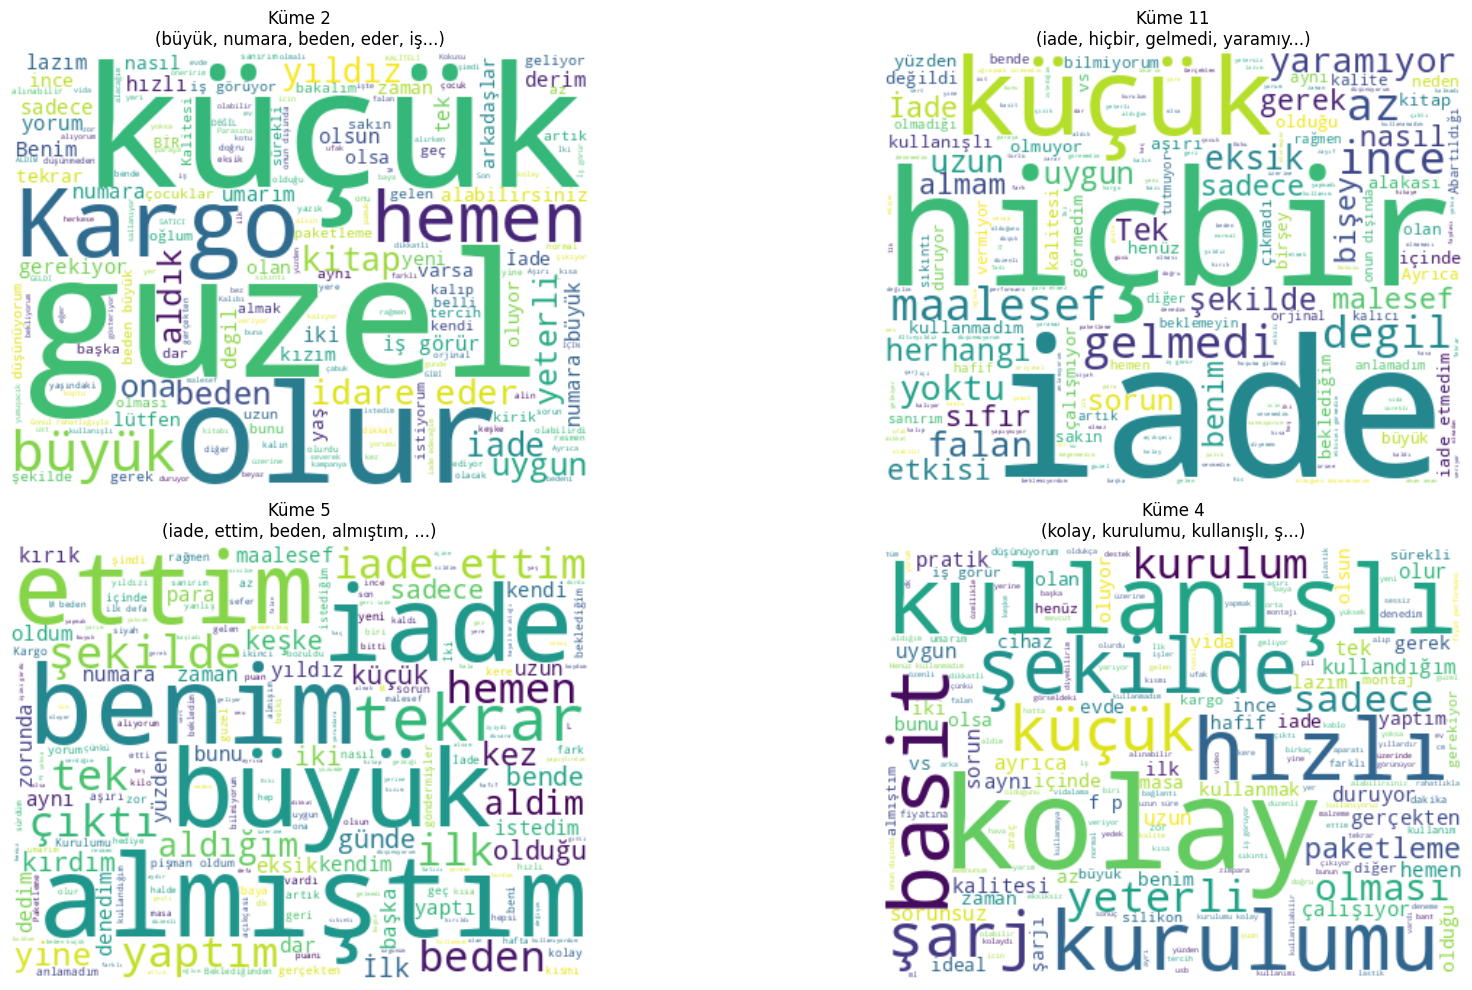

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import warnings
from sklearn.preprocessing import normalize

warnings.filterwarnings("ignore")

nltk.download('punkt')
nltk.download('punkt_tab')


FILE_PATH = '/content/nlp_data.csv'
SAMPLE_SIZE = 20000
NUM_CLUSTERS = 15

print("1. Veri Yükleniyor...")
try:
    df = pd.read_csv(FILE_PATH, usecols=['review_text'])
    df = df.dropna().sample(n=min(SAMPLE_SIZE, len(df)), random_state=42)
    print(f"   -> {len(df)} adet yorum yüklendi.")
except FileNotFoundError:
    print("HATA: Dosya bulunamadı! Lütfen dosya yolunu kontrol et.")
    exit()


print("2. Yorumlar cümlelere ayrıştırılıyor...")
sentences = []
source_indices = []

for idx, row in df.iterrows():
    text = str(row['review_text'])
    raw_sentences = nltk.sent_tokenize(text)
    for sent in raw_sentences:
        if len(sent.split()) > 2:
            sentences.append(sent)

df_sentences = pd.DataFrame({'sentence': sentences})
print(f"   -> Toplam Cümle Sayısı: {len(df_sentences)}")





print("⬇️ Cümle gömülüler oluşturuluyor...")
model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
embeddings = model.encode(sentences, show_progress_bar=True)

embeddings = normalize(embeddings)
print("✅ Gömülüler oluşturuldu ve normalize edildi.")

print("3. Embedding (Vektör) oluşturuluyor...")
model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
embeddings = model.encode(sentences, show_progress_bar=True)

print("4. PCA ile boyut indirgeme yapılıyor (Performans artışı)...")
pca = PCA(n_components=50, random_state=42)
reduced_embeddings = pca.fit_transform(embeddings)


print(f"5. K-Means ile {NUM_CLUSTERS} farklı Aspect kümeleniyor...")
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42, n_init=10)
df_sentences['cluster'] = kmeans.fit_predict(reduced_embeddings)



custom_stopwords = [
    "bir", "ve", "çok", "ama", "ile", "gibi", "daha", "için", "ben", "sen", "o",
    "biz", "siz", "onlar", "bu", "şu", "da", "de", "ki", "mi", "mu", "mı", "mü",
    "diye", "yani", "ise", "veya", "ya", "hem", "her", "şey", "ne", "bi", "bile",
    "kadar", "bence", "sanki", "zaten", "ancak", "fakat", "lakin", "pek", "hiç",
    "böyle", "öyle", "şöyle", "en", "biraz", "fazla", "asla", "tam",

    "ürün", "ürünü", "ürünün", "urun", "tavsiye", "ederim", "etmem", "aldım",
    "almayın", "alın", "geldi", "verdim", "sipariş", "kullanıyorum", "kullandım",
    "elime", "ulaştı", "teslim", "gün", "sonra", "önce", "ay", "yıl", "saat",
    "var", "yok", "oldu", "olmadı", "yapıyor", "yapmıyor", "ediyorum",

    "güzel", "kötü", "iyi", "berbat", "harika", "mükemmel", "süper", "fena",
    "beğendim", "beğenmedim", "memnun", "kaldım", "kalmadım", "teşekkürler",
    "teşekkür", "başarılı", "kaliteli", "kalitesiz", "sağlam", "şık", "rahat",
    "gayet", "inanılmaz", "rezalet",

    "değil", "yok", "var", "etmiyorum", "işe", "yaramadı", "kesinlikle",
    "cok", "çok", "bana", "sana", "olarak", "göre", "kadar", "tane", "adet"

]

print("\n" + "="*40)
print("SONUÇLAR: BULUNAN ASPECTLER")
print("="*40)

vectorizer = TfidfVectorizer(stop_words=custom_stopwords, max_features=2000, ngram_range=(1, 2))
cluster_docs = df_sentences.groupby(['cluster'])['sentence'].apply(lambda x: " ".join(x))
tfidf_matrix = vectorizer.fit_transform(cluster_docs)
feature_names = np.array(vectorizer.get_feature_names_out())

aspect_results = {}

for i in range(NUM_CLUSTERS):
    subset = df_sentences[df_sentences['cluster'] == i]
    count = len(subset)

    if count == 0: continue

    row = tfidf_matrix[i].toarray().flatten()
    top_indices = row.argsort()[-8:][::-1]
    keywords = feature_names[top_indices]

    aspect_results[i] = ", ".join(keywords)

    print(f"\n🔹 KÜME {i} (Cümle Sayısı: {count})")
    print(f"   🏷️ Anahtar Kelimeler: {aspect_results[i]}")

    n_samples = min(3, count)
    examples = subset['sentence'].sample(n_samples, random_state=42).values
    print("   💬 Örnekler:")
    for ex in examples:
        print(f"      - {ex}")


print("\n🖼️ WordCloud oluşturuluyor...")
plt.figure(figsize=(20, 10))

top_clusters = df_sentences['cluster'].value_counts().index[:4]

for idx, cluster_id in enumerate(top_clusters):
    text = " ".join(df_sentences[df_sentences['cluster'] == cluster_id]['sentence'])

    wc = WordCloud(width=400, height=300, background_color='white',
                   stopwords=set(custom_stopwords)).generate(text)

    plt.subplot(2, 2, idx+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Küme {cluster_id}\n({aspect_results.get(cluster_id, '')[:30]}...)", fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

**Visualizing clusters**


✅ 15 Küme -> 7 Aspect Eşleştirmesi Tamamlandı!
                                                sentence  cluster  \
20393  Daha kullanmaya başlamadım ama paketleme güzel...        4   
10385                 Tamda görüldüğü gibi montaji kolay        4   
7471                              Memnunum iyi çalışıyor        4   
24982                           Çok güzel hacim veriyor.        1   
12408  Ayakkabı çok güzel ama bence yarım numara büyü...       12   
19253        Bı sıkıntısi yok fiyatına göre gayet normal       13   
18855                          Kokusu dışında kullanışlı        4   
17041  Görünsün diye 5 yıldız veriyorum ürünü bebeğim...       14   
19624                             7 gündür kullanıyoruz.        4   
2113   Ürün gerçekten dokusu harika almak isteyen her...        0   
2601                         Çok güçlü bir motora sahip.        2   
7729                           Gözüm kapalı kullanıyorım        5   
20221                            Kargolama da harikaydı

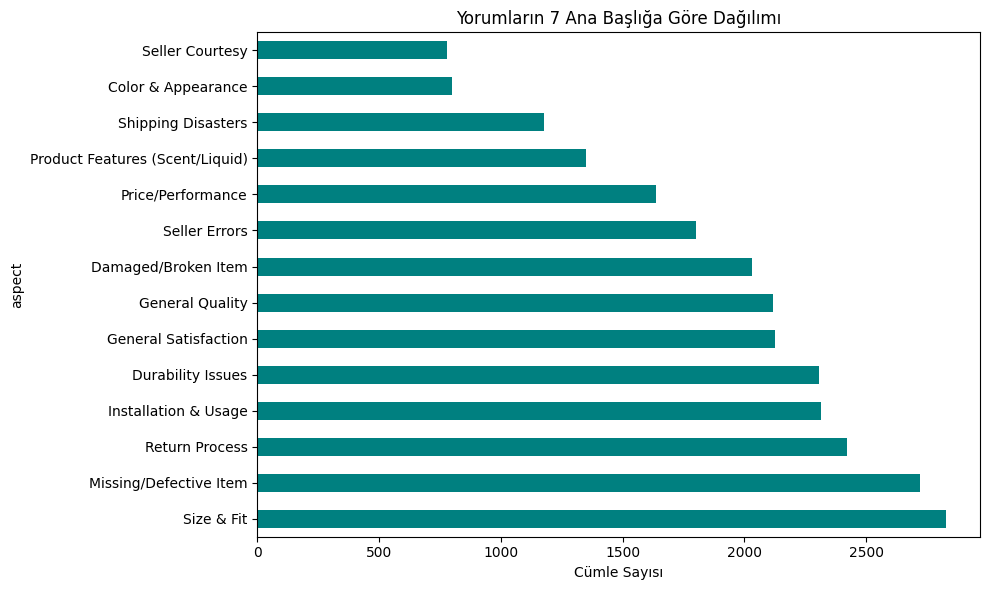


✅ Aspect Ataması Yapıldı!
                                                sentence  \
21601              Seri cok güzel ama pektleme basarizi.   
7774   Yahu ürünü araç içi süpürge diye aldık zerre b...   
8683                             Paranızı çöpe atmayın .   
2991                  20 tane kitabı çok rahat topluyor.   
19097                     Ürün açılmış ve içinde kıl var   
2438   fiyat performans ürünü ev kendinizin ise en ka...   
10910  Kullanışlı telleri ince demişlerdi yorumlarda ...   
14970     Hep dökülüyor sürdüğün rimel topaklanma oluyor   
10418  Kurulumunu sadece 1 tane tornavida ile yaptım ...   
3458                                      Berbat bi ürün   
24067                            Teşekkürler hızlı kargo   
2716   Kargo paketlemeniz berbattı arkasında da durma...   
14939                       Fiyatına göre gayet kaliteli   
23432             Gelen ürünün rengi sarının hangi tonu?   
13429  Ürün geç geldi Henüz kullanmadım ama yorumlara...   

            

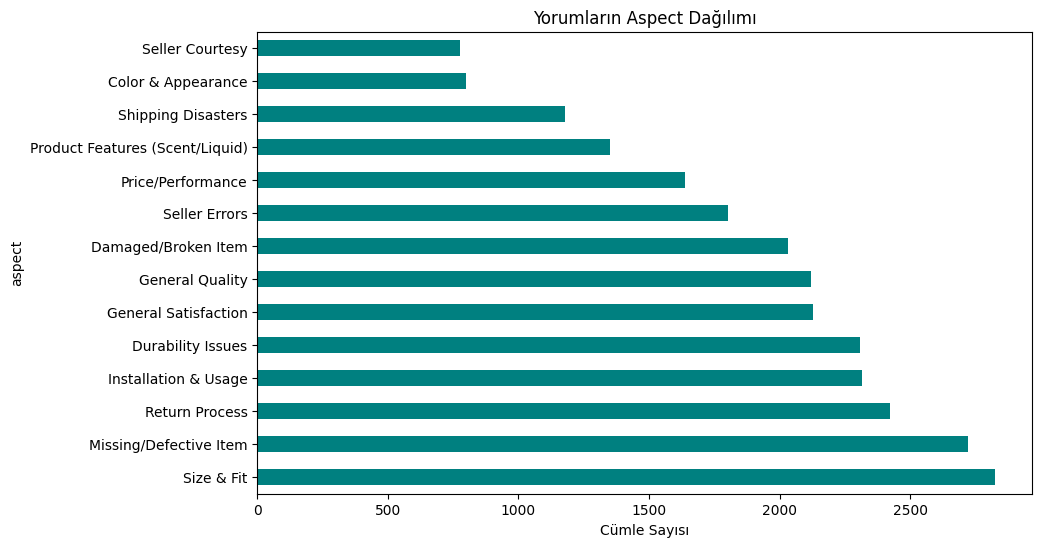

In [ ]:

aspect_map = {
    0: "Seller Errors",                 # Wrong item sent, seller-related issues, authenticity concerns.
    1: "General Satisfaction",          # "Liked it", "smooth", "quality" (General positive expressions).
    2: "Size & Fit",                    # Running large/small, non-standard fits.
    3: "Damaged/Broken Item",           # Physical damage from shipping/production (broken plastic, leaked).
    4: "Installation & Usage",          # Assembly, charging time, ease of use.
    5: "Return Process",                # Return actions due to fit issues or defects.
    6: "Seller Courtesy",               # Fast shipping, gifts, thank you notes (Praise for seller).
    7: "Product Features (Scent/Liquid)", # Smell, waterproofness, taste, specific physical traits.
    8: "General Quality",               # "Useful", "super", "does the job" type comments.
    9: "Color & Appearance",            # Color, visual accuracy, aesthetic look.
    10: "Durability Issues",            # "Broke immediately", "wobbling", "torn".
    11: "Missing/Defective Item",       # Missing parts or product never arrived.
    12: "Price/Performance",            # Worth the money, cheap, expensive.
    13: "Shipping Disasters"            # Leaked liquids, crushed boxes, late delivery.
}
df_sentences['aspect'] = df_sentences['cluster'].map(aspect_map)

print("\n✅ 15 Küme -> 7 Aspect Eşleştirmesi Tamamlandı!")
print(df_sentences[['sentence', 'cluster', 'aspect']].sample(15))

plt.figure(figsize=(10,6))
df_sentences['aspect'].value_counts().plot(kind='barh', color='teal')
plt.title("Yorumların 7 Ana Başlığa Göre Dağılımı")
plt.xlabel("Cümle Sayısı")
plt.tight_layout()
plt.show()

df_sentences['aspect'] = df_sentences['cluster'].map(aspect_map)

print("\n✅ Aspect Ataması Yapıldı!")
print(df_sentences[['sentence', 'aspect']].sample(15))

plt.figure(figsize=(10,6))
df_sentences['aspect'].value_counts().plot(kind='barh', color='teal')
plt.title("Yorumların Aspect Dağılımı")
plt.xlabel("Cümle Sayısı")
plt.show()

**Data Preparation**

In [ ]:
from google.colab import files


df[['review_text']].to_csv('ham_5000_yorum.csv', index=False, encoding='utf-8-sig')

print(f"✅ {len(df)} adet ham yorum indiriliyor.")
files.download('ham_5000_yorum.csv')

✅ 5000 adet ham yorum indiriliyor.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
df_ham = pd.read_csv('ham_5000_yorum.csv')
display(df_ham.iloc[1800:2000])

,review_text
1800,Fiyatına göre çok iyi fırçasını çok beğendim sürerken rahat sürülüyo ve kirpikleri çok daha uzun gösteriyo
1801,Çok küçük ama güzel
1802,Ürünü resimde de çok beğenmiştim. Geldiğinde de çok güzeldi. Oğlumun motoru için almıştım bir de hediye göndermişsiniz arabamız için kullanıcaz. Çok teşekküler.
1803,Yanlış ürün ve orijinal ürün diye sipariş verdik böyle geldi
1804,Ürün gayet güzel kendi kutusu ile gönderilmiş ama çevresinde hiçbir koruyucu köpük vs yoktu kırılabilirdi zarar görebilirdi daha özenli paketleme yapılmasını tavsiye ederim
1805,Ben çok beğendim kullanışlı halen yıkarken kullanıyorum kızım bir yaşında
1806,Dün akşam siparişim verdim bugün elime ulaştı hepsiburadaya tşk ederim
1807,Ürünün dışında koruyucu ambalaj olmaması biraz kafamı kurcaladı ama sıfır ürün gibi duruyor
1808,Kaliteli ve sağlam bir ürün
1809,Gayet güzel iş görüyor


**Data Labeling**

In [ ]:
raw_data = """
0.yorum: 1,0,0,0,0,1,0 1.yorum: 1,0,0,0,1,0,0 2.yorum: 0,0,0,-1,0,0,0 3.yorum: 1,0,0,0,0,-1,0 4.yorum: 0,0,0,0,0,1,0 5.yorum: 0,1,0,0,-1,0,0 6.yorum: 0,0,0,0,0,1,0 7.yorum: 0,0,0,0,-1,-1,0 8.yorum: 0,0,0,0,0,1,0 9.yorum: 0,0,-1,0,0,-1,-1 10.yorum: 0,0,0,0,1,1,-1 11.yorum: 0,0,0,0,-1,0,0 12.yorum: 0,0,0,0,0,-1,0 13.yorum: 0,0,-1,0,0,0,-1 14.yorum: 0,-1,0,0,0,-1,-1 15.yorum: 0,0,0,0,-1,-1,0 16.yorum: 1,0,-1,0,0,0,0 17.yorum: 0,0,-1,0,0,-1,0 18.yorum: 0,0,0,0,0,-1,0 19.yorum: 0,0,-1,0,-1,-1,-1 20.yorum: 0,1,0,0,0,0,0 21.yorum: 0,0,-1,0,-1,-1,0 22.yorum: 0,-1,-1,0,0,-1,0 23.yorum: 1,0,0,0,0,0,0 24.yorum: 0,0,0,0,0,0,1 25.yorum: 0,-1,0,0,1,1,0 26.yorum: 0,0,0,0,0,1,0 27.yorum: 0,0,-1,-1,0,0,-1 28.yorum: 0,0,0,0,0,0,-1 29.yorum: 0,0,-1,0,0,0,0 30.yorum: 0,-1,0,0,0,-1,0 31.yorum: 0,0,0,0,0,0,0 32.yorum: 0,1,0,0,0,0,0 33.yorum: 0,0,0,0,1,1,0 34.yorum: 0,0,0,0,-1,-1,0 35.yorum: 1,-1,0,0,0,-1,-1 36.yorum: 0,0,0,0,1,1,0 37.yorum: 0,1,0,0,1,0,1 38.yorum: 0,0,0,-1,0,0,-1 39.yorum: 1,0,0,0,0,0,0 40.yorum: 0,0,0,0,1,-1,0 41.yorum: 0,1,0,0,0,0,1 42.yorum: 0,0,0,0,0,0,-1 43.yorum: 0,0,0,0,-1,0,0 44.yorum: 0,-1,0,0,0,0,-1 45.yorum: 0,0,0,0,0,0,0 46.yorum: 0,0,0,0,0,0,1 47.yorum: 0,1,0,0,1,0,1 48.yorum: 0,0,0,0,1,0,0 49.yorum: 0,1,0,0,0,0,0 50.yorum: 0,0,0,0,1,1,0 51.yorum: 0,0,0,-1,0,0,0 52.yorum: 0,0,-1,1,0,0,0 53.yorum: 0,0,0,0,-1,0,0 54.yorum: 0,-1,0,0,0,0,0 55.yorum: 0,-1,0,0,0,1,0 56.yorum: 0,-1,0,0,1,-1,0 57.yorum: 0,0,0,0,0,0,-1 58.yorum: 0,0,0,0,0,-1,0 59.yorum: 0,0,1,0,0,0,0 60.yorum: 0,-1,0,0,0,-1,0 61.yorum: 0,0,0,0,-1,0,0 62.yorum: 0,0,0,0,-1,0,0 63.yorum: 0,1,1,0,0,0,0 64.yorum: 0,0,0,0,-1,-1,0 65.yorum: 0,0,0,0,0,1,-1 66.yorum: 0,0,0,0,-1,-1,0 67.yorum: 0,0,0,0,-1,-1,0 68.yorum: 0,0,0,0,0,-1,0 69.yorum: 0,1,0,0,0,0,0 70.yorum: 0,-1,0,0,0,0,-1 71.yorum: 0,0,-1,0,0,0,0 72.yorum: 0,0,0,0,-1,0,0 73.yorum: 0,0,-1,0,0,0,0 74.yorum: 0,0,0,0,0,0,0 75.yorum: 0,0,0,0,1,0,1 76.yorum: 0,0,0,0,-1,-1,0 77.yorum: 0,0,0,0,0,1,0 78.yorum: 0,0,0,0,0,1,0 79.yorum: 0,0,0,0,0,-1,0 80.yorum: 0,0,-1,0,0,-1,0 81.yorum: 0,0,0,0,0,0,-1 82.yorum: 0,1,1,0,0,0,1 83.yorum: 0,0,0,1,0,0,0 84.yorum: 0,0,0,0,1,1,0 85.yorum: 0,1,0,0,0,1,0 86.yorum: 1,0,0,0,0,1,0 87.yorum: 0,0,-1,0,0,0,0 88.yorum: 0,0,0,0,0,1,0 89.yorum: 0,0,1,-1,0,0,0 90.yorum: 0,0,0,0,1,0,0 91.yorum: 0,0,1,0,0,1,0 92.yorum: 0,0,1,0,-1,0,0 93.yorum: 0,0,0,0,0,1,0 94.yorum: 0,0,-1,0,-1,1,0 95.yorum: 1,0,-1,0,0,-1,0 96.yorum: 0,0,0,0,-1,0,0 97.yorum: 0,0,0,0,0,0,0 98.yorum: 0,-1,0,0,0,-1,0 99.yorum: 0,0,1,0,1,1,0 100.yorum: 0,0,1,0,1,-1,0 101.yorum: 0,0,0,0,0,-1,0 102.yorum: 1,0,0,0,0,0,0 103.yorum: 0,0,0,0,0,0,-1 104.yorum: 0,1,1,0,0,0,0 105.yorum: 0,-1,0,-1,0,0,-1 106.yorum: -1,0,0,0,0,-1,0 107.yorum: 0,0,0,0,0,0,-1 108.yorum: 0,0,0,0,0,0,0 109.yorum: 0,-1,0,0,-1,0,-1 110.yorum: 0,0,0,0,0,0,0 111.yorum: 0,1,0,0,0,0,0 112.yorum: 1,0,1,0,0,0,-1 113.yorum: 0,0,0,-1,0,0,0 114.yorum: 0,0,-1,0,0,0,-1 115.yorum: 0,0,0,1,0,1,0 116.yorum: 0,0,0,0,-1,0,0 117.yorum: 0,0,0,0,0,0,0 118.yorum: 1,0,0,0,0,0,0 119.yorum: 0,0,0,0,0,1,0 120.yorum: -1,0,0,0,0,0,0 121.yorum: 0,0,1,0,0,1,0 122.yorum: 0,0,0,0,0,0,0 123.yorum: 0,0,0,0,0,-1,0 124.yorum: 0,0,0,0,0,1,0 125.yorum: 0,0,0,0,0,-1,-1 126.yorum: 0,0,0,0,0,0,-1 127.yorum: 0,-1,0,0,0,0,0 128.yorum: 0,0,0,0,0,0,0 129.yorum: 0,0,0,1,1,0,0 130.yorum: 0,0,0,0,1,0,0 131.yorum: 0,0,-1,0,0,0,0 132.yorum: 0,0,-1,0,0,0,-1 133.yorum: 0,0,0,0,1,0,0 134.yorum: 0,0,0,0,0,-1,0 135.yorum: 0,0,0,0,0,0,0 136.yorum: 0,0,0,0,1,0,0 137.yorum: 0,0,-1,0,-1,0,0 138.yorum: 0,0,0,0,1,0,0 139.yorum: 0,0,0,0,0,0,0 140.yorum: 0,0,0,0,-1,-1,0 141.yorum: 0,0,0,0,0,0,-1 142.yorum: 0,0,1,0,-1,0,0 143.yorum: 1,0,0,0,0,1,0 144.yorum: 0,0,0,0,0,0,0 145.yorum: 0,0,0,0,0,1,0 146.yorum: 0,-1,0,0,0,0,-1 147.yorum: 0,0,0,0,-1,0,0 148.yorum: 1,0,0,0,0,0,0 149.yorum: 0,0,0,0,0,0,0 150.yorum: 0,0,-1,0,0,-1,0 151.yorum: 0,-1,0,0,0,0,-1 152.yorum: 0,0,-1,0,0,-1,0 153.yorum: 0,0,0,0,0,-1,-1 154.yorum: 0,0,0,0,0,-1,0 155.yorum: 1,0,0,0,0,1,0 156.yorum: 0,0,0,0,0,1,0 157.yorum: 0,0,0,0,1,0,0 158.yorum: 0,0,0,0,0,0,-1 159.yorum: 1,0,0,0,-1,0,0 160.yorum: 0,-1,0,0,0,-1,0 161.yorum: 0,0,0,0,0,0,-1 162.yorum: 0,0,0,0,1,0,0 163.yorum: 0,0,0,0,1,0,0 164.yorum: 0,0,0,0,0,0,0 165.yorum: 0,0,-1,0,0,-1,0 166.yorum: 0,0,0,0,0,0,0 167.yorum: 0,1,1,0,0,0,0 168.yorum: 0,0,0,0,1,0,0 169.yorum: 1,0,-1,0,1,0,0 170.yorum: 0,1,0,0,0,0,0 171.yorum: 0,0,0,0,0,0,0 172.yorum: 0,0,0,0,0,0,0 173.yorum: 0,-1,0,0,-1,-1,-1 174.yorum: 0,0,-1,0,0,-1,0 175.yorum: 0,0,0,0,-1,0,0 176.yorum: 0,0,0,0,0,-1,0 177.yorum: 0,0,0,0,1,0,0 178.yorum: 0,0,0,0,-1,1,0 179.yorum: 0,0,-1,0,0,-1,0 180.yorum: 0,0,1,0,0,0,0 181.yorum: 0,0,0,0,0,0,0 182.yorum: -1,0,0,0,0,0,0 183.yorum: 0,0,0,1,0,0,0 184.yorum: 0,0,0,0,0,0,0 185.yorum: 0,1,0,0,0,1,0 186.yorum: 0,1,0,0,0,0,0 187.yorum: 0,0,0,0,0,0,-1 188.yorum: 0,1,0,1,0,1,0 189.yorum: 0,1,0,0,0,-1,0 190.yorum: 1,0,0,0,0,0,0 191.yorum: 0,0,0,0,0,0,0 192.yorum: 0,-1,0,0,0,0,0 193.yorum: 0,0,0,-1,0,0,0 194.yorum: 0,0,1,0,0,1,0 195.yorum: 0,0,-1,-1,0,-1,0 196.yorum: 0,0,0,0,0,0,-1 197.yorum: 0,0,0,1,1,0,0 198.yorum: 0,0,-1,0,0,0,0 199.yorum: 0,0,0,0,1,0,0 200.yorum: 0,0,0,-1,0,0,0 201.yorum: 0,0,0,0,0,-1,0 202.yorum: 1,1,0,0,1,0,0 203.yorum: 0,0,0,0,1,0,0 204.yorum: 0,0,0,0,0,0,0 205.yorum: 0,0,0,0,-1,0,0 206.yorum: 0,0,-1,0,0,0,0 207.yorum: 0,0,-1,0,0,0,0 208.yorum: 0,0,0,0,0,0,-1 209.yorum: 0,0,-1,0,0,0,0 210.yorum: 0,0,-1,0,0,0,0 211.yorum: 0,0,-1,0,0,-1,-1 212.yorum: 0,0,-1,0,-1,-1,0 213.yorum: 0,0,0,0,-1,0,0 214.yorum: 0,1,0,0,0,0,0 215.yorum: 0,0,-1,0,0,-1,0 216.yorum: 0,0,-1,0,0,0,0 217.yorum: 0,-1,0,0,0,0,0 218.yorum: 0,-1,0,0,0,-1,0 219.yorum: 0,0,0,0,0,0,0 220.yorum: 0,0,0,0,1,0,0 221.yorum: 0,1,0,0,1,1,0 222.yorum: 0,-1,0,0,0,0,-1 223.yorum: 1,0,0,0,0,0,0 224.yorum: 0,0,0,0,1,0,0 225.yorum: 0,0,0,0,-1,0,0 226.yorum: 0,0,-1,-1,0,0,0 227.yorum: 0,0,1,0,0,0,0 228.yorum: 1,0,0,0,0,0,0 229.yorum: 0,0,-1,1,1,1,0 230.yorum: 0,0,0,0,0,-1,0 231.yorum: 0,0,0,0,-1,0,0 232.yorum: 0,0,0,0,0,0,-1 233.yorum: 0,0,0,0,0,0,-1 234.yorum: 1,0,0,0,0,-1,0 235.yorum: 0,0,0,0,0,0,0 236.yorum: 0,0,0,0,0,0,-1 237.yorum: 0,0,-1,0,1,0,0 238.yorum: 0,0,0,1,0,0,0 239.yorum: 0,-1,0,0,0,0,0 240.yorum: 0,0,0,0,0,0,-1 241.yorum: 1,0,-1,0,0,-1,0 242.yorum: 0,0,0,-1,0,0,0 243.yorum: 0,0,0,0,0,0,0 244.yorum: 0,0,1,0,0,0,0 245.yorum: 0,-1,0,0,0,0,0 246.yorum: 0,0,0,0,0,1,0 247.yorum: 1,0,0,0,0,0,0 248.yorum: 0,0,-1,0,0,0,0 249.yorum: 0,0,0,0,0,0,0 250.yorum: 0,0,1,0,0,0,0 251.yorum: 0,0,1,0,0,0,0 252.yorum: 0,1,0,1,0,0,0 253.yorum: 0,-1,0,0,0,0,0 254.yorum: 0,-1,0,0,0,0,0 255.yorum: 0,0,-1,0,0,0,0 256.yorum: 0,0,0,0,0,-1,-1 257.yorum: 0,-1,0,0,0,-1,-1 258.yorum: 0,0,0,-1,0,0,0 259.yorum: 0,0,0,0,0,0,0 260.yorum: 0,0,0,0,1,0,0 261.yorum: 0,-1,0,0,0,1,0 262.yorum: 0,0,-1,0,0,0,0 263.yorum: 0,0,-1,0,0,0,0 264.yorum: 0,0,-1,0,0,0,0 265.yorum: 0,0,-1,0,0,0,0 266.yorum: 0,-1,0,0,0,0,0 267.yorum: 0,0,0,0,1,0,0 268.yorum: 0,0,1,0,0,1,0 269.yorum: 1,0,0,0,1,1,0 270.yorum: 0,0,0,0,0,0,0 271.yorum: 0,0,0,0,0,0,0 272.yorum: 0,0,0,0,-1,0,0 273.yorum: 0,-1,-1,0,0,-1,0 274.yorum: 0,1,0,0,0,0,1 275.yorum: 0,0,0,0,0,0,-1 276.yorum: 0,0,0,0,0,0,0 277.yorum: 1,0,0,0,0,0,0 278.yorum: 0,0,0,0,0,-1,0 279.yorum: 0,0,0,0,0,1,0 280.yorum: 1,1,0,0,0,0,0 281.yorum: 0,0,0,0,-1,0,0 282.yorum: 0,0,0,0,0,0,-1 283.yorum: 0,0,0,0,0,1,1 284.yorum: 0,0,-1,0,0,0,0 285.yorum: 0,0,-1,0,0,0,0 286.yorum: 1,0,0,0,0,0,0 287.yorum: 1,1,0,0,0,1,0 288.yorum: 0,0,0,0,1,0,0 289.yorum: 1,1,0,0,0,0,0 290.yorum: 0,0,0,0,0,0,0 291.yorum: 0,0,0,0,0,-1,0 292.yorum: 0,0,0,0,-1,0,0 293.yorum: -1,0,0,0,-1,-1,0 294.yorum: 0,0,0,0,0,1,1 295.yorum: 0,0,0,0,-1,-1,0 296.yorum: 0,0,0,0,-1,-1,0 297.yorum: 0,1,0,0,1,0,0 298.yorum: 0,0,0,0,1,0,0 299.yorum: 0,0,0,0,0,1,0 300.yorum: 0,0,0,0,-1,0,0 301.yorum: 0,0,1,0,1,1,0 302.yorum: 0,0,0,0,0,0,0 303.yorum: 0,0,1,0,0,0,0 304.yorum: 0,0,-1,0,0,0,0 305.yorum: 0,0,0,0,0,0,0 306.yorum: 0,0,-1,0,0,0,0 307.yorum: 0,1,0,0,0,1,0 308.yorum: 0,0,0,0,0,0,-1 309.yorum: 0,0,0,-1,0,1,-1 310.yorum: 0,1,0,0,0,0,0 311.yorum: 0,0,0,0,0,0,0 312.yorum: 0,0,0,0,1,1,0 313.yorum: 0,0,0,0,0,-1,0 314.yorum: 0,0,0,-1,0,0,0 315.yorum: 0,0,0,1,0,0,0 316.yorum: 0,-1,-1,0,0,-1,-1 317.yorum: 0,-1,0,0,0,1,-1 318.yorum: 0,0,0,0,0,-1,0 319.yorum: 0,0,0,0,0,0,0 320.yorum: 0,0,-1,0,0,0,0 321.yorum: 0,0,-1,0,0,-1,0 322.yorum: 0,0,0,0,1,0,0 323.yorum: 0,0,-1,0,0,0,0 324.yorum: 0,0,0,0,0,0,0 325.yorum: 0,0,-1,0,0,0,0 326.yorum: 0,0,0,0,0,0,0 327.yorum: 0,0,0,1,1,0,0 328.yorum: 0,0,1,0,-1,0,0 329.yorum: 0,-1,0,0,0,0,0 330.yorum: 0,0,0,0,1,1,0 331.yorum: 0,0,0,0,0,0,0 332.yorum: 0,0,0,0,1,-1,0 333.yorum: 0,-1,0,0,0,0,0 334.yorum: 0,0,1,0,0,0,0 335.yorum: 1,0,-1,0,1,0,0 336.yorum: 0,0,0,0,-1,0,0 337.yorum: 0,-1,-1,0,0,0,0 338.yorum: 0,0,0,0,0,0,0 339.yorum: 0,-1,0,0,0,0,0 340.yorum: 0,0,0,0,1,0,0 341.yorum: 0,0,0,0,1,0,0 342.yorum: 1,0,0,0,0,-1,0 343.yorum: 0,0,0,-1,0,0,0 344.yorum: 0,0,-1,0,0,0,0 345.yorum: 0,1,0,0,0,1,0 346.yorum: 0,1,-1,0,0,0,0 347.yorum: 0,0,0,0,-1,-1,0 348.yorum: 0,0,0,0,0,0,0 349.yorum: 0,0,0,0,0,0,-1 350.yorum: 0,0,-1,0,0,-1,0 351.yorum: 0,0,-1,-1,-1,0,0 352.yorum: 0,0,0,0,0,-1,0 353.yorum: 1,0,0,0,0,0,0 354.yorum: 0,0,0,0,0,0,-1 355.yorum: 1,0,0,0,0,-1,0 356.yorum: 0,1,0,0,0,0,0 357.yorum: 0,0,0,0,-1,0,0 358.yorum: 0,0,1,0,0,0,0 359.yorum: 0,0,0,1,0,0,0 360.yorum: 0,0,-1,-1,0,-1,0 361.yorum: 0,0,0,0,0,1,0 362.yorum: 0,0,0,0,1,0,0 363.yorum: 0,0,0,0,-1,0,0 364.yorum: 0,1,0,0,0,0,0 365.yorum: 0,0,-1,0,0,0,0 366.yorum: 0,0,0,0,0,0,0 367.yorum: 0,0,0,0,1,0,0 368.yorum: 0,0,0,0,0,0,-1 369.yorum: 0,0,0,0,1,0,0 370.yorum: 0,0,0,0,-1,0,-1 371.yorum: 0,0,0,0,0,-1,0 372.yorum: 0,0,0,0,0,1,0 373.yorum: 0,-1,0,0,0,0,0 374.yorum: 0,0,-1,0,0,-1,0 375.yorum: 1,0,0,0,0,0,0 376.yorum: 0,0,0,0,1,0,0 377.yorum: 0,0,0,0,0,0,0 378.yorum: 0,0,0,0,-1,0,0 379.yorum: 0,0,0,0,-1,0,0 380.yorum: 0,-1,1,0,0,0,0 381.yorum: 0,0,0,0,-1,0,0 382.yorum: 0,0,0,0,-1,0,0 383.yorum: 0,1,0,0,0,0,0 384.yorum: 0,0,0,0,-1,-1,-1 385.yorum: 0,0,0,0,-1,0,0 386.yorum: 0,0,0,0,-1,0,0 387.yorum: 0,0,0,0,-1,0,0 388.yorum: 0,0,0,0,0,-1,-1 389.yorum: 0,0,-1,0,0,-1,0 390.yorum: 0,0,-1,0,0,0,0 391.yorum: 0,0,-1,0,0,-1,0 392.yorum: 0,0,0,0,0,0,0 393.yorum: 0,0,0,0,0,1,0 394.yorum: 0,0,-1,0,0,0,0 395.yorum: 0,0,-1,1,0,0,0 396.yorum: -1,0,0,0,0,0,0 397.yorum: 1,0,-1,0,0,0,0 398.yorum: 0,1,1,0,0,0,0 399.yorum: 0,0,1,0,0,0,0 400.yorum: 0,0,0,0,0,0,0 401.yorum: 0,0,0,0,0,1,-1 402.yorum: 1,1,1,1,0,0,0 403.yorum: 0,-1,0,0,0,-1,0 404.yorum: 0,1,0,0,1,0,0 405.yorum: 0,0,-1,0,0,0,0 406.yorum: 0,0,0,0,0,0,0 407.yorum: 0,0,0,0,0,-1,0 408.yorum: 0,0,0,0,0,0,0 409.yorum: 0,0,0,0,0,0,0 410.yorum: -1,0,0,0,0,0,0 411.yorum: 0,-1,-1,0,1,1,0 412.yorum: 1,0,0,0,0,0,0 413.yorum: 0,0,0,0,0,0,0 414.yorum: 0,0,0,0,0,0,-1 415.yorum: 0,-1,0,0,0,0,-1 416.yorum: 0,0,0,0,-1,0,0 417.yorum: 0,0,1,0,0,0,0 418.yorum: 0,0,0,1,0,0,-1 419.yorum: 0,0,0,0,1,0,0 420.yorum: 1,0,0,-1,1,0,0 421.yorum: 0,0,0,0,0,0,-1 422.yorum: 0,0,0,0,-1,0,0 423.yorum: 0,0,0,0,1,0,0 424.yorum: 0,0,0,0,1,1,0 425.yorum: 0,-1,0,0,0,0,1 426.yorum: 0,0,0,0,0,0,0 427.yorum: 0,0,-1,0,0,0,0 428.yorum: 0,0,0,-1,0,0,0 429.yorum: 0,-1,0,0,0,-1,-1 430.yorum: 0,1,0,0,0,0,0 431.yorum: 0,0,1,0,1,0,0 432.yorum: 0,0,0,0,0,0,-1 433.yorum: 0,0,0,0,-1,0,0 434.yorum: 0,0,0,0,1,0,0 435.yorum: 0,0,-1,0,0,0,0 436.yorum: 0,0,1,0,0,0,1 437.yorum: 0,0,0,0,-1,0,0 438.yorum: 0,0,-1,1,0,0,0 439.yorum: 0,0,0,1,0,0,0 440.yorum: -1,0,0,0,0,0,0 441.yorum: 0,0,0,-1,0,0,-1 442.yorum: 0,0,0,0,0,0,0 443.yorum: 0,-1,0,0,0,-1,0 444.yorum: 0,1,0,0,1,0,0 445.yorum: 0,0,0,0,0,-1,-1 446.yorum: 0,0,0,0,1,0,0 447.yorum: 1,1,0,0,1,0,0 448.yorum: 0,0,0,0,-1,-1,0 449.yorum: 1,0,1,0,0,1,0 450.yorum: 0,0,-1,0,0,0,0 451.yorum: 0,0,0,0,0,0,0 452.yorum: 0,1,0,0,0,1,0 453.yorum: 0,-1,0,0,0,0,-1 454.yorum: 0,0,0,0,1,0,0 455.yorum: 0,0,0,0,0,0,0 456.yorum: 1,0,0,0,-1,0,0 457.yorum: 0,-1,0,0,0,0,0 458.yorum: 0,0,0,0,0,-1,0 459.yorum: 0,0,0,0,0,0,0 460.yorum: 0,0,0,0,0,-1,-1 461.yorum: 0,0,0,1,0,1,0 462.yorum: 0,0,-1,0,0,-1,0 463.yorum: 0,0,1,0,0,1,0 464.yorum: 0,0,0,0,0,-1,0 465.yorum: 1,1,0,0,0,0,0 466.yorum: 0,0,0,0,0,0,0 467.yorum: 0,0,0,0,0,0,0 468.yorum: 0,0,0,0,0,1,0 469.yorum: 0,0,0,0,-1,-1,0 470.yorum: 0,0,-1,0,0,1,0 471.yorum: 0,0,0,0,0,0,0 472.yorum: 0,0,0,0,0,0,-1 473.yorum: 0,0,0,0,1,0,0 474.yorum: 0,0,-1,0,0,-1,0 475.yorum: 0,0,0,0,0,0,0 476.yorum: 0,0,0,0,0,-1,0 477.yorum: 0,0,1,0,1,0,0 478.yorum: 0,0,0,0,0,0,0 479.yorum: 0,0,0,0,0,0,0 480.yorum: 0,0,0,0,0,1,0 481.yorum: 0,1,0,0,1,0,0 482.yorum: 0,0,0,0,-1,-1,-1 483.yorum: -1,0,-1,0,0,-1,0 484.yorum: 0,-1,0,0,0,-1,-1 485.yorum: 0,0,0,0,0,0,0 486.yorum: 0,1,0,0,1,1,0 487.yorum: 0,0,0,0,0,1,0 488.yorum: 0,1,0,0,0,0,0 489.yorum: 0,0,1,0,1,1,0 490.yorum: 0,0,-1,0,0,0,0 491.yorum: 0,0,0,0,0,-1,-1 492.yorum: 0,0,0,0,0,0,0 493.yorum: 0,0,0,0,0,-1,0 494.yorum: 0,0,-1,0,0,0,0 495.yorum: 0,0,0,0,1,0,0 496.yorum: 0,0,1,1,0,0,0 497.yorum: 0,0,0,1,0,0,0 498.yorum: 0,0,0,0,1,0,0 499.yorum: 1,0,0,0,0,0,0 500.yorum: 1,0,0,0,0,0,0 501.yorum: 1,1,0,0,0,1,0 502.yorum: 0,0,0,0,0,0,0 503.yorum: 0,0,-1,0,0,0,0 504.yorum: 0,-1,0,0,0,0,0 505.yorum: 0,0,0,0,0,0,1 506.yorum: 0,0,0,0,0,1,0 507.yorum: 0,0,0,0,0,-1,0 508.yorum: 0,0,1,0,-1,0,0 509.yorum: 0,0,0,0,-1,0,0 510.yorum: 0,0,1,0,0,0,0 511.yorum: 0,0,0,0,0,0,0 512.yorum: 0,0,0,0,-1,-1,0 513.yorum: 1,0,0,0,0,0,0 514.yorum: 0,0,0,0,0,-1,0 515.yorum: 0,1,0,0,0,1,1 516.yorum: 0,0,0,0,1,1,0 517.yorum: 0,0,0,0,0,0,-1 518.yorum: 0,0,0,0,0,0,-1 519.yorum: 0,0,0,0,0,0,0 520.yorum: 0,0,0,0,0,0,0 521.yorum: 0,0,0,0,0,-1,0 522.yorum: 0,0,0,0,0,0,0 523.yorum: 0,0,0,0,1,0,0 524.yorum: 1,-1,0,0,0,-1,-1 525.yorum: 0,0,0,0,0,0,0 526.yorum: 0,0,-1,-1,0,0,0 527.yorum: 1,0,1,0,0,0,0 528.yorum: 0,1,0,0,0,0,0 529.yorum: 0,1,0,0,-1,0,0 530.yorum: 0,0,0,0,0,0,0 531.yorum: 0,0,0,0,0,-1,-1 532.yorum: 0,0,0,0,0,0,-1 533.yorum: 1,0,0,0,0,1,0 534.yorum: 1,0,0,0,0,-1,-1 535.yorum: 0,0,0,0,0,0,0 536.yorum: 0,0,0,0,0,-1,0 537.yorum: 0,0,-1,0,0,-1,0 538.yorum: 1,0,-1,0,0,0,0 539.yorum: 0,0,0,0,-1,0,-1 540.yorum: 0,0,-1,0,-1,0,0 541.yorum: 0,0,0,0,0,0,0 542.yorum: 0,0,0,0,-1,-1,-1 543.yorum: 0,0,0,0,1,1,0 544.yorum: 0,0,0,0,0,0,0 545.yorum: -1,0,0,0,-1,0,0 546.yorum: 0,0,1,1,0,-1,0 547.yorum: 0,0,-1,-1,0,0,0 548.yorum: 0,1,0,0,0,1,0 549.yorum: 0,0,0,0,0,0,0 550.yorum: 0,-1,0,0,0,-1,0 551.yorum: 0,0,0,0,-1,0,0 552.yorum: 0,0,1,0,-1,0,0 553.yorum: 0,0,0,0,0,0,0 554.yorum: 1,1,0,0,0,0,0 555.yorum: 0,1,0,0,0,0,1 556.yorum: 0,1,0,0,0,0,0 557.yorum: 0,0,0,0,0,0,1 558.yorum: 0,0,0,0,-1,0,0 559.yorum: 0,0,-1,0,0,0,0 560.yorum: 0,-1,0,0,-1,0,0 561.yorum: 0,0,0,0,0,0,0 562.yorum: 0,0,0,0,-1,0,0 563.yorum: 0,0,0,0,0,0,0 564.yorum: 0,0,0,0,1,0,0 565.yorum: 1,0,0,0,0,0,0 566.yorum: 0,1,0,0,1,1,0 567.yorum: 0,0,0,0,1,0,0 568.yorum: 0,1,0,0,0,0,0 569.yorum: 1,0,0,1,0,0,0 570.yorum: 0,1,0,0,0,0,0 571.yorum: 0,0,0,0,-1,0,0 572.yorum: 0,0,0,0,0,0,-1 573.yorum: 1,0,-1,0,0,0,0 574.yorum: 0,0,0,0,0,0,-1 575.yorum: 0,0,0,0,0,0,0 576.yorum: 0,0,0,0,0,0,0 577.yorum: 1,1,0,0,0,0,0 578.yorum: 0,0,-1,0,0,0,0 579.yorum: 0,0,1,0,0,0,0 580.yorum: 0,0,-1,0,0,-1,0 581.yorum: 0,0,0,0,0,-1,-1 582.yorum: 0,0,-1,0,0,0,0 583.yorum: 0,0,0,1,0,0,0 584.yorum: 0,0,0,0,0,0,-1 585.yorum: 0,0,0,0,0,0,0 586.yorum: 1,0,0,0,0,1,0 587.yorum: 0,0,-1,-1,0,0,0 588.yorum: 0,0,-1,0,0,-1,-1 589.yorum: 0,0,0,0,0,1,0 590.yorum: 0,0,0,0,-1,0,0 591.yorum: 0,0,0,0,1,0,0 592.yorum: 0,0,0,0,0,0,-1 593.yorum: 0,0,0,0,0,0,0 594.yorum: 0,1,0,0,0,0,0 595.yorum: 0,-1,0,0,0,-1,0 596.yorum: 1,0,0,0,0,0,0 597.yorum: 0,0,0,0,0,-1,0 598.yorum: 0,0,-1,0,0,0,0 599.yorum: 0,0,0,0,-1,0,0 600.yorum: 1,0,0,0,0,0,0 601.yorum: 0,0,1,0,1,0,0 602.yorum: 0,0,0,0,0,0,0 603.yorum: 0,-1,1,0,-1,0,0 604.yorum: 0,0,0,0,0,0,0 605.yorum: 0,1,0,0,0,0,0 606.yorum: 1,0,0,0,0,0,0 607.yorum: 0,0,0,-1,0,0,0 608.yorum: 0,0,0,-1,0,-1,0 609.yorum: 1,0,-1,0,0,0,0 610.yorum: 0,0,0,0,0,-1,0 611.yorum: 0,0,0,0,-1,0,0 612.yorum: 0,0,0,0,1,0,0 613.yorum: 0,0,1,0,1,0,0 614.yorum: 0,0,0,0,0,0,0 615.yorum: 0,0,1,0,0,0,0 616.yorum: 0,0,0,1,0,0,0 617.yorum: 1,0,0,0,0,1,0 618.yorum: 0,0,0,0,0,-1,0 619.yorum: 0,-1,0,0,0,0,0 620.yorum: 0,0,0,0,1,0,0 621.yorum: 0,0,0,0,0,-1,0 622.yorum: 0,0,0,0,-1,-1,0 623.yorum: 0,1,0,0,0,0,0 624.yorum: 0,0,0,0,0,0,0 625.yorum: 0,1,0,0,1,0,-1 626.yorum: 0,0,0,0,-1,-1,-1 627.yorum: 0,0,0,0,-1,0,0 628.yorum: 0,0,0,0,0,-1,0 629.yorum: 0,0,0,0,0,-1,0 630.yorum: 0,0,0,0,0,0,0 631.yorum: 0,0,0,0,0,0,0 632.yorum: 0,1,0,0,0,0,0 633.yorum: 0,0,-1,0,0,-1,0 634.yorum: 0,0,0,0,0,0,0 635.yorum: 0,0,0,0,1,-1,0 636.yorum: 1,0,0,0,1,-1,0 637.yorum: 0,1,0,1,0,0,0 638.yorum: 0,0,0,0,1,0,0 639.yorum: 0,0,-1,0,0,-1,0 640.yorum: 0,0,0,0,1,0,0 641.yorum: 1,0,0,0,0,-1,0 642.yorum: 0,-1,0,0,0,1,0 643.yorum: 0,-1,0,0,0,-1,0 644.yorum: 0,0,1,0,0,0,0 645.yorum: 0,1,0,0,0,0,0 646.yorum: 0,0,0,0,-1,0,0 647.yorum: 0,0,0,0,0,0,0 648.yorum: 0,0,0,0,-1,-1,0 649.yorum: 0,-1,0,0,0,0,0 650.yorum: 1,0,0,0,0,0,0 651.yorum: 0,0,0,0,0,0,0 652.yorum: 0,0,0,0,0,0,0 653.yorum: 0,0,-1,0,0,0,0 654.yorum: 0,1,0,0,1,0,1 655.yorum: 0,0,-1,0,0,0,0 656.yorum: 0,-1,0,0,0,-1,0 657.yorum: 0,0,0,0,-1,0,0 658.yorum: 0,0,0,0,-1,0,0 659.yorum: 0,0,0,0,0,0,0 660.yorum: 0,0,0,0,-1,0,0 661.yorum: 0,0,0,0,0,1,0 662.yorum: 0,0,0,0,0,0,0 663.yorum: 0,0,0,-1,0,0,0 664.yorum: 0,0,0,0,0,-1,0 665.yorum: 0,0,1,0,0,0,0 666.yorum: 0,-1,0,0,0,-1,-1 667.yorum: 0,-1,0,0,0,0,0 668.yorum: 0,0,0,0,1,0,0 669.yorum: 0,0,0,0,0,1,0 670.yorum: 0,0,-1,0,0,-1,0 671.yorum: 0,0,0,0,0,0,0 672.yorum: 0,0,0,-1,0,1,0 673.yorum: 0,0,0,0,1,0,0 674.yorum: 0,0,-1,0,0,-1,-1 675.yorum: 1,0,0,0,0,1,0 676.yorum: 0,-1,0,0,0,0,0 677.yorum: 1,0,-1,0,0,-1,0 678.yorum: 0,0,0,0,0,0,0 679.yorum: 0,0,0,0,0,0,0 680.yorum: 0,0,0,0,1,0,0 681.yorum: 0,0,1,0,0,0,0 682.yorum: 0,0,0,0,0,0,0 683.yorum: 1,1,0,0,0,0,0 684.yorum: 0,0,-1,0,0,0,0 685.yorum: 0,0,0,0,0,0,0 686.yorum: 0,-1,-1,0,0,0,0 687.yorum: 0,-1,0,0,0,0,0 688.yorum: 0,0,0,0,0,1,0 689.yorum: 0,-1,0,0,0,0,0 690.yorum: 0,0,0,0,0,-1,0 691.yorum: 1,0,0,0,1,0,0 692.yorum: 0,0,0,0,0,1,0 693.yorum: 0,0,-1,-1,0,0,0 694.yorum: 0,-1,0,0,0,0,0 695.yorum: 1,0,0,0,0,-1,0 696.yorum: 0,0,0,-1,0,0,0 697.yorum: 0,0,0,0,0,0,0 698.yorum: 0,0,1,0,0,0,0 699.yorum: 0,0,-1,0,0,0,0 700.yorum: 0,0,0,0,0,0,0 701.yorum: 0,1,0,0,0,0,1 702.yorum: 0,0,-1,0,0,1,0 703.yorum: 0,0,-1,0,0,-1,0 704.yorum: 0,1,0,1,0,0,0 705.yorum: 0,0,-1,0,0,-1,0 706.yorum: 0,-1,0,0,0,-1,0 707.yorum: 0,0,-1,0,0,-1,0 708.yorum: 1,0,0,0,0,1,0 709.yorum: 0,0,0,0,0,0,0 710.yorum: 0,0,0,0,0,0,0 711.yorum: 0,1,0,0,1,0,0 712.yorum: 0,0,0,0,0,0,1 713.yorum: 0,0,0,0,-1,0,0 714.yorum: 1,0,0,0,0,-1,0 715.yorum: 0,0,0,0,0,1,0 716.yorum: 0,0,0,0,0,1,0 717.yorum: 0,0,0,0,-1,0,0 718.yorum: 0,0,1,-1,0,1,0 719.yorum: 0,0,-1,0,0,-1,0 720.yorum: 0,0,0,0,0,0,0 721.yorum: 0,0,0,0,0,0,0 722.yorum: 0,0,-1,0,0,0,-1 723.yorum: 0,0,0,0,-1,0,0 724.yorum: 0,0,0,0,0,1,0 725.yorum: 0,0,0,0,0,0,0 726.yorum: 0,0,-1,0,0,-1,0 727.yorum: 0,0,0,0,0,0,0 728.yorum: 0,1,0,0,0,0,0 729.yorum: 0,0,0,-1,0,0,-1 730.yorum: 1,0,-1,0,0,-1,0 731.yorum: 0,0,0,0,0,0,0 732.yorum: 0,0,0,0,0,0,0 733.yorum: 0,0,0,0,1,0,0 734.yorum: 0,0,0,1,1,0,0 735.yorum: -1,0,-1,0,0,0,-1 736.yorum: 1,0,-1,0,0,-1,0 737.yorum: 0,-1,0,0,0,0,0 738.yorum: 0,0,0,0,-1,0,0 739.yorum: 0,-1,0,0,0,0,0 740.yorum: 0,0,0,0,0,0,0 741.yorum: 0,-1,0,0,-1,-1,0 742.yorum: 0,0,0,0,-1,0,0 743.yorum: 0,0,0,0,0,0,0 744.yorum: 0,0,-1,0,0,0,0 745.yorum: 0,0,-1,0,0,-1,-1 746.yorum: 1,0,0,0,0,0,0 747.yorum: 0,1,1,0,0,1,0 748.yorum: 0,0,-1,0,0,1,0 749.yorum: 0,0,0,1,0,0,0 750.yorum: 0,0,-1,0,0,0,-1 751.yorum: 0,0,0,0,0,0,0 752.yorum: 0,0,0,0,-1,0,0 753.yorum: 0,0,0,0,1,1,0 754.yorum: 0,0,0,0,0,-1,0 755.yorum: 0,-1,0,0,0,0,0 756.yorum: 0,0,-1,0,0,0,0 757.yorum: 0,0,0,0,1,1,0 758.yorum: 0,0,0,0,-1,0,0 759.yorum: 0,0,0,-1,0,0,0 760.yorum: 0,-1,0,0,0,0,-1 761.yorum: 1,0,0,0,1,-1,0 762.yorum: 0,0,0,-1,0,0,0 763.yorum: 0,0,0,0,0,0,0 764.yorum: 1,0,-1,0,0,-1,0 765.yorum: 0,0,0,0,0,0,0 766.yorum: 0,0,-1,0,0,-1,0 767.yorum: 0,1,0,0,1,0,0 768.yorum: 0,0,0,-1,0,0,0 769.yorum: 0,0,0,-1,0,0,0 770.yorum: 0,0,0,0,1,0,0 771.yorum: 0,0,0,0,-1,-1,0 772.yorum: 0,0,0,0,-1,0,0 773.yorum: 0,0,0,0,0,1,0 774.yorum: 0,0,1,0,0,1,0 775.yorum: 0,0,-1,0,0,0,0 776.yorum: 0,0,0,0,0,0,-1 777.yorum: 0,0,0,0,0,0,0 778.yorum: 0,0,0,0,1,0,0 779.yorum: 0,0,-1,0,0,-1,0 780.yorum: 0,0,0,0,0,0,0 781.yorum: 1,0,0,0,0,0,0 782.yorum: 0,1,0,0,0,0,0 783.yorum: 1,0,0,0,1,0,0 784.yorum: 0,0,-1,0,0,0,-1 785.yorum: 0,0,0,0,0,0,0 786.yorum: 0,1,0,0,1,0,0 787.yorum: 0,0,0,0,-1,0,0 788.yorum: 0,1,0,0,0,0,1 789.yorum: 0,0,0,0,1,-1,0 790.yorum: 0,0,-1,0,0,-1,0 791.yorum: 0,0,0,0,0,0,0 792.yorum: 0,0,-1,0,0,-1,0 793.yorum: 0,0,0,0,0,0,0 794.yorum: 0,0,0,0,0,1,1 795.yorum: 0,1,0,0,0,0,0 796.yorum: 0,0,0,0,0,1,0 797.yorum: 0,0,1,0,0,1,0 798.yorum: 0,0,-1,0,0,-1,0 799.yorum: 0,0,0,0,-1,0,0 800.yorum: 1,0,0,-1,0,0,0 801.yorum: 1,0,0,0,0,0,0 802.yorum: 0,0,0,0,0,0,0 803.yorum: 0,0,-1,0,0,-1,0 804.yorum: 0,0,0,0,0,1,0 805.yorum: 1,0,1,0,0,0,0 806.yorum: 0,0,0,0,1,0,0 807.yorum: 0,0,-1,0,-1,0,0 808.yorum: 0,0,-1,0,0,0,-1 809.yorum: 0,0,0,0,0,0,-1 810.yorum: 1,0,-1,0,1,0,0 811.yorum: 0,-1,0,0,0,0,0 812.yorum: 0,0,0,0,0,-1,0 813.yorum: 0,0,0,0,0,0,0 814.yorum: 0,0,-1,0,0,0,-1 815.yorum: 0,0,0,0,0,0,0 816.yorum: 0,0,0,0,1,0,0 817.yorum: 0,0,0,0,0,0,-1 818.yorum: 0,0,0,0,1,0,0 819.yorum: 0,1,-1,0,0,0,0 820.yorum: 0,0,0,0,0,0,-1 821.yorum: 0,0,0,0,-1,0,-1 822.yorum: 1,0,0,0,0,1,0 823.yorum: 0,-1,0,0,0,0,0 824.yorum: 0,0,0,-1,0,0,0 825.yorum: 1,0,0,0,0,1,0 826.yorum: 0,1,0,0,0,0,0 827.yorum: 1,0,0,0,0,0,0 828.yorum: 0,0,0,0,0,0,1 829.yorum: 0,0,0,0,0,0,0 830.yorum: 0,0,-1,0,0,0,0 831.yorum: 0,0,0,0,-1,0,0 832.yorum: 0,0,0,0,0,0,0 833.yorum: 0,0,0,0,1,0,0 834.yorum: 1,0,0,0,0,0,1 835.yorum: 0,0,-1,0,0,-1,0 836.yorum: 0,0,-1,0,0,0,-1 837.yorum: 0,0,-1,0,0,0,0 838.yorum: 0,0,1,0,0,0,0 839.yorum: 0,-1,0,0,-1,0,0 840.yorum: 0,1,0,0,0,1,0 841.yorum: 1,0,0,0,0,1,0 842.yorum: 0,0,0,0,-1,0,-1 843.yorum: 0,0,-1,0,0,-1,0 844.yorum: 0,0,-1,0,0,0,1 845.yorum: 0,0,-1,-1,0,0,0 846.yorum: 0,1,0,0,0,0,0 847.yorum: 1,0,-1,0,0,-1,0 848.yorum: 0,0,0,0,0,0,-1 849.yorum: 0,0,-1,0,-1,0,0 850.yorum: 1,0,0,0,0,0,0 851.yorum: 0,0,0,0,0,0,0 852.yorum: 0,0,0,0,1,0,0 853.yorum: 0,0,0,0,0,0,0 854.yorum: 0,0,-1,0,0,0,0 855.yorum: 1,1,0,0,0,0,1 856.yorum: 0,0,-1,-1,0,0,0 857.yorum: 0,0,0,0,0,1,0 858.yorum: 0,1,0,0,0,0,0 859.yorum: 0,-1,-1,0,0,0,0 860.yorum: 0,0,0,0,0,-1,-1 861.yorum: 0,0,0,0,0,0,0 862.yorum: 0,0,0,0,0,1,0 863.yorum: 0,0,0,0,1,1,0 864.yorum: 0,0,0,0,-1,-1,0 865.yorum: 0,0,0,-1,0,0,0 866.yorum: 0,1,1,0,0,0,1 867.yorum: 0,0,-1,0,0,0,-1 868.yorum: 0,0,0,-1,0,0,0 869.yorum: 0,-1,0,0,0,0,0 870.yorum: 0,0,0,0,0,0,0 871.yorum: 0,-1,0,0,0,0,0 872.yorum: 0,0,0,0,-1,0,0 873.yorum: 0,0,0,0,-1,-1,0 874.yorum: 0,0,0,0,0,0,-1 875.yorum: 0,1,0,0,0,0,1 876.yorum: 0,0,1,0,0,0,0 877.yorum: 0,0,-1,0,-1,0,0 878.yorum: 0,0,0,0,-1,-1,0 879.yorum: 0,0,-1,0,0,0,-1 880.yorum: 0,0,0,-1,0,0,0 881.yorum: 0,1,-1,0,0,0,0 882.yorum: 0,1,0,0,0,0,0 883.yorum: 1,0,0,0,-1,0,0 884.yorum: 0,0,0,0,0,0,0 885.yorum: 0,0,0,0,0,0,0 886.yorum: 0,0,1,1,0,0,0 887.yorum: 1,0,0,0,-1,0,0 888.yorum: 0,0,-1,0,-1,0,1 889.yorum: 1,0,0,0,0,1,0 890.yorum: 0,0,0,0,0,1,0 891.yorum: 0,0,0,0,-1,0,0 892.yorum: 0,0,1,0,0,0,0 893.yorum: 1,0,0,0,0,0,0 894.yorum: 0,0,0,0,0,0,0 895.yorum: 0,0,-1,0,0,-1,0 896.yorum: 0,0,0,0,1,0,0 897.yorum: 1,0,0,0,1,0,0 898.yorum: 0,0,0,-1,0,0,0 899.yorum: 0,0,0,0,0,0,-1 900.yorum: 0,0,1,0,0,0,0 901.yorum: 0,0,0,0,0,0,0 902.yorum: 0,1,0,1,-1,-1,0 903.yorum: 0,0,0,0,0,0,0 904.yorum: 0,0,0,0,0,1,0 905.yorum: 0,0,0,0,0,0,0 906.yorum: 0,0,-1,0,0,0,0 907.yorum: 0,0,-1,0,0,-1,0 908.yorum: 0,0,0,0,-1,0,0 909.yorum: 0,0,-1,0,0,-1,0 910.yorum: 0,0,0,0,0,0,0 911.yorum: 0,0,0,0,-1,0,0 912.yorum: 1,0,0,0,0,0,0 913.yorum: 0,0,0,0,-1,0,0 914.yorum: 0,0,0,0,0,0,0 915.yorum: 0,0,0,0,0,0,-1 916.yorum: 0,0,0,0,1,0,0 917.yorum: 0,0,0,0,0,0,0 918.yorum: 0,1,1,0,1,0,0 919.yorum: 0,0,0,0,0,0,0 920.yorum: 0,-1,0,0,0,0,-1 921.yorum: 1,1,0,0,0,0,0 922.yorum: 0,0,-1,-1,0,0,0 923.yorum: 0,0,0,0,1,0,0 924.yorum: 0,0,0,0,-1,-1,-1 925.yorum: 0,1,-1,0,0,-1,0 926.yorum: 0,0,0,0,1,0,0 927.yorum: 0,0,0,0,0,0,-1 928.yorum: 1,0,0,0,0,1,0 929.yorum: 0,0,0,0,0,0,0 930.yorum: 0,0,0,0,0,0,0 931.yorum: 0,1,0,0,0,0,0 932.yorum: 0,-1,0,0,0,0,0 933.yorum: 0,0,0,0,0,0,0 934.yorum: 0,0,0,0,0,-1,0 935.yorum: 0,-1,0,0,0,0,0 936.yorum: 0,1,0,0,0,0,0 937.yorum: 0,0,0,0,0,0,0 938.yorum: 1,0,0,0,0,0,0 939.yorum: 1,0,0,0,1,0,0 940.yorum: 0,1,-1,0,0,0,0 941.yorum: 0,0,0,0,1,0,0 942.yorum: 0,0,-1,0,0,0,0 943.yorum: 0,0,0,0,1,0,1 944.yorum: 0,0,0,0,0,0,-1 945.yorum: 0,0,0,0,1,0,0 946.yorum: 1,0,0,0,0,0,0 947.yorum: 0,0,0,0,0,1,0 948.yorum: 0,0,0,0,0,1,0 949.yorum: 0,0,0,0,0,0,-1 950.yorum: 0,0,0,0,1,0,0 951.yorum: -1,0,0,0,0,0,0 952.yorum: 0,-1,0,0,0,0,0 953.yorum: 0,0,0,0,0,1,0 954.yorum: 0,1,0,0,0,0,0 955.yorum: 0,0,-1,0,0,-1,0 956.yorum: 0,0,0,0,1,0,0 957.yorum: 0,0,0,0,0,1,0 958.yorum: 0,0,0,0,0,-1,0 959.yorum: 1,0,0,0,1,0,0 960.yorum: 0,0,-1,0,-1,0,0 961.yorum: 1,1,0,0,0,0,0 962.yorum: 0,1,0,0,1,0,0 963.yorum: 1,0,0,0,0,0,0 964.yorum: 0,0,0,0,0,0,0 965.yorum: 0,0,0,0,0,-1,0 966.yorum: 0,0,-1,0,0,0,0 967.yorum: 0,0,-1,0,1,0,0 968.yorum: 0,0,0,0,-1,0,0 969.yorum: 0,0,-1,0,-1,-1,0 970.yorum: 0,0,0,0,0,1,0 971.yorum: 1,0,1,0,0,1,0 972.yorum: 0,0,0,0,0,0,0 973.yorum: 0,-1,0,0,0,0,0 974.yorum: 0,0,0,-1,0,0,0 975.yorum: 0,0,0,0,1,1,0 976.yorum: 0,0,0,0,0,0,0 977.yorum: 0,0,0,0,0,0,0 978.yorum: -1,0,0,0,-1,0,0 979.yorum: 0,1,0,0,0,1,0 980.yorum: 0,0,-1,0,1,0,0 981.yorum: 0,0,-1,0,0,-1,0 982.yorum: 0,0,0,0,0,0,0 983.yorum: 0,0,0,0,-1,0,0 984.yorum: 0,0,0,1,0,0,0 985.yorum: 0,0,0,0,0,1,0 986.yorum: 0,0,-1,0,-1,0,0 987.yorum: 0,0,0,0,-1,0,0 988.yorum: 0,1,0,0,0,0,0 989.yorum: 0,0,0,0,-1,-1,0 990.yorum: 0,0,0,0,1,0,0 991.yorum: 0,1,0,0,1,0,0 992.yorum: 0,0,0,0,0,0,0 993.yorum: 1,0,0,0,0,-1,0 994.yorum: -1,0,0,0,0,0,0 995.yorum: 0,0,0,0,-1,0,0 996.yorum: 0,1,0,1,1,0,0 997.yorum: 0,0,-1,0,-1,0,0 998.yorum: 0,0,1,0,0,-1,0 999.yorum: 0,1,0,0,1,0,0 1000.yorum: 0,0,-1,0,-1,0,-1 1001.yorum: 0,0,0,-1,-1,0,0 1002.yorum: 0,0,0,0,0,-1,0 1003.yorum: 1,0,0,0,0,0,0 1004.yorum: 0,0,-1,0,0,0,0 1005.yorum: 0,0,0,0,0,-1,0 1006.yorum: 0,-1,0,0,0,0,0 1007.yorum: 0,0,0,0,1,0,0 1008.yorum: 0,-1,0,0,0,1,-1 1009.yorum: 0,-1,0,0,0,-1,0 1010.yorum: 0,-1,0,0,0,1,0 1011.yorum: -1,0,-1,0,0,0,0 1012.yorum: 0,1,0,0,1,0,0 1013.yorum: 0,0,-1,0,0,-1,-1 1014.yorum: 0,0,-1,0,0,-1,0 1015.yorum: 0,0,0,0,0,0,-1 1016.yorum: 0,0,0,0,0,0,0 1017.yorum: 0,0,0,0,1,1,0 1018.yorum: 0,0,0,0,0,0,0 1019.yorum: 0,0,0,-1,0,0,0 1020.yorum: 0,0,0,0,0,0,-1 1021.yorum: 0,0,0,0,0,0,0 1022.yorum: 1,0,0,0,1,1,0 1023.yorum: 0,0,0,0,0,-1,0 1024.yorum: 0,0,0,0,0,-1,0 1025.yorum: 1,0,-1,-1,0,0,0 1026.yorum: 0,0,0,0,0,0,0 1027.yorum: 0,1,0,0,0,0,0 1028.yorum: 0,-1,0,0,0,0,-1 1029.yorum: 0,-1,0,0,0,1,0 1030.yorum: 0,0,0,0,0,1,0 1031.yorum: 0,-1,0,0,0,-1,0 1032.yorum: 0,1,0,0,0,0,0 1033.yorum: 0,0,0,0,0,-1,0 1034.yorum: 1,0,0,0,0,0,0 1035.yorum: 0,0,0,0,0,-1,-1 1036.yorum: 0,0,0,-1,0,1,0 1037.yorum: 0,0,0,0,0,0,0 1038.yorum: 0,0,0,1,0,0,0 1039.yorum: 0,0,-1,0,0,0,0 1040.yorum: 0,0,0,0,1,0,0 1041.yorum: 0,0,0,1,0,1,0 1042.yorum: 0,0,0,0,0,-1,0 1043.yorum: 0,-1,0,0,1,0,0 1044.yorum: 0,0,0,0,0,0,-1 1045.yorum: 0,0,0,0,0,1,0 1046.yorum: 0,0,0,0,0,0,0 1047.yorum: 0,0,0,0,0,0,0 1048.yorum: 0,0,0,0,0,0,0 1049.yorum: 0,0,0,0,0,0,0 1050.yorum: 0,-1,0,0,0,0,0 1051.yorum: 1,0,0,0,0,0,0 1052.yorum: 1,0,0,0,0,0,0 1053.yorum: 0,0,0,0,-1,0,0 1054.yorum: 0,0,0,0,1,1,0 1055.yorum: 0,0,0,0,0,-1,0 1056.yorum: 0,0,0,0,0,0,-1 1057.yorum: 0,0,-1,0,0,0,0 1058.yorum: 1,0,0,0,0,0,0 1059.yorum: 0,0,0,0,-1,0,0 1060.yorum: 0,0,0,0,0,-1,0 1061.yorum: 0,0,0,0,0,0,0 1062.yorum: 0,0,0,0,0,0,0 1063.yorum: 0,0,-1,0,0,0,0 1064.yorum: 1,0,0,0,0,0,0 1065.yorum: 0,0,-1,0,0,0,0 1066.yorum: 0,0,0,0,0,1,0 1067.yorum: 0,0,0,0,0,0,0 1068.yorum: 0,0,0,0,0,0,0 1069.yorum: 0,0,1,0,0,0,0 1070.yorum: 1,0,-1,0,0,0,0 1071.yorum: 0,-1,0,0,-1,0,0 1072.yorum: 0,0,0,0,0,0,0 1073.yorum: 0,-1,0,0,0,0,-1 1074.yorum: 0,0,0,0,0,0,0 1075.yorum: 0,0,0,0,1,0,0 1076.yorum: 0,0,0,1,1,1,0 1077.yorum: 0,0,-1,-1,0,0,0 1078.yorum: 0,0,-1,0,0,-1,-1 1079.yorum: 0,0,-1,0,0,-1,0 1080.yorum: 0,0,0,0,0,-1,0 1081.yorum: 0,0,0,0,-1,0,0 1082.yorum: 0,0,0,0,-1,1,0 1083.yorum: 0,0,0,0,0,1,0 1084.yorum: 1,0,-1,0,1,0,0 1085.yorum: 1,0,0,0,1,0,0 1086.yorum: 0,-1,0,0,1,0,0 1087.yorum: 0,-1,0,0,0,0,0 1088.yorum: 0,0,0,0,0,0,0 1089.yorum: 0,0,0,0,0,1,0 1090.yorum: 0,1,0,0,0,0,0 1091.yorum: 1,1,0,0,1,0,0 1092.yorum: 0,0,1,0,0,0,0 1093.yorum: 0,0,-1,0,0,0,0 1094.yorum: 0,0,0,0,0,0,0 1095.yorum: 0,0,0,0,1,0,0 1096.yorum: 0,0,-1,1,0,0,0 1097.yorum: 0,0,0,0,1,1,0 1098.yorum: 0,0,0,0,0,0,0 1099.yorum: 0,0,0,0,0,0,-1 1100.yorum: 0,0,0,0,-1,0,0 1101.yorum: 0,0,0,0,0,1,0 1102.yorum: 0,0,0,0,0,0,0 1103.yorum: 1,0,0,0,0,1,0 1104.yorum: 0,0,0,0,0,1,0 1105.yorum: 0,0,0,0,0,0,0 1106.yorum: 0,0,0,0,0,0,0 1107.yorum: 0,0,0,0,-1,0,0 1108.yorum: 0,0,0,0,-1,0,0 1109.yorum: 0,0,0,0,0,0,0 1110.yorum: 0,0,0,0,0,0,-1 1111.yorum: 0,0,0,0,0,-1,-1 1112.yorum: 0,0,-1,0,0,0,0 1113.yorum: 1,0,0,0,1,0,0 1114.yorum: 0,0,0,0,0,0,0 1115.yorum: 0,0,-1,0,0,-1,0 1116.yorum: 0,-1,0,0,0,-1,0 1117.yorum: 0,0,-1,0,0,1,0 1118.yorum: 0,0,0,0,0,-1,0 1119.yorum: 0,0,0,0,0,0,0 1120.yorum: 0,0,0,0,0,1,0 1121.yorum: 0,0,0,0,0,0,0 1122.yorum: 0,0,0,0,0,-1,-1 1123.yorum: 0,0,0,0,0,0,-1 1124.yorum: 0,0,0,0,0,0,0 1125.yorum: 0,0,0,0,-1,0,0 1126.yorum: 0,0,0,0,-1,0,0 1127.yorum: 0,0,0,0,0,1,1 1128.yorum: 0,1,0,0,0,0,0 1129.yorum: 0,0,-1,0,1,0,0 1130.yorum: 0,0,-1,0,0,1,0 1131.yorum: 0,0,0,0,-1,0,0 1132.yorum: 0,0,0,0,0,-1,0 1133.yorum: 1,0,0,0,1,0,0 1134.yorum: 0,0,0,0,1,0,0 1135.yorum: 0,0,0,0,-1,-1,0 1136.yorum: 0,0,0,0,-1,0,0 1137.yorum: 0,0,0,-1,0,0,0 1138.yorum: 0,0,0,0,1,1,0 1139.yorum: 0,0,0,0,0,0,-1 1140.yorum: 0,0,0,-1,0,-1,0 1141.yorum: 0,0,1,1,0,0,0 1142.yorum: 0,0,0,0,0,-1,0 1143.yorum: 0,0,0,0,0,0,0 1144.yorum: 0,0,0,0,0,-1,0 1145.yorum: 0,1,0,0,0,0,0 1146.yorum: 0,0,0,0,1,0,0 1147.yorum: 0,0,0,0,-1,0,0 1148.yorum: 0,0,-1,0,-1,0,0 1149.yorum: 0,0,-1,0,0,0,0 1150.yorum: 1,1,0,0,1,0,0 1151.yorum: 0,0,-1,0,0,0,0 1152.yorum: 0,0,0,0,0,-1,0 1153.yorum: 0,0,0,0,0,0,0 1154.yorum: 0,0,-1,0,0,-1,0 1155.yorum: 0,0,0,0,0,0,-1 1156.yorum: 0,0,0,0,0,-1,0 1157.yorum: 0,0,-1,0,-1,0,0 1158.yorum: 1,0,0,0,0,0,0 1159.yorum: 0,0,0,0,0,-1,0 1160.yorum: 0,-1,0,0,0,0,0 1161.yorum: 0,0,0,-1,0,0,-1 1162.yorum: 1,0,-1,0,0,0,0 1163.yorum: 0,0,0,0,0,0,0 1164.yorum: 0,0,0,0,1,0,0 1165.yorum: 0,0,-1,0,0,-1,0 1166.yorum: 0,0,0,-1,0,0,0 1167.yorum: 0,0,0,0,0,-1,0 1168.yorum: 0,0,0,0,-1,0,0 1169.yorum: 0,0,0,0,0,0,0 1170.yorum: 0,0,0,1,0,0,0 1171.yorum: 0,0,0,0,0,-1,0 1172.yorum: 0,1,0,0,1,0,1 1173.yorum: 0,0,0,0,0,0,0 1174.yorum: 0,0,1,0,0,0,0 1175.yorum: 0,0,0,0,0,0,0 1176.yorum: 0,0,0,0,1,0,0 1177.yorum: 1,0,0,0,0,0,0 1178.yorum: 0,0,0,0,0,-1,0 1179.yorum: 1,0,0,0,0,0,0 1180.yorum: 0,0,0,0,0,0,0 1181.yorum: 0,0,0,0,1,0,0 1182.yorum: 0,0,-1,0,1,0,1 1183.yorum: 0,0,0,0,0,0,-1 1184.yorum: 0,0,0,0,0,-1,-1 1185.yorum: 0,0,0,0,1,0,-1 1186.yorum: 0,0,0,0,0,0,0 1187.yorum: 0,0,0,0,0,0,0 1188.yorum: 0,0,0,0,-1,-1,0 1189.yorum: 1,0,0,0,-1,-1,0 1190.yorum: 0,0,-1,-1,0,0,0 1191.yorum: 0,1,0,0,-1,1,0 1192.yorum: 0,-1,0,0,1,0,0 1193.yorum: 0,0,0,0,-1,0,0 1194.yorum: 0,0,-1,0,0,0,0 1195.yorum: 0,0,0,0,0,0,0 1196.yorum: 0,0,0,0,-1,0,0 1197.yorum: 1,0,1,1,0,1,0 1198.yorum: 0,0,0,0,0,0,-1 1199.yorum: 0,0,0,0,0,0,0 1200.yorum: 0,0,1,0,1,0,0 1201.yorum: 0,0,0,0,0,0,0 1202.yorum: 0,-1,-1,0,0,0,-1 1203.yorum: 0,0,1,0,0,1,0 1204.yorum: 0,0,0,0,0,0,1 1205.yorum: 0,0,1,0,0,1,1 1206.yorum: 0,1,0,0,0,0,0 1207.yorum: 0,0,0,0,1,0,0 1208.yorum: 0,-1,0,0,0,0,-1 1209.yorum: 0,0,0,0,0,0,0 1210.yorum: 0,0,0,0,-1,-1,0 1211.yorum: 0,0,-1,0,-1,1,0 1212.yorum: 1,0,0,0,1,1,0 1213.yorum: 1,0,0,0,-1,0,0 1214.yorum: 0,0,-1,0,0,0,0 1215.yorum: 0,-1,0,0,0,-1,0 1216.yorum: 0,-1,-1,0,0,0,-1 1217.yorum: 0,0,0,0,-1,-1,0 1218.yorum: 0,0,-1,0,0,-1,0 1219.yorum: 0,0,0,0,0,1,0 1220.yorum: 0,0,0,0,0,0,0 1221.yorum: 0,-1,0,0,0,0,0 1222.yorum: 0,0,0,0,0,0,0 1223.yorum: 0,0,-1,0,0,-1,0 1224.yorum: 0,0,-1,0,0,0,0 1225.yorum: 0,0,0,0,0,0,0 1226.yorum: 0,0,-1,0,0,0,0 1227.yorum: 0,1,0,0,0,0,0 1228.yorum: 0,0,0,0,0,1,0 1229.yorum: 0,0,1,0,0,0,0 1230.yorum: 0,0,-1,0,0,0,0 1231.yorum: 0,0,0,0,1,0,1 1232.yorum: 0,0,0,0,0,0,0 1233.yorum: 1,1,0,0,0,0,1 1234.yorum: 0,0,0,0,0,0,-1 1235.yorum: 0,-1,0,0,0,0,0 1236.yorum: 1,0,0,0,1,0,0 1237.yorum: 0,0,0,0,-1,0,0 1238.yorum: 0,0,0,0,0,1,0 1239.yorum: 0,0,-1,1,0,-1,0 1240.yorum: 0,0,0,0,0,0,0 1241.yorum: 1,0,0,0,-1,0,0 1242.yorum: 0,0,0,0,0,0,0 1243.yorum: 0,0,0,1,0,0,0 1244.yorum: 0,-1,-1,0,0,-1,-1 1245.yorum: 0,0,0,0,0,0,-1 1246.yorum: 0,-1,0,0,0,0,0 1247.yorum: 0,0,0,0,0,0,-1 1248.yorum: 0,0,0,0,0,0,0 1249.yorum: 0,0,0,-1,0,0,0 1250.yorum: 0,0,0,0,0,-1,-1 1251.yorum: 0,0,0,0,1,1,0 1252.yorum: 0,1,0,0,1,0,0 1253.yorum: 1,0,0,0,1,1,0 1254.yorum: 0,-1,0,0,0,-1,0 1255.yorum: 0,0,-1,0,0,0,0 1256.yorum: 0,-1,0,0,0,-1,0 1257.yorum: 0,1,0,0,1,0,0 1258.yorum: 0,0,0,0,0,0,0 1259.yorum: 0,0,0,0,0,0,0 1260.yorum: 0,0,0,0,0,1,0 1261.yorum: 0,0,0,0,1,0,0 1262.yorum: 0,0,0,0,-1,0,0 1263.yorum: -1,0,0,0,0,0,0 1264.yorum: 0,-1,0,0,0,0,0 1265.yorum: 0,1,0,0,0,0,1 1266.yorum: 0,0,0,0,0,0,0 1267.yorum: 1,1,0,0,0,0,0 1268.yorum: 0,0,1,0,0,1,0 1269.yorum: 1,0,0,0,0,0,0 1270.yorum: 1,0,0,0,0,0,0 1271.yorum: 0,0,0,0,0,0,-1 1272.yorum: 0,0,0,0,1,0,0 1273.yorum: 0,0,0,0,0,0,0 1274.yorum: 0,0,0,0,0,0,0 1275.yorum: 0,0,-1,0,0,0,0 1276.yorum: 0,0,0,0,0,0,0 1277.yorum: 0,0,0,0,0,0,0 1278.yorum: 0,0,0,0,0,0,0 1279.yorum: 0,0,0,0,0,0,0 1280.yorum: 0,-1,0,0,0,-1,0 1281.yorum: 1,0,0,0,0,0,0 1282.yorum: 1,0,0,0,0,0,0 1283.yorum: 0,0,0,0,-1,-1,0 1284.yorum: 1,0,0,1,0,0,0 1285.yorum: 0,0,0,0,0,0,0 1286.yorum: 0,0,0,0,1,0,0 1287.yorum: 0,0,-1,0,0,-1,0 1288.yorum: 0,0,0,0,1,0,0 1289.yorum: 0,0,0,-1,0,0,0 1290.yorum: 0,0,0,0,1,0,0 1291.yorum: 0,0,-1,0,0,0,0 1292.yorum: 0,0,0,0,0,-1,-1 1293.yorum: 0,1,1,0,0,0,1 1294.yorum: 0,0,-1,0,0,0,0 1295.yorum: 0,0,0,0,1,0,0 1296.yorum: 0,0,0,0,-1,-1,0 1297.yorum: 0,0,-1,0,0,0,0 1298.yorum: 0,0,0,1,0,0,0 1299.yorum: 0,0,0,0,0,1,0 1300.yorum: 0,0,0,0,1,0,0 1301.yorum: 0,-1,0,1,0,0,0 1302.yorum: 0,0,0,0,0,0,-1 1303.yorum: 0,0,-1,0,0,0,0 1304.yorum: 0,0,0,0,0,0,0 1305.yorum: 0,0,-1,-1,-1,0,0 1306.yorum: 0,0,0,0,0,-1,0 1307.yorum: 0,0,-1,0,0,-1,0 1308.yorum: 0,0,-1,0,0,-1,0 1309.yorum: 0,-1,0,0,0,0,0 1310.yorum: 0,0,0,0,-1,0,0 1311.yorum: 0,0,-1,0,0,0,0 1312.yorum: 0,0,1,0,0,0,0 1313.yorum: 0,0,0,0,0,-1,0 1314.yorum: 0,1,0,0,0,0,0 1315.yorum: 0,0,0,0,0,0,0 1316.yorum: 0,0,-1,0,0,0,0 1317.yorum: 1,0,0,0,0,0,0 1318.yorum: 0,1,0,0,0,0,0 1319.yorum: 0,-1,0,0,0,1,0 1320.yorum: 0,0,0,0,0,-1,-1 1321.yorum: 0,0,0,0,0,-1,-1 1322.yorum: 0,0,0,1,0,0,0 1323.yorum: 0,0,0,0,0,-1,0 1324.yorum: 0,0,-1,0,0,-1,0 1325.yorum: 0,1,0,0,1,0,0 1326.yorum: 0,0,0,0,0,1,0 1327.yorum: 0,0,0,0,0,0,-1 1328.yorum: 0,0,0,0,0,0,0 1329.yorum: 0,0,-1,0,0,0,0 1330.yorum: 0,0,0,0,0,0,-1 1331.yorum: 0,0,0,0,-1,0,0 1332.yorum: 0,0,0,-1,0,-1,0 1333.yorum: 0,0,0,0,0,0,0 1334.yorum: 1,0,0,0,0,1,0 1335.yorum: 0,0,0,0,0,1,0 1336.yorum: 0,0,0,0,-1,0,0 1337.yorum: 0,-1,0,0,0,-1,0 1338.yorum: 0,0,0,0,1,0,0 1339.yorum: 0,0,-1,0,0,-1,0 1340.yorum: 0,0,0,0,0,0,-1 1341.yorum: 0,1,0,0,0,0,0 1342.yorum: 0,0,-1,0,-1,0,0 1343.yorum: 0,0,0,0,0,1,0 1344.yorum: 0,0,0,0,0,1,0 1345.yorum: 0,1,0,0,0,0,0 1346.yorum: 0,1,0,0,1,0,0 1347.yorum: 0,0,0,0,-1,-1,0 1348.yorum: 0,0,0,0,0,0,0 1349.yorum: 0,0,1,0,-1,0,0 1350.yorum: 1,0,0,0,0,0,0 1351.yorum: 0,1,0,0,0,0,0 1352.yorum: 0,0,0,0,0,0,-1 1353.yorum: 0,0,0,0,1,0,0 1354.yorum: 0,0,-1,0,-1,0,0 1355.yorum: 0,0,0,0,0,-1,-1 1356.yorum: 0,0,0,1,0,0,0 1357.yorum: 0,0,0,0,0,0,-1 1358.yorum: 0,0,0,0,0,0,0 1359.yorum: -1,0,0,0,0,0,0 1360.yorum: 0,0,0,0,0,0,0 1361.yorum: 0,0,0,0,0,0,0 1362.yorum: 0,0,0,0,0,0,0 1363.yorum: 0,0,0,0,1,0,0 1364.yorum: 0,0,-1,0,0,0,0 1365.yorum: 1,0,0,0,1,0,0 1366.yorum: 0,-1,0,0,1,-1,0 1367.yorum: 0,0,0,1,0,1,0 1368.yorum: 0,-1,0,0,0,-1,0 1369.yorum: 0,0,0,-1,0,0,-1 1370.yorum: -1,0,-1,0,0,-1,-1 1371.yorum: 0,0,0,0,0,1,0 1372.yorum: 0,-1,0,0,0,1,0 1373.yorum: 0,-1,1,0,0,-1,0 1374.yorum: 0,0,-1,0,-1,0,0 1375.yorum: 0,0,-1,0,0,0,0 1376.yorum: 0,0,0,1,0,0,0 1377.yorum: 0,0,0,0,0,0,0 1378.yorum: 0,0,0,0,0,1,0 1379.yorum: 0,1,0,0,0,0,0 1380.yorum: 0,0,0,0,1,0,0 1381.yorum: 0,0,-1,0,0,0,-1 1382.yorum: 0,0,0,0,-1,0,0 1383.yorum: 0,0,0,0,0,1,0 1384.yorum: 0,0,0,0,0,1,0 1385.yorum: 0,0,0,0,-1,0,0 1386.yorum: 0,0,0,0,0,-1,-1 1387.yorum: 0,0,0,0,0,0,0 1388.yorum: 1,0,1,0,1,1,0 1389.yorum: 0,0,0,0,0,-1,0 1390.yorum: 0,0,0,0,0,1,0 1391.yorum: 0,0,-1,0,0,-1,0 1392.yorum: 0,0,0,0,0,-1,1 1393.yorum: 0,0,0,0,0,0,0 1394.yorum: 0,0,-1,-1,0,0,0 1395.yorum: 0,0,-1,0,-1,0,0 1396.yorum: 0,0,0,0,-1,0,0 1397.yorum: 0,1,0,0,1,0,1 1398.yorum: 0,0,0,0,0,0,0 1399.yorum: 0,0,0,-1,0,0,0 1400.yorum: 0,0,0,0,0,0,0 1401.yorum: 0,0,0,0,-1,-1,-1 1402.yorum: 0,0,-1,0,0,0,0 1403.yorum: 0,0,0,0,0,1,0 1404.yorum: 0,0,0,0,1,0,0 1405.yorum: 0,1,0,0,0,0,0 1406.yorum: 0,0,0,0,0,1,0 1407.yorum: 0,-1,-1,0,-1,-1,-1 1408.yorum: 0,0,-1,0,0,-1,0 1409.yorum: 0,0,0,0,0,0,0 1410.yorum: 1,0,-1,0,0,-1,0 1411.yorum: 0,0,0,0,1,0,0 1412.yorum: 0,0,0,0,0,-1,0 1413.yorum: 0,0,0,-1,0,0,-1 1414.yorum: 0,0,-1,0,0,-1,0 1415.yorum: 0,0,-1,0,0,0,0 1416.yorum: 1,0,0,0,0,0,0 1417.yorum: 0,0,0,0,0,0,0 1418.yorum: 1,-1,0,0,0,1,0 1419.yorum: 0,0,0,0,0,0,0 1420.yorum: 0,-1,0,0,0,0,0 1421.yorum: 0,0,0,0,0,-1,0 1422.yorum: 0,0,0,0,1,0,1 1423.yorum: 0,0,0,0,-1,0,0 1424.yorum: 0,1,0,0,0,1,0 1425.yorum: 0,0,-1,0,0,0,0 1426.yorum: 0,0,1,0,0,0,0 1427.yorum: 0,0,0,0,0,0,-1 1428.yorum: 0,1,0,0,0,0,0 1429.yorum: 0,0,0,1,0,0,0 1430.yorum: 0,0,0,0,0,-1,0 1431.yorum: 0,0,0,0,0,0,0 1432.yorum: 0,0,0,0,-1,0,0 1433.yorum: 0,1,0,0,0,1,0 1434.yorum: 0,0,0,0,0,0,0 1435.yorum: 1,0,0,0,0,1,0 1436.yorum: 0,1,0,0,0,0,0 1437.yorum: 0,-1,0,0,0,0,-1 1438.yorum: 0,0,0,0,0,0,-1 1439.yorum: 1,0,0,0,-1,-1,0 1440.yorum: 0,0,0,0,0,1,0 1441.yorum: 0,0,0,0,0,0,0 1442.yorum: 0,0,-1,0,-1,0,0 1443.yorum: 0,0,0,0,-1,-1,0 1444.yorum: 0,-1,-1,0,0,0,0 1445.yorum: 0,0,0,0,0,0,0 1446.yorum: 0,0,0,0,0,0,-1 1447.yorum: 1,0,-1,0,0,-1,0 1448.yorum: 0,0,-1,0,0,0,0 1449.yorum: 0,0,0,0,0,0,0 1450.yorum: 0,0,0,-1,0,-1,0 1451.yorum: 1,0,-1,0,0,-1,0 1452.yorum: 0,0,-1,0,0,0,0 1453.yorum: 0,0,0,0,0,0,0 1454.yorum: 0,0,-1,0,0,-1,0 1455.yorum: 0,-1,0,0,0,0,0 1456.yorum: 0,1,0,0,0,0,0 1457.yorum: 0,1,1,0,0,0,0 1458.yorum: 0,0,0,0,0,1,0 1459.yorum: 0,0,-1,0,0,0,0 1460.yorum: 1,0,0,0,0,1,0 1461.yorum: 0,0,0,0,0,-1,0 1462.yorum: 1,0,0,0,0,1,0 1463.yorum: 0,0,0,0,-1,0,0 1464.yorum: 0,0,0,0,-1,0,0 1465.yorum: 0,0,-1,-1,0,0,0 1466.yorum: 0,0,0,0,1,0,0 1467.yorum: 0,0,0,0,0,0,0 1468.yorum: 0,0,-1,0,-1,0,0 1469.yorum: 0,1,0,0,0,0,0 1470.yorum: 0,0,0,0,1,0,0 1471.yorum: 0,0,0,0,0,0,0 1472.yorum: 0,1,0,0,0,0,0 1473.yorum: 0,0,0,0,0,0,0 1474.yorum: 0,0,0,0,1,0,0 1475.yorum: 1,0,-1,0,0,-1,0 1476.yorum: 0,0,0,0,1,1,0 1477.yorum: 0,0,-1,0,0,0,0 1478.yorum: 1,0,0,0,1,0,0 1479.yorum: 0,-1,0,0,0,0,0 1480.yorum: 0,0,0,0,-1,0,0 1481.yorum: 0,-1,-1,0,0,-1,0 1482.yorum: 1,1,0,0,0,0,0 1483.yorum: 0,-1,0,0,0,0,0 1484.yorum: 0,0,0,0,-1,0,0 1485.yorum: 0,0,0,0,-1,-1,0 1486.yorum: 0,0,0,0,1,0,0 1487.yorum: 0,-1,0,0,0,0,0 1488.yorum: 0,0,0,0,1,0,0 1489.yorum: 0,1,0,0,0,0,0 1490.yorum: 0,0,0,0,1,0,0 1491.yorum: 0,1,0,0,0,1,0 1492.yorum: 0,0,0,0,-1,0,0 1493.yorum: 1,0,0,0,0,0,0 1494.yorum: 0,0,0,0,0,0,-1 1495.yorum: 0,-1,0,0,0,0,-1 1496.yorum: 0,0,0,0,0,0,0 1497.yorum: 0,0,0,0,0,0,0 1498.yorum: 0,-1,0,0,0,-1,0 1499.yorum: 0,0,0,0,-1,0,0 1500.yorum: 0,0,0,0,0,-1,-1 1501.yorum: 0,-1,0,0,0,0,0 1502.yorum: 0,-1,-1,0,0,0,-1 1503.yorum: 0,0,-1,0,0,0,0 1504.yorum: 0,0,0,0,-1,0,0 1505.yorum: 0,0,0,0,0,-1,0 1506.yorum: 0,0,1,-1,0,0,0 1507.yorum: 0,1,0,1,0,0,0 1508.yorum: 1,1,0,0,1,1,1 1509.yorum: 0,0,0,0,1,1,0 1510.yorum: 0,0,0,1,0,0,0 1511.yorum: 0,-1,0,0,0,0,0 1512.yorum: 0,0,0,0,0,0,-1 1513.yorum: 0,0,-1,0,0,-1,-1 1514.yorum: 0,-1,0,0,-1,-1,-1 1515.yorum: 0,0,0,0,0,-1,0 1516.yorum: 0,-1,0,0,0,-1,0 1517.yorum: 0,0,0,-1,0,0,0 1518.yorum: 0,0,-1,0,0,0,0 1519.yorum: 0,0,0,0,1,0,0 1520.yorum: 0,0,0,0,1,0,0 1521.yorum: 0,0,0,0,1,0,0 1522.yorum: 0,0,0,1,0,0,0 1523.yorum: 1,0,0,0,0,0,0 1524.yorum: 0,0,0,0,0,0,0 1525.yorum: 0,-1,0,0,0,0,-1 1526.yorum: 1,0,0,0,1,0,0 1527.yorum: 0,0,1,0,1,1,0 1528.yorum: 0,0,0,0,-1,-1,0 1529.yorum: 0,0,0,0,0,0,-1 1530.yorum: 0,0,0,0,0,0,0 1531.yorum: 0,-1,0,0,0,0,0 1532.yorum: 0,0,0,0,0,0,0 1533.yorum: 0,0,0,0,0,1,0 1534.yorum: 1,0,0,0,0,0,0 1535.yorum: 1,0,0,0,1,0,0 1536.yorum: 0,0,-1,0,0,-1,0 1537.yorum: 0,0,-1,0,-1,0,0 1538.yorum: 1,0,0,0,0,1,0 1539.yorum: 0,0,0,0,1,0,0 1540.yorum: 0,0,0,0,1,0,0 1541.yorum: 1,0,0,0,1,0,0 1542.yorum: 0,0,1,0,0,0,0 1543.yorum: 0,0,-1,0,0,0,0 1544.yorum: 1,0,0,0,1,0,0 1545.yorum: -1,0,0,0,-1,0,0 1546.yorum: 0,0,0,-1,0,0,0 1547.yorum: 0,0,-1,0,-1,0,0 1548.yorum: 0,0,0,0,0,0,-1 1549.yorum: 0,0,0,0,0,0,0 1550.yorum: 0,0,0,0,0,0,0 1551.yorum: 0,0,-1,0,0,0,0 1552.yorum: 0,0,0,0,0,0,0 1553.yorum: 0,1,0,0,0,0,0 1554.yorum: 1,0,0,1,0,0,0 1555.yorum: 0,0,-1,0,0,0,0 1556.yorum: 0,0,0,0,0,0,0 1557.yorum: 0,1,0,0,0,0,0 1558.yorum: 0,0,0,0,1,1,0 1559.yorum: 0,0,0,0,0,0,0 1560.yorum: 1,0,0,0,1,0,0 1561.yorum: 0,0,0,0,0,0,0 1562.yorum: 0,0,0,0,0,-1,0 1563.yorum: 1,0,1,0,0,0,0 1564.yorum: 0,1,0,0,0,-1,0 1565.yorum: 0,0,0,-1,0,0,0 1566.yorum: 0,0,0,0,1,0,0 1567.yorum: 0,0,0,0,-1,0,0 1568.yorum: 0,0,0,0,0,0,0 1569.yorum: 1,-1,-1,0,0,-1,0 1570.yorum: 0,0,0,0,0,-1,0 1571.yorum: 1,0,-1,0,0,-1,0 1572.yorum: 0,0,0,0,1,0,-1 1573.yorum: 0,0,-1,0,0,0,0 1574.yorum: 0,0,0,0,1,0,0 1575.yorum: 0,1,0,0,0,0,0 1576.yorum: 1,0,0,0,1,0,0 1577.yorum: 0,0,0,0,0,-1,0 1578.yorum: 0,0,0,0,0,1,0 1579.yorum: 0,0,0,0,0,-1,0 1580.yorum: 0,-1,0,0,0,1,0 1581.yorum: 0,-1,0,0,0,0,-1 1582.yorum: 0,0,0,0,0,-1,0 1583.yorum: 0,0,-1,0,0,-1,0 1584.yorum: 0,0,0,0,0,0,0 1585.yorum: 0,0,0,0,0,-1,0 1586.yorum: 0,-1,0,0,0,-1,0 1587.yorum: 0,0,-1,0,0,0,-1 1588.yorum: 1,0,1,0,1,1,0 1589.yorum: 0,0,-1,-1,0,0,0 1590.yorum: 0,0,0,0,0,0,-1 1591.yorum: 0,-1,0,0,0,-1,0 1592.yorum: 0,1,0,1,0,0,0 1593.yorum: 0,0,0,0,0,0,0 1594.yorum: 0,0,-1,0,0,0,0 1595.yorum: 0,0,0,0,-1,-1,0 1596.yorum: 0,0,0,0,0,-1,0 1597.yorum: 0,1,0,0,0,0,0 1598.yorum: 0,0,0,0,0,0,0 1599.yorum: 0,0,0,1,0,0,0 1600.yorum: 0,0,0,0,0,0,0 1601.yorum: 0,0,0,0,0,-1,-1 1602.yorum: 0,0,0,0,0,0,-1 1603.yorum: 0,0,-1,0,0,-1,0 1604.yorum: 0,0,0,0,1,0,0 1605.yorum: 0,0,0,0,-1,0,0 1606.yorum: 0,0,0,0,0,0,0 1607.yorum: 0,0,1,1,0,0,0 1608.yorum: 0,1,0,0,0,0,1 1609.yorum: 1,0,0,0,0,-1,0 1610.yorum: 0,0,-1,1,0,0,0 1611.yorum: 0,0,0,0,0,0,0 1612.yorum: 0,0,0,-1,0,0,0 1613.yorum: 0,0,-1,0,0,-1,0 1614.yorum: 1,0,0,0,0,0,1 1615.yorum: 0,-1,0,0,0,0,-1 1616.yorum: 0,-1,0,0,0,0,0 1617.yorum: 0,0,0,0,0,0,1 1618.yorum: 1,0,0,1,0,1,0 1619.yorum: 0,0,0,0,0,0,0 1620.yorum: 0,1,0,0,0,0,1 1621.yorum: 0,0,0,0,0,-1,-1 1622.yorum: 0,0,0,0,1,0,0 1623.yorum: 0,0,0,-1,0,0,0 1624.yorum: 0,0,0,0,0,0,0 1625.yorum: 0,0,1,0,1,1,0 1626.yorum: 0,0,1,0,0,0,0 1627.yorum: 1,0,-1,0,0,0,0 1628.yorum: 0,0,0,0,0,0,-1 1629.yorum: 0,0,-1,0,-1,0,0 1630.yorum: 1,0,0,0,0,0,0 1631.yorum: 0,0,0,0,1,1,0 1632.yorum: 0,0,-1,0,0,0,0 1633.yorum: 0,0,0,0,0,0,0 1634.yorum: 0,0,-1,0,0,-1,0 1635.yorum: 0,0,0,0,-1,0,0 1636.yorum: 0,0,0,0,0,1,0 1637.yorum: 0,0,0,0,1,0,0 1638.yorum: 0,-1,0,0,0,0,-1 1639.yorum: 0,0,-1,-1,0,0,0 1640.yorum: 0,0,0,0,1,0,1 1641.yorum: 0,0,0,0,1,0,0 1642.yorum: -1,0,0,0,-1,0,0 1643.yorum: 0,0,0,0,1,0,0 1644.yorum: 1,0,0,0,0,0,0 1645.yorum: 0,0,0,0,-1,0,-1 1646.yorum: 0,-1,0,0,0,0,0 1647.yorum: 1,0,0,0,0,0,0 1648.yorum: 0,1,0,0,0,0,0 1649.yorum: 0,0,1,0,0,0,0 1650.yorum: 0,1,0,0,0,1,0 1651.yorum: 0,0,0,-1,0,0,0 1652.yorum: 0,0,0,0,-1,0,0 1653.yorum: 0,0,0,0,0,0,0 1654.yorum: 0,0,1,0,0,0,0 1655.yorum: 0,0,0,0,-1,0,0 1656.yorum: 0,-1,0,0,0,-1,0 1657.yorum: 0,0,0,0,0,-1,0 1658.yorum: 0,0,1,0,0,1,0 1659.yorum: 0,-1,-1,0,0,0,0 1660.yorum: 0,0,0,0,-1,0,0 1661.yorum: 1,0,0,0,0,0,0 1662.yorum: 0,1,-1,0,0,0,0 1663.yorum: 0,-1,-1,0,0,-1,0 1664.yorum: 0,0,0,0,-1,0,0 1665.yorum: 0,0,-1,0,0,0,0 1666.yorum: 0,0,0,0,0,-1,-1 1667.yorum: 0,0,0,0,1,0,0 1668.yorum: 0,1,0,0,0,1,0 1669.yorum: 0,0,0,0,1,0,0 1670.yorum: 1,0,-1,0,0,0,0 1671.yorum: 0,0,0,0,1,0,0 1672.yorum: 0,0,0,0,0,0,0 1673.yorum: 0,0,0,0,0,1,0 1674.yorum: 0,0,0,1,0,1,0 1675.yorum: 0,0,0,0,-1,0,0 1676.yorum: 1,0,0,-1,0,0,0 1677.yorum: 0,0,-1,0,-1,0,-1 1678.yorum: 0,0,0,0,-1,0,0 1679.yorum: 0,0,0,0,0,0,-1 1680.yorum: 0,0,-1,0,0,0,-1 1681.yorum: 0,0,0,0,0,-1,-1 1682.yorum: 0,0,0,0,-1,0,0 1683.yorum: 0,0,0,0,0,1,0 1684.yorum: 0,1,0,0,0,0,0 1685.yorum: 0,1,0,0,-1,0,-1 1686.yorum: 0,0,-1,0,1,0,0 1687.yorum: 0,0,1,0,0,0,0 1688.yorum: 0,0,0,0,0,0,0 1689.yorum: 0,0,0,0,0,0,1 1690.yorum: 1,0,0,0,0,0,0 1691.yorum: 0,0,0,0,1,0,0 1692.yorum: 0,0,0,0,1,0,0 1693.yorum: 0,-1,0,0,0,0,0 1694.yorum: 0,-1,0,0,0,0,-1 1695.yorum: 0,0,0,0,0,0,0 1696.yorum: 0,0,0,0,0,0,0 1697.yorum: 0,0,0,0,0,0,-1 1698.yorum: 0,1,0,0,0,0,0 1699.yorum: 0,0,-1,0,-1,-1,0 1700.yorum: 0,0,0,0,0,0,0 1701.yorum: 0,0,-1,0,1,0,0 1702.yorum: 0,0,0,0,-1,0,0 1703.yorum: 0,0,0,0,0,-1,0 1704.yorum: 0,0,-1,0,0,-1,0 1705.yorum: 1,0,0,0,0,0,0 1706.yorum: 1,0,0,0,1,0,0 1707.yorum: 1,0,0,0,0,-1,0 1708.yorum: 0,0,-1,1,0,0,0 1709.yorum: 1,0,0,0,0,0,0 1710.yorum: 0,0,0,0,0,-1,0 1711.yorum: 0,0,0,0,0,0,-1 1712.yorum: 0,0,0,0,1,0,0 1713.yorum: 0,0,0,0,0,0,0 1714.yorum: 0,0,0,0,0,0,0 1715.yorum: 0,0,0,0,1,0,0 1716.yorum: 0,0,0,0,1,0,0 1717.yorum: 0,0,0,0,-1,-1,0 1718.yorum: 0,0,-1,1,0,0,0 1719.yorum: 0,0,0,0,-1,0,0 1720.yorum: 0,0,0,0,0,0,0 1721.yorum: 0,0,1,1,0,0,0 1722.yorum: 1,-1,0,0,1,0,0 1723.yorum: 0,0,1,0,-1,0,0 1724.yorum: 1,0,0,0,0,0,0 1725.yorum: 0,0,0,0,0,-1,0 1726.yorum: 0,0,0,0,-1,0,0 1727.yorum: 0,-1,0,0,0,0,0 1728.yorum: 0,0,0,0,-1,-1,0 1729.yorum: 0,0,0,0,-1,0,0 1730.yorum: 0,0,0,0,-1,0,0 1731.yorum: 0,0,0,0,0,1,0 1732.yorum: 0,0,0,0,0,-1,0 1733.yorum: 0,0,0,0,0,0,0 1734.yorum: 0,-1,0,0,0,0,0 1735.yorum: 0,0,0,0,0,-1,-1 1736.yorum: 0,0,0,0,0,0,0 1737.yorum: 0,0,0,0,0,0,-1 1738.yorum: 0,0,-1,0,0,0,0 1739.yorum: 0,0,0,0,0,1,0 1740.yorum: 1,0,0,0,0,0,0 1741.yorum: 0,-1,0,0,1,0,0 1742.yorum: 0,0,0,0,0,-1,0 1743.yorum: 0,1,0,0,1,-1,0 1744.yorum: 0,0,0,0,0,0,0 1745.yorum: 0,0,-1,0,0,-1,-1 1746.yorum: 0,0,0,0,0,-1,-1 1747.yorum: 0,0,0,0,-1,0,0 1748.yorum: 0,0,0,1,0,0,0 1749.yorum: 0,0,0,0,0,1,0 1750.yorum: 0,-1,0,0,0,-1,0 1751.yorum: 0,0,0,0,1,0,0 1752.yorum: 0,0,0,1,0,0,0 1753.yorum: 0,0,-1,0,0,0,0 1754.yorum: 1,0,-1,0,1,0,0 1755.yorum: 0,0,0,0,-1,0,0 1756.yorum: 0,-1,0,0,0,-1,-1 1757.yorum: 1,0,0,0,1,0,0 1758.yorum: 0,0,0,0,0,-1,0 1759.yorum: 0,0,-1,0,0,-1,0 1760.yorum: 0,0,0,0,0,-1,0 1761.yorum: 0,1,0,0,0,1,0 1762.yorum: 0,0,-1,0,0,-1,0 1763.yorum: 0,0,0,0,1,0,0 1764.yorum: 0,0,0,0,0,-1,0 1765.yorum: 1,0,0,0,0,0,0 1766.yorum: 0,1,0,0,0,0,0 1767.yorum: 0,0,-1,0,0,-1,0 1768.yorum: 0,0,1,0,0,0,0 1769.yorum: 0,0,0,0,0,-1,0 1770.yorum: 0,0,0,0,1,0,0 1771.yorum: 0,1,0,0,0,-1,0 1772.yorum: 0,0,0,0,-1,0,0 1773.yorum: 0,0,0,0,0,0,0 1774.yorum: 0,0,0,0,-1,0,0 1775.yorum: 0,0,-1,0,0,-1,0 1776.yorum: 0,0,1,0,1,0,0 1777.yorum: 0,1,0,0,0,0,0 1778.yorum: 0,0,0,-1,0,0,0 1779.yorum: 0,0,-1,0,0,0,-1 1780.yorum: 0,-1,0,0,0,0,-1 1781.yorum: 0,0,0,0,0,1,0 1782.yorum: 0,-1,0,0,0,0,0 1783.yorum: 0,0,0,0,0,0,0 1784.yorum: 1,0,0,0,0,0,0 1785.yorum: 0,0,0,-1,0,0,0 1786.yorum: 0,0,1,1,0,0,0 1787.yorum: 0,1,0,0,0,1,0 1788.yorum: 0,0,0,-1,0,0,0 1789.yorum: 0,0,0,0,0,0,0 1790.yorum: 0,1,0,0,0,0,0 1791.yorum: 1,0,0,0,0,-1,0 1792.yorum: 0,1,0,-1,0,0,0 1793.yorum: 0,0,0,0,0,-1,0 1794.yorum: 0,0,0,0,0,1,0 1795.yorum: 0,0,-1,0,-1,0,0 1796.yorum: 0,1,0,0,1,0,0 1797.yorum: 0,0,0,0,-1,0,0 1798.yorum: 0,-1,0,0,0,0,0 1799.yorum: 1,0,0,0,0,0,0 1800.yorum: 1,0,0,0,1,0,0 1801.yorum: 0,0,0,0,0,1,0 1802.yorum: 0,0,0,0,0,0,1 1803.yorum: 0,0,0,0,-1,-1,-1 1804.yorum: 0,-1,0,0,0,0,0 1805.yorum: 0,0,0,0,1,0,0 1806.yorum: 0,1,0,0,0,0,0 1807.yorum: 0,-1,0,0,0,0,0 1808.yorum: 0,0,0,0,0,1,0 1809.yorum: 0,0,0,0,1,0,0 1810.yorum: 0,0,0,0,0,0,0 1811.yorum: 0,0,0,0,1,0,0 1812.yorum: 0,0,0,0,-1,-1,0 1813.yorum: 0,0,0,0,0,0,0 1814.yorum: 1,0,-1,0,0,-1,0 1815.yorum: 0,0,0,0,-1,-1,0 1816.yorum: 0,0,0,0,1,1,0 1817.yorum: 0,0,-1,0,0,0,0 1818.yorum: 0,0,0,0,-1,-1,0 1819.yorum: 0,-1,0,0,0,0,0 1820.yorum: 0,0,1,0,0,0,0 1821.yorum: 0,1,0,-1,0,0,0 1822.yorum: 1,1,0,0,0,0,1 1823.yorum: 0,0,0,0,-1,0,0 1824.yorum: 0,0,-1,0,0,0,0 1825.yorum: 0,0,0,0,-1,0,0 1826.yorum: 0,1,0,0,0,0,0 1827.yorum: 0,-1,0,0,0,0,-1 1828.yorum: 0,0,0,0,-1,0,-1 1829.yorum: 0,0,0,0,-1,-1,-1 1830.yorum: -1,0,0,0,0,0,0 1831.yorum: 1,-1,0,0,0,0,0 1832.yorum: 1,0,0,0,0,0,0 1833.yorum: 0,0,0,0,1,0,0 1834.yorum: 0,0,0,0,0,0,0 1835.yorum: 1,0,0,0,0,0,0 1836.yorum: 0,1,0,0,0,0,0 1837.yorum: 0,0,0,0,1,0,0 1838.yorum: 0,0,0,-1,0,0,0 1839.yorum: 0,0,0,-1,0,0,0 1840.yorum: 0,0,0,0,0,0,0 1841.yorum: 0,0,0,0,-1,0,0 1842.yorum: 0,0,-1,0,0,0,0 1843.yorum: 0,0,0,0,1,0,0 1844.yorum: 0,0,-1,0,0,0,0 1845.yorum: 0,1,0,0,0,0,0 1846.yorum: 0,0,0,0,-1,-1,0 1847.yorum: 0,0,1,0,0,0,0 1848.yorum: 0,-1,0,0,1,0,0 1849.yorum: 0,0,0,-1,0,0,0 1850.yorum: 0,1,0,0,0,0,0 1851.yorum: 0,0,0,0,-1,-1,0 1852.yorum: 0,-1,0,0,0,0,0 1853.yorum: -1,0,0,0,0,0,0 1854.yorum: 0,0,0,0,0,-1,0 1855.yorum: 0,-1,0,0,0,0,-1 1856.yorum: 0,0,0,-1,0,0,-1 1857.yorum: 0,0,0,0,0,0,1 1858.yorum: 0,-1,0,0,0,0,0 1859.yorum: 0,0,0,0,1,0,0 1860.yorum: 0,0,0,0,0,0,0 1861.yorum: 0,-1,0,0,0,0,-1 1862.yorum: 0,0,0,0,0,1,0 1863.yorum: 0,0,0,0,-1,0,0 1864.yorum: 0,0,-1,0,0,0,0 1865.yorum: 0,0,0,0,1,1,0 1866.yorum: 0,0,0,0,1,0,0 1867.yorum: 0,0,-1,0,0,0,0 1868.yorum: 0,0,0,0,0,0,0 1869.yorum: 0,-1,0,0,0,0,0 1870.yorum: 0,0,0,0,-1,-1,0 1871.yorum: 0,0,1,0,0,1,0 1872.yorum: 0,0,0,0,1,0,0 1873.yorum: 0,0,0,0,1,-1,0 1874.yorum: 0,0,0,0,-1,0,0 1875.yorum: 0,0,0,0,1,0,0 1876.yorum: 0,0,0,0,-1,-1,-1 1877.yorum: 0,-1,0,0,0,0,-1 1878.yorum: 0,0,0,0,1,0,0 1879.yorum: 0,0,0,1,0,0,0 1880.yorum: 0,0,0,0,1,0,0 1881.yorum: 0,0,0,0,1,1,0 1882.yorum: 0,0,1,0,0,0,0 1883.yorum: 0,0,1,0,0,0,0 1884.yorum: 0,-1,0,0,0,0,-1 1885.yorum: 0,-1,0,0,-1,-1,0 1886.yorum: 0,0,0,0,0,-1,0 1887.yorum: 0,0,-1,0,0,-1,0 1888.yorum: 0,0,0,0,-1,0,0 1889.yorum: 0,0,0,0,0,1,1 1890.yorum: 0,0,0,0,1,0,0 1891.yorum: 0,0,0,-1,0,0,0 1892.yorum: 1,0,0,0,0,0,0 1893.yorum: 1,0,0,0,1,0,0 1894.yorum: 0,0,0,0,0,-1,0 1895.yorum: 0,-1,0,0,0,-1,0 1896.yorum: 0,-1,0,0,0,0,-1 1897.yorum: 1,0,0,0,0,0,0 1898.yorum: 0,0,-1,0,0,0,0 1899.yorum: 0,0,1,0,0,0,0 1900.yorum: 0,0,0,0,-1,0,0 1901.yorum: 0,0,0,0,-1,0,0 1902.yorum: -1,0,0,-1,0,-1,0 1903.yorum: 0,0,0,0,0,1,0 1904.yorum: 0,0,0,0,0,1,0 1905.yorum: 0,0,0,0,0,0,0 1906.yorum: -1,0,0,0,0,-1,0 1907.yorum: 0,-1,0,0,0,0,0 1908.yorum: 0,0,0,0,-1,0,0 1909.yorum: 0,0,0,0,0,0,0 1910.yorum: 0,1,0,0,1,1,1 1911.yorum: 1,0,0,0,0,1,0 1912.yorum: 0,-1,0,0,0,0,-1 1913.yorum: 0,0,-1,0,0,0,0 1914.yorum: 1,0,0,0,0,0,0 1915.yorum: 0,0,0,0,0,0,0 1916.yorum: 1,0,1,0,0,0,0 1917.yorum: 0,0,1,0,0,0,0 1918.yorum: 0,0,0,0,0,0,0 1919.yorum: 0,1,0,0,0,0,0 1920.yorum: 0,-1,0,-1,0,0,-1 1921.yorum: 1,0,1,0,0,0,0 1922.yorum: 0,0,0,0,-1,-1,0 1923.yorum: 0,-1,0,0,0,0,0 1924.yorum: 0,0,0,0,0,0,0 1925.yorum: 0,-1,0,0,0,-1,0 1926.yorum: 0,0,0,0,0,0,0 1927.yorum: 0,-1,0,0,0,0,0 1928.yorum: 0,0,0,0,0,-1,0 1929.yorum: 0,1,0,0,0,0,0 1930.yorum: 0,1,0,0,0,0,0 1931.yorum: 0,-1,0,0,0,0,-1 1932.yorum: 0,0,0,0,-1,0,-1 1933.yorum: 0,0,0,0,0,1,0 1934.yorum: 0,0,0,0,-1,0,0 1935.yorum: 0,-1,0,0,0,-1,0 1936.yorum: 0,0,-1,0,0,0,0 1937.yorum: 0,-1,0,0,0,-1,0 1938.yorum: 0,0,-1,0,0,0,0 1939.yorum: 0,0,0,0,1,0,0 1940.yorum: 0,0,0,0,0,-1,0 1941.yorum: 0,-1,0,0,0,0,0 1942.yorum: 0,0,0,0,0,0,0 1943.yorum: 0,0,-1,0,0,0,0 1944.yorum: 0,0,0,0,-1,-1,0 1945.yorum: 0,0,0,0,-1,-1,0 1946.yorum: 0,0,-1,1,0,-1,0 1947.yorum: 0,-1,0,0,0,0,0 1948.yorum: 0,0,0,0,1,0,0 1949.yorum: 0,0,0,0,1,0,0 1950.yorum: -1,0,0,0,0,0,0 1951.yorum: 0,0,0,0,1,0,1 1952.yorum: 0,1,0,0,0,0,0 1953.yorum: 0,0,0,0,-1,-1,0 1954.yorum: 0,0,-1,0,0,-1,0 1955.yorum: 0,0,0,0,-1,0,0 1956.yorum: 0,1,0,0,1,0,0 1957.yorum: 0,0,0,0,0,0,0 1958.yorum: 0,1,0,0,0,0,1 1959.yorum: 0,0,0,0,0,0,0 1960.yorum: 0,0,1,0,0,0,0 1961.yorum: 0,0,0,0,1,0,0 1962.yorum: 0,0,0,0,0,-1,0 1963.yorum: 0,0,0,0,0,-1,0 1964.yorum: 0,-1,0,0,0,0,-1 1965.yorum: 0,0,-1,0,0,0,0 1966.yorum: 1,0,0,-1,0,0,0 1967.yorum: 1,0,0,0,1,1,0 1968.yorum: 0,-1,0,0,0,0,-1 1969.yorum: 0,0,0,1,0,0,0 1970.yorum: 0,0,0,0,0,1,0 1971.yorum: -1,0,0,0,0,0,0 1972.yorum: 0,0,0,0,-1,-1,0 1973.yorum: 0,0,0,0,-1,-1,0 1974.yorum: 0,0,0,0,0,0,0 1975.yorum: 0,-1,0,0,0,0,-1 1976.yorum: 0,0,0,0,1,0,0 1977.yorum: 0,0,0,0,-1,0,0 1978.yorum: 0,0,0,0,-1,-1,0 1979.yorum: 0,0,0,0,-1,-1,0 1980.yorum: 0,0,0,-1,0,0,0 1981.yorum: 0,-1,1,0,0,0,0 1982.yorum: 0,-1,-1,0,0,-1,-1 1983.yorum: 0,-1,0,0,0,0,-1 1984.yorum: 0,0,0,0,1,0,0 1985.yorum: 0,0,0,0,0,-1,0 1986.yorum: 0,-1,0,0,0,0,-1 1987.yorum: 0,0,0,0,0,0,0 1988.yorum: 0,0,0,0,-1,0,0 1989.yorum: 0,-1,0,0,0,-1,0 1990.yorum: 0,0,0,-1,-1,0,0 1991.yorum: 0,0,0,0,0,0,-1 1992.yorum: 0,0,0,0,0,0,1 1993.yorum: 0,-1,0,0,0,0,-1 1994.yorum: 1,0,0,0,0,0,0 1995.yorum: 0,0,-1,0,0,0,0 1996.yorum: 0,0,0,0,0,1,0 1997.yorum: 0,-1,0,0,0,0,0 1998.yorum: 0,-1,0,0,0,0,-1 1999.yorum: 0,0,-1,0,0,0,0
"""

In [ ]:
import pandas as pd
import re
import io


try:
    df_ham = pd.read_csv('ham_5000_yorum.csv')
    print(f"✅ Orijinal dosya okundu. Toplam satır: {len(df_ham)}")
except FileNotFoundError:
    print("HATA: 'ham_5000_yorum.csv' dosyası bulunamadı. Lütfen dosya yolunu kontrol et.")
    df_ham = pd.DataFrame({'review_text': [f"Yorum {i}" for i in range(5000)]})


print("🔄 Veriler taranıyor ve ayrıştırılıyor...")


pattern = r"(\d+)\.yorum:\s*([-\d,]+)"
matches = re.findall(pattern, raw_data)

parsed_data = []
valid_indices = []

for match in matches:
    try:

        idx = int(match[0])
        values = [int(x) for x in match[1].split(',')]


        if len(values) == 7:
            parsed_data.append(values)
            valid_indices.append(idx)
        else:
            print(f"⚠️ Uyarı: {idx}. yorumda eksik/fazla veri var. Atlanıyor.")

    except ValueError:
        continue

print(f"✅ Toplam {len(parsed_data)} adet yorum başarıyla ayrıştırıldı.")



if len(parsed_data) > 0:
    aspect_cols = [
        "Fiyat/Performans", "Teslimat ve Paketleme", "Tasarım ve Malzeme",
        "Beden ve Uyum", "İşlevsellik ve Kullanım", "Kalite ve Sağlamlık",
        "Satıcı ve İade Süreci"
    ]
    df_sentiments = pd.DataFrame(parsed_data, columns=aspect_cols)


    df_reviews = df_ham.iloc[valid_indices].reset_index(drop=True)

    df_final = pd.concat([df_reviews[['review_text']], df_sentiments], axis=1)

    filename = 'egitim_seti_2000_final.csv'
    df_final.to_csv(filename, index=False, encoding='utf-8-sig')

    print(f"💾 Dosya kaydedildi: {filename}")
    print("\n🔍 İlk 3 Satır:")
    print(df_final.head(3))

    try:
        from google.colab import files
        files.download(filename)
    except ImportError:
        pass
else:
    print("❌ HATA: Hiçbir veri ayrıştırılamadı. raw_data kısmını kontrol et.")

✅ Orijinal dosya okundu. Toplam satır: 5000
🔄 Veriler taranıyor ve ayrıştırılıyor...
✅ Toplam 2000 adet yorum başarıyla ayrıştırıldı.
💾 Dosya kaydedildi: egitim_seti_2000_final.csv

🔍 İlk 3 Satır:
                                         review_text  Fiyat/Performans  \
0  Marketlerden daha uyguna geliyor 3 evladimdada...                 1   
1  Ürünü pro makinelerle kiyaslamayin fiyatinin c...                 1   
2                                          Çok küçük                 0   

   Teslimat ve Paketleme  Tasarım ve Malzeme  Beden ve Uyum  \
0                      0                   0              0   
1                      0                   0              0   
2                      0                   0             -1   

   İşlevsellik ve Kullanım  Kalite ve Sağlamlık  Satıcı ve İade Süreci  
0                        0                    1                      0  
1                        1                    0                      0  
2                        0        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Training with early stopping**

In [ ]:
!pip install -q transformers==4.44.2 accelerate datasets evaluate
!pip install -q scikit-learn --upgrade

In [ ]:


import os
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, get_linear_schedule_with_warmup

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Cihaz:", device)


FILE_PATH = "/content/egitim_seti_2000_final.csv"

try:
    df = pd.read_csv(FILE_PATH)
    print(f"✅ Veri yüklendi. Toplam satır: {len(df)}")
except FileNotFoundError:
    print("HATA: Dosya bulunamadı. Lütfen dosya yolunu kontrol edin.")
    exit()

TEXT_COL = "review_text"
ASPECTS = [
    "Fiyat/Performans",
    "Teslimat ve Paketleme",
    "Tasarım ve Malzeme",
    "Beden ve Uyum",
    "İşlevsellik ve Kullanım",
    "Kalite ve Sağlamlık",
    "Satıcı ve İade Süreci"
]

df.dropna(subset=[TEXT_COL], inplace=True)

train_df, temp_df = train_test_split(df, test_size=0.2, random_state=SEED)
val_df, test_df   = train_test_split(temp_df, test_size=0.5, random_state=SEED)

print(f"Eğitim: {len(train_df)} | Doğrulama: {len(val_df)} | Test: {len(test_df)}")


map_to_idx = {-1: 0, 0: 1, 1: 2}
idx_to_sent = {0: "Negatif 😡", 1: "Nötr/Yok 😐", 2: "Pozitif 😃"}

def encode_labels(row):
    return [map_to_idx[int(row[a])] for a in ASPECTS]

train_labels = np.stack(train_df.apply(encode_labels, axis=1))
val_labels   = np.stack(val_df.apply(encode_labels, axis=1))
test_labels  = np.stack(test_df.apply(encode_labels, axis=1))


MODEL_NAME = "dbmdz/bert-base-turkish-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
MAX_LEN = 128


class ABSADataset(Dataset):
    def __init__(self, df, labels):
        self.texts = df[TEXT_COL].astype(str).tolist()
        self.labels = labels.astype(np.int64)

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return {
            "text": self.texts[idx],
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }

train_dataset = ABSADataset(train_df, train_labels)
val_dataset   = ABSADataset(val_df, val_labels)
test_dataset  = ABSADataset(test_df, test_labels)


def collate_fn(batch):
    texts = [b["text"] for b in batch]
    labels = torch.stack([b["labels"] for b in batch])

    enc = tokenizer(texts, padding=True, truncation=True, max_length=MAX_LEN, return_tensors="pt")
    enc["labels"] = labels
    return enc

BATCH_SIZE = 16
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)


class MultiHeadBert(nn.Module):
    def __init__(self, model_name, num_aspects, num_classes=3):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        hidden = self.bert.config.hidden_size
        self.dropout = nn.Dropout(0.1)

        self.classifiers = nn.ModuleList([nn.Linear(hidden, num_classes) for _ in range(num_aspects)])

    def forward(self, input_ids, attention_mask, labels=None):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled = self.dropout(out.last_hidden_state[:, 0, :])

        logits_list = [head(pooled) for head in self.classifiers]
        logits = torch.stack(logits_list, dim=1)

        loss = None
        if labels is not None:
            ce = nn.CrossEntropyLoss()
            losses = [ce(logits[:, i, :], labels[:, i]) for i in range(logits.shape[1])]
            loss = torch.mean(torch.stack(losses))

        return logits, loss

model = MultiHeadBert(MODEL_NAME, num_aspects=len(ASPECTS)).to(device)


EPOCHS = 100
LR = 2e-5
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, 0, total_steps)


def evaluate(model, loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            logits, _ = model(batch["input_ids"], batch["attention_mask"])

            preds = torch.argmax(logits, dim=-1).cpu().numpy()
            y_true.append(batch["labels"].cpu().numpy())
            y_pred.append(preds)

    y_true = np.concatenate(y_true)
    y_pred = np.concatenate(y_pred)

    scores = {}
    for i, aspect_name in enumerate(ASPECTS):
        f1 = f1_score(y_true[:, i], y_pred[:, i], average="macro")
        scores[aspect_name] = f1

    scores["GENEL_F1"] = np.mean(list(scores.values()))
    return scores


best_f1 = 0
patience = 10
no_improve = 0

print("\n🚀 Eğitim Başlıyor...")

for epoch in range(1, EPOCHS+1):
    model.train()
    total_loss = 0

    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        optimizer.zero_grad()
        _, loss = model(batch["input_ids"], batch["attention_mask"], batch["labels"])
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()

    val_scores = evaluate(model, val_loader)
    curr_f1 = val_scores["GENEL_F1"]

    print(f"Epoch {epoch}/{EPOCHS} | Loss: {total_loss/len(train_loader):.4f} | Val F1: {curr_f1:.4f}")

    if curr_f1 > best_f1:
        best_f1 = curr_f1
        torch.save(model.state_dict(), "absa_model_7_aspects.pt")
        print(f"✅ En iyi model kaydedildi! ({best_f1:.4f})")
        no_improve = 0
    else:
        no_improve += 1
        if no_improve >= patience:
            print("⏹ Early stopping: Model daha fazla gelişmiyor.")
            break


print("\n📊 Test Seti Değerlendirmesi...")
model.load_state_dict(torch.load("absa_model_7_aspects.pt", map_location=device))
test_results = evaluate(model, test_loader)

for aspect, score in test_results.items():
    print(f"{aspect}: {score:.4f}")

def predict_comment(text):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=MAX_LEN).to(device)
    with torch.no_grad():
        logits, _ = model(inputs["input_ids"], inputs["attention_mask"])
        preds = torch.argmax(logits, dim=-1).squeeze(0).cpu().numpy()

    print(f"\n📝 Yorum: {text}")
    print("-" * 40)
    for i, aspect in enumerate(ASPECTS):
        sentiment = idx_to_sent[preds[i]]
        if preds[i] != 1:
            print(f"🔹 {aspect}: {sentiment}")

predict_comment("Kargo çok hızlıydı ama ürünün kumaşı berbat çıktı.")
predict_comment("Fiyatına göre harika bir performans, satıcı da çok ilgiliydi.")
predict_comment("Ürün kırık geldi iade ettim.")

Cihaz: cuda
✅ Veri yüklendi. Toplam satır: 2000
Eğitim: 1600 | Doğrulama: 200 | Test: 200


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]


🚀 Eğitim Başlıyor...
Epoch 1/100 | Loss: 0.6189 | Val F1: 0.3659
✅ En iyi model kaydedildi! (0.3659)
Epoch 2/100 | Loss: 0.4064 | Val F1: 0.6154
✅ En iyi model kaydedildi! (0.6154)
Epoch 3/100 | Loss: 0.2753 | Val F1: 0.6729
✅ En iyi model kaydedildi! (0.6729)
Epoch 4/100 | Loss: 0.2024 | Val F1: 0.7001
✅ En iyi model kaydedildi! (0.7001)
Epoch 5/100 | Loss: 0.1487 | Val F1: 0.7283
✅ En iyi model kaydedildi! (0.7283)
Epoch 6/100 | Loss: 0.1077 | Val F1: 0.7129
Epoch 7/100 | Loss: 0.0776 | Val F1: 0.7253
Epoch 8/100 | Loss: 0.0606 | Val F1: 0.7312
✅ En iyi model kaydedildi! (0.7312)
Epoch 9/100 | Loss: 0.0459 | Val F1: 0.7433
✅ En iyi model kaydedildi! (0.7433)
Epoch 10/100 | Loss: 0.0390 | Val F1: 0.7470
✅ En iyi model kaydedildi! (0.7470)
Epoch 11/100 | Loss: 0.0322 | Val F1: 0.7253
Epoch 12/100 | Loss: 0.0269 | Val F1: 0.7401
Epoch 13/100 | Loss: 0.0209 | Val F1: 0.7221
Epoch 14/100 | Loss: 0.0190 | Val F1: 0.7390
Epoch 15/100 | Loss: 0.0175 | Val F1: 0.7475
✅ En iyi model kaydedild

**Visualization of Results**

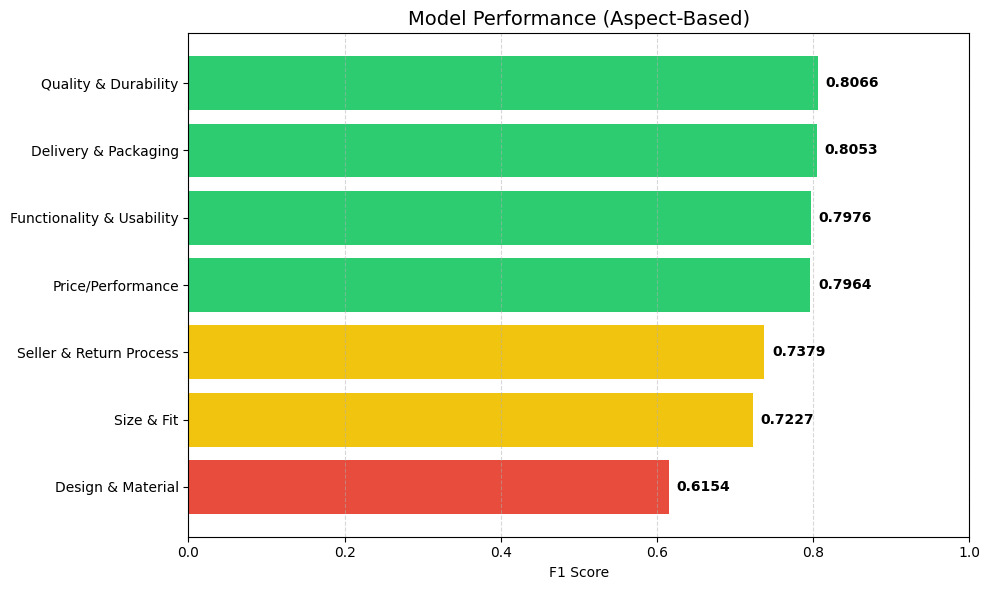

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

results = {
    "Quality & Durability": 0.8066,
    "Delivery & Packaging": 0.8053,
    "Functionality & Usability": 0.7976,
    "Price/Performance": 0.7964,
    "Seller & Return Process": 0.7379,
    "Size & Fit": 0.7227,
    "Design & Material": 0.6154
}

sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))

colors = ['#2ecc71' if v > 0.75 else '#f1c40f' if v > 0.70 else '#e74c3c' for v in sorted_results.values()]

bars = plt.barh(list(sorted_results.keys()), list(sorted_results.values()), color=colors)

for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}', va='center', fontsize=10, fontweight='bold')

plt.xlabel("F1 Score")
plt.title("Model Performance (Aspect-Based)", fontsize=14)
plt.xlim(0, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Real-time Prediction**

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MODEL_NAME = "dbmdz/bert-base-turkish-cased"
MAX_LEN = 128

ASPECTS = [
    "Fiyat/Performans",
    "Teslimat ve Paketleme",
    "Tasarım ve Malzeme",
    "Beden ve Uyum",
    "İşlevsellik ve Kullanım",
    "Kalite ve Sağlamlık",
    "Satıcı ve İade Süreci"
]

class MultiHeadBert(nn.Module):
    def __init__(self, model_name, num_aspects, num_classes=3):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        hidden = self.bert.config.hidden_size
        self.dropout = nn.Dropout(0.1)
        self.classifiers = nn.ModuleList([nn.Linear(hidden, num_classes) for _ in range(num_aspects)])

    def forward(self, input_ids, attention_mask):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled = self.dropout(out.last_hidden_state[:, 0, :])
        logits_list = [head(pooled) for head in self.classifiers]
        logits = torch.stack(logits_list, dim=1)
        return logits


print("⏳ Model yükleniyor, lütfen bekleyin...")

model = MultiHeadBert(MODEL_NAME, num_aspects=len(ASPECTS)).to(device)

try:
    model.load_state_dict(torch.load("absa_model_7_aspects.pt", map_location=device))
    model.eval()
    print("✅ Model başarıyla yüklendi!")
except FileNotFoundError:
    print("❌ HATA: 'absa_model_7_aspects.pt' dosyası bulunamadı. Eğitimi çalıştırdığından emin ol.")
    exit()

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

idx_to_sent = {0: "🔴 Negatif", 1: "⚪ Nötr/Yok", 2: "🟢 Pozitif"}


def predict_new_comment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=MAX_LEN).to(device)

    with torch.no_grad():
        logits = model(inputs["input_ids"], inputs["attention_mask"])
        preds = torch.argmax(logits, dim=-1).squeeze(0).cpu().numpy()

    print(f"\n📝 Yorum: {text}")
    print("-" * 50)

    aspect_found = False
    for i, aspect in enumerate(ASPECTS):
        prediction_idx = preds[i]
        sentiment = idx_to_sent[prediction_idx]

        if prediction_idx != 1:
            print(f"   🔹 {aspect:<25}: {sentiment}")
            aspect_found = True

    if not aspect_found:
        print("   (Model bu yorumda belirgin bir aspect bulamadı veya hepsi Nötr)")
    print("-" * 50)

#
while True:
    user_input = input("\n💬 comment: ")
    if user_input.lower() == 'q':
        print("Çıkış yapıldı.")
        break

    predict_new_comment(user_input)

⏳ Model yükleniyor, lütfen bekleyin...
✅ Model başarıyla yüklendi!

💬 comment: kargo iade edemedim

📝 Yorum: kargo iade edemedim
--------------------------------------------------
   🔹 Teslimat ve Paketleme    : 🔴 Negatif
--------------------------------------------------

💬 comment: iade

📝 Yorum: iade
--------------------------------------------------
   (Model bu yorumda belirgin bir aspect bulamadı veya hepsi Nötr)
--------------------------------------------------

💬 comment: küçük bot istedim ama devasa bir ayakkabı geldi

📝 Yorum: küçük bot istedim ama devasa bir ayakkabı geldi
--------------------------------------------------
   🔹 Beden ve Uyum            : 🔴 Negatif
   🔹 Satıcı ve İade Süreci    : 🔴 Negatif
--------------------------------------------------

💬 comment: f

📝 Yorum: f
--------------------------------------------------
   (Model bu yorumda belirgin bir aspect bulamadı veya hepsi Nötr)
--------------------------------------------------

💬 comment: küçük boy isted

**FINAL TRAİNİNG WİTH 14 CLUSTERS**

In [ ]:

!pip -q install transformers==4.44.2 accelerate datasets evaluate scikit-learn torch --upgrade

import os
import random
import numpy as np
import pandas as pd
import ast
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, get_linear_schedule_with_warmup

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 122.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.3/512.3 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 151.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/

In [ ]:


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🔥 Cihaz: {device}")


LABELS_PATH = "/content/labeled_reviews_parallel3.csv"
REVIEWS_PATH = "/content/reviews.csv"

try:
    df_labels = pd.read_csv(LABELS_PATH)
    df_reviews = pd.read_csv(REVIEWS_PATH)
    df_merged = pd.merge(df_labels, df_reviews[['id', 'review_text']], on='id', how='inner')
    print(f"✅ Birleştirme tamamlandı. Eşleşen toplam veri: {len(df_merged)}")
except FileNotFoundError as e:
    print(f"❌ HATA: Dosya bulunamadı! Yolunu kontrol et.\n{e}")
    exit()


df_merged.dropna(subset=['review_text', 'scores'], inplace=True)

def parse_scores(score_str):
    try:
        if isinstance(score_str, list):
            return score_str
        return ast.literal_eval(score_str)
    except:
        return None

df_merged['parsed_scores'] = df_merged['scores'].apply(parse_scores)
df_merged.dropna(subset=['parsed_scores'], inplace=True)


ASPECTS_DICT = {
    0: "Seller Errors", 1: "General Satisfaction", 2: "Size & Fit", 3: "Damaged/Broken Item",
    4: "Installation & Usage", 5: "Return Process", 6: "Seller Courtesy", 7: "Product Features",
    8: "General Quality", 9: "Color & Appearance", 10: "Durability Issues", 11: "Missing/Defective Item",
    12: "Price/Performance", 13: "Shipping Disasters"
}
ASPECT_NAMES = [ASPECTS_DICT[i] for i in range(len(ASPECTS_DICT))]
NUM_ASPECTS = len(ASPECT_NAMES)


map_to_idx = {-1: 0, 0: 1, 1: 2}
idx_to_sent = {0: "Negatif 😡", 1: "Nötr/Yok 😐", 2: "Pozitif 😃"}

def encode_labels_list(scores_list):
    encoded = []
    for s in scores_list:
        val = int(s)
        if val not in map_to_idx:
            encoded.append(map_to_idx[0])
        else:
            encoded.append(map_to_idx[val])
    return encoded

all_labels = np.stack(df_merged['parsed_scores'].apply(encode_labels_list))

train_texts, temp_texts, train_y, temp_y = train_test_split(
    df_merged['review_text'].tolist(), all_labels, test_size=0.2, random_state=SEED
)
val_texts, test_texts, val_y, test_y = train_test_split(
    temp_texts, temp_y, test_size=0.5, random_state=SEED
)


MODEL_NAME = "dbmdz/bert-base-turkish-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
MAX_LEN = 128

class ABSADataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return {
            "text": str(self.texts[idx]),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }

def collate_fn(batch):
    texts = [b["text"] for b in batch]
    labels = torch.stack([b["labels"] for b in batch])
    enc = tokenizer(texts, padding=True, truncation=True, max_length=MAX_LEN, return_tensors="pt")
    enc["labels"] = labels
    return enc

train_dataset = ABSADataset(train_texts, train_y)
val_dataset   = ABSADataset(val_texts, val_y)
test_dataset  = ABSADataset(test_texts, test_y)

BATCH_SIZE = 16
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)


class MultiHeadBert(nn.Module):
    def __init__(self, model_name, num_aspects, num_classes=3):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        hidden = self.bert.config.hidden_size

        self.dropout = nn.Dropout(0.3)

        self.classifiers = nn.ModuleList([nn.Linear(hidden, num_classes) for _ in range(num_aspects)])

    def forward(self, input_ids, attention_mask, labels=None):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled = self.dropout(out.last_hidden_state[:, 0, :])
        logits_list = [head(pooled) for head in self.classifiers]
        logits = torch.stack(logits_list, dim=1)

        loss = None
        if labels is not None:

            class_weights = torch.tensor([4.0, 1.0, 4.0]).to(logits.device)

            ce = nn.CrossEntropyLoss(weight=class_weights)

            losses = [ce(logits[:, i, :], labels[:, i]) for i in range(logits.shape[1])]
            loss = torch.mean(torch.stack(losses))

        return logits, loss

model = MultiHeadBert(MODEL_NAME, num_aspects=NUM_ASPECTS).to(device)


EPOCHS = 20
optimizer = torch.optim.AdamW(model.parameters(), lr=4e-5)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, 0, total_steps)

def evaluate(model, loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            logits, _ = model(batch["input_ids"], batch["attention_mask"])
            preds = torch.argmax(logits, dim=-1).cpu().numpy()
            y_true.append(batch["labels"].cpu().numpy())
            y_pred.append(preds)
    y_true = np.concatenate(y_true)
    y_pred = np.concatenate(y_pred)
    scores = {}
    for i, aspect_name in enumerate(ASPECT_NAMES):
        f1 = f1_score(y_true[:, i], y_pred[:, i], average="macro")
        scores[aspect_name] = f1
    scores["GENEL_F1"] = np.mean(list(scores.values()))
    return scores

train_losses = []
val_f1_scores = []

best_f1 = 0
print("\n🚀 Eğitim Başlıyor (14 Aspect - Weighted Loss)...")

for epoch in range(1, EPOCHS+1):
    model.train()
    total_loss = 0

    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        optimizer.zero_grad()
        _, loss = model(batch["input_ids"], batch["attention_mask"], batch["labels"])
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    val_scores = evaluate(model, val_loader)
    curr_f1 = val_scores['GENEL_F1']

    train_losses.append(avg_train_loss)
    val_f1_scores.append(curr_f1)

    print(f"Epoch {epoch}/{EPOCHS} | Loss: {avg_train_loss:.4f} | Val F1: {curr_f1:.4f}")

    if curr_f1 > best_f1:
        best_f1 = curr_f1
        torch.save(model.state_dict(), "absa_model_14_aspects.pt")
        print(f"✅ Model Kaydedildi! En iyi F1: {best_f1:.4f}")


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='red', linewidth=2, marker='o')
plt.title('Eğitim Kaybı (Weighted Loss)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_f1_scores, label='Validation F1', color='blue', linewidth=2, marker='s')
plt.title('Doğrulama Başarısı (Validation F1)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

🔥 Cihaz: cuda
✅ Birleştirme tamamlandı. Eşleşen toplam veri: 35460


/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



🚀 Eğitim Başlıyor (14 Aspect - Weighted Loss)...
Epoch 1/20 | Loss: 0.3083 | Val F1: 0.4932
✅ Model Kaydedildi! En iyi F1: 0.4932
Epoch 2/20 | Loss: 0.2464 | Val F1: 0.5266
✅ Model Kaydedildi! En iyi F1: 0.5266
Epoch 3/20 | Loss: 0.2115 | Val F1: 0.5378
✅ Model Kaydedildi! En iyi F1: 0.5378
Epoch 4/20 | Loss: 0.1797 | Val F1: 0.5353
Epoch 5/20 | Loss: 0.1463 | Val F1: 0.5334
Epoch 6/20 | Loss: 0.1186 | Val F1: 0.5284


**Delete data where all sentiment is 0.**

In [ ]:

def check_all_zeros(scores):
    return all(x == 0 for x in scores)

def check_single_aspect(scores):
    non_zero_count = sum(1 for x in scores if x != 0)
    return non_zero_count == 1

empty_rows = df_merged[df_merged['parsed_scores'].apply(check_all_zeros)]
single_rows = df_merged[df_merged['parsed_scores'].apply(check_single_aspect)]

print("-" * 40)
print(f"📉 ANALİZ SONUÇLARI")
print("-" * 40)
print(f"🔴 Tümü 0 olan (Hiçbir aspect yok) satır sayısı : {len(empty_rows)}")
print(f"🟢 Sadece 1 Aspect içeren (Tekil) satır sayısı    : {len(single_rows)}")
print(f"🔵 Toplam Veri Sayısı                             : {len(df_merged)}")
print("-" * 40)

if len(empty_rows) > 0:
    print("\nÖrnek: Tümü 0 Olan Satır:")
    print(f"ID: {empty_rows.iloc[0]['id']} | Skorlar: {empty_rows.iloc[0]['parsed_scores']}")

if len(single_rows) > 0:
    print("\nÖrnek: Sadece 1 Tanesi Dolu Olan Satır:")
    print(f"ID: {single_rows.iloc[0]['id']} | Skorlar: {single_rows.iloc[0]['parsed_scores']}")

----------------------------------------
📉 ANALİZ SONUÇLARI
----------------------------------------
🔴 Tümü 0 olan (Hiçbir aspect yok) satır sayısı : 2981
🟢 Sadece 1 Aspect içeren (Tekil) satır sayısı    : 18564
🔵 Toplam Veri Sayısı                             : 35460
----------------------------------------

Örnek: Tümü 0 Olan Satır:
ID: 59 | Skorlar: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Örnek: Sadece 1 Tanesi Dolu Olan Satır:
ID: 41 | Skorlar: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]


In [ ]:


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🔥 Cihaz: {device}")

LABELS_PATH = "/content/labeled_reviews_parallel3.csv"
REVIEWS_PATH = "/content/reviews.csv"

try:
    df_labels = pd.read_csv(LABELS_PATH)
    df_reviews = pd.read_csv(REVIEWS_PATH)
    df_merged = pd.merge(df_labels, df_reviews[['id', 'review_text']], on='id', how='inner')
    print(f"✅ Birleştirme tamamlandı. Ham veri sayısı: {len(df_merged)}")
except FileNotFoundError as e:
    print(f"❌ HATA: Dosya bulunamadı! Yolunu kontrol et.\n{e}")
    exit()


df_merged.dropna(subset=['review_text', 'scores'], inplace=True)

def parse_scores(score_str):
    try:
        if isinstance(score_str, list): return score_str
        return ast.literal_eval(score_str)
    except: return None

df_merged['parsed_scores'] = df_merged['scores'].apply(parse_scores)
df_merged.dropna(subset=['parsed_scores'], inplace=True)

initial_len = len(df_merged)
df_merged = df_merged[~df_merged['parsed_scores'].apply(lambda x: all(s == 0 for s in x))]
final_len = len(df_merged)

print("-" * 40)
print(f"🗑️ TEMİZLİK RAPORU:")
print(f"   Başlangıç Verisi : {initial_len}")
print(f"   Silinen (Tümü 0) : {initial_len - final_len}")
print(f"   Kalan Net Veri   : {final_len}")
print("-" * 40)


ASPECTS_DICT = {
    0: "Seller Errors", 1: "General Satisfaction", 2: "Size & Fit", 3: "Damaged/Broken Item",
    4: "Installation & Usage", 5: "Return Process", 6: "Seller Courtesy", 7: "Product Features",
    8: "General Quality", 9: "Color & Appearance", 10: "Durability Issues", 11: "Missing/Defective Item",
    12: "Price/Performance", 13: "Shipping Disasters"
}
ASPECT_NAMES = [ASPECTS_DICT[i] for i in range(len(ASPECTS_DICT))]
NUM_ASPECTS = len(ASPECT_NAMES)


map_to_idx = {-1: 0, 0: 1, 1: 2}
idx_to_sent = {0: "Negatif 😡", 1: "Nötr/Yok 😐", 2: "Pozitif 😃"}

def encode_labels_list(scores_list):
    encoded = []
    for s in scores_list:
        val = int(s)
        if val not in map_to_idx: encoded.append(map_to_idx[0])
        else: encoded.append(map_to_idx[val])
    return encoded

all_labels = np.stack(df_merged['parsed_scores'].apply(encode_labels_list))

flat_labels = all_labels.flatten()
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1, 2]),
    y=flat_labels
)

weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)

print("\n📊 YENİ AĞIRLIKLAR (Boş veriler silindikten sonra):")
print(f"   Negatif (0): {class_weights[0]:.4f}")
print(f"   Nötr    (1): {class_weights[1]:.4f}")
print(f"   Pozitif (2): {class_weights[2]:.4f}")
print("="*50 + "\n")

train_texts, temp_texts, train_y, temp_y = train_test_split(
    df_merged['review_text'].tolist(), all_labels, test_size=0.2, random_state=SEED
)
val_texts, test_texts, val_y, test_y = train_test_split(
    temp_texts, temp_y, test_size=0.5, random_state=SEED
)


MODEL_NAME = "dbmdz/bert-base-turkish-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
MAX_LEN = 128

class ABSADataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
    def __len__(self): return len(self.texts)
    def __getitem__(self, idx):
        return {
            "text": str(self.texts[idx]),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }

def collate_fn(batch):
    texts = [b["text"] for b in batch]
    labels = torch.stack([b["labels"] for b in batch])
    enc = tokenizer(texts, padding=True, truncation=True, max_length=MAX_LEN, return_tensors="pt")
    enc["labels"] = labels
    return enc

train_dataset = ABSADataset(train_texts, train_y)
val_dataset   = ABSADataset(val_texts, val_y)
test_dataset  = ABSADataset(test_texts, test_y)

BATCH_SIZE = 16
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)


class MultiHeadBert(nn.Module):
    def __init__(self, model_name, num_aspects, num_classes=3, loss_weights=None):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)

        for param in self.bert.embeddings.parameters():
            param.requires_grad = False
        for i in range(8):
            for param in self.bert.encoder.layer[i].parameters():
                param.requires_grad = False

        hidden = self.bert.config.hidden_size
        self.dropout = nn.Dropout(0.3)
        self.classifiers = nn.ModuleList([nn.Linear(hidden, num_classes) for _ in range(num_aspects)])
        self.loss_weights = loss_weights

    def forward(self, input_ids, attention_mask, labels=None):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled = self.dropout(out.last_hidden_state[:, 0, :])
        logits_list = [head(pooled) for head in self.classifiers]
        logits = torch.stack(logits_list, dim=1)

        loss = None
        if labels is not None:
            ce = nn.CrossEntropyLoss(weight=self.loss_weights)
            losses = [ce(logits[:, i, :], labels[:, i]) for i in range(logits.shape[1])]
            loss = torch.mean(torch.stack(losses))

        return logits, loss

model = MultiHeadBert(MODEL_NAME, num_aspects=NUM_ASPECTS, loss_weights=weights_tensor).to(device)


EPOCHS = 15
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, 0, total_steps)

def evaluate(model, loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            logits, _ = model(batch["input_ids"], batch["attention_mask"])
            preds = torch.argmax(logits, dim=-1).cpu().numpy()
            y_true.append(batch["labels"].cpu().numpy())
            y_pred.append(preds)
    y_true = np.concatenate(y_true)
    y_pred = np.concatenate(y_pred)

    scores = {}
    for i, aspect_name in enumerate(ASPECT_NAMES):
        f1 = f1_score(y_true[:, i], y_pred[:, i], average="macro")
        scores[aspect_name] = f1
    scores["GENEL_F1"] = np.mean(list(scores.values()))
    acc = accuracy_score(y_true.flatten(), y_pred.flatten())
    scores["ACCURACY"] = acc
    return scores

train_losses = []
val_f1_scores = []
val_accuracies = []

best_f1 = 0
print("\n🚀 Eğitim Başlıyor (Temizlenmiş Veri + Auto Weights)...")

for epoch in range(1, EPOCHS+1):
    model.train()
    total_loss = 0

    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        optimizer.zero_grad()
        _, loss = model(batch["input_ids"], batch["attention_mask"], batch["labels"])
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    val_scores = evaluate(model, val_loader)

    curr_f1 = val_scores['GENEL_F1']
    curr_acc = val_scores['ACCURACY']

    train_losses.append(avg_train_loss)
    val_f1_scores.append(curr_f1)
    val_accuracies.append(curr_acc)

    print(f"Epoch {epoch}/{EPOCHS} | Loss: {avg_train_loss:.4f} | Val F1: {curr_f1:.4f} | Val Acc: {curr_acc:.4f}")

    if curr_f1 > best_f1:
        best_f1 = curr_f1
        torch.save(model.state_dict(), "absa_model_cleaned.pt")
        print(f"✅ Model Kaydedildi! En iyi F1: {best_f1:.4f}")


plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Loss', color='red', marker='o'); plt.title('Loss'); plt.legend()
plt.subplot(1, 3, 2)
plt.plot(val_f1_scores, label='F1', color='blue', marker='s'); plt.title('F1 Score'); plt.legend()
plt.subplot(1, 3, 3)
plt.plot(val_accuracies, label='Accuracy', color='green', marker='^'); plt.title('Accuracy'); plt.legend()
plt.show()

**Synthetic data enhancement**

In [ ]:
new_data_csv = """comment_id,comment_text,sentiments
1,"Ürün genel olarak çok hoşuma gitti, kullanımı kolaydı ve kaliteli hissettiriyor ama kutu ezilmişti ve teslimat geç geldi, fiyatına göre yine de iyi diyebilirim.","[0,1,0,0,1,0,0,0,1,0,0,0,1,-1]"
2,"Ürün yanlış renk gönderildi, iade süreci çok zahmetliydi ama satıcı nazikti ve ürünün özellikleri beklendiği gibiydi, fiyatı da uygundu.","[-1,0,0,0,0,-1,1,1,0,-1,0,0,1,0]"
3,"Boyutu bana küçük geldi, ilk kullanımda parçası kırıldı ve dayanıklılığı çok kötü ama satıcı hızlı kargolamış ve kurulumu kolaydı.","[0,0,-1,1,1,0,1,0,0,0,-1,0,0,0]"
4,"Ürün hasarlı geldi, içinden bir parça eksikti ve kutu dağılmıştı ama iade süreci hızlıydı ve param sorunsuz geri yattı.","[0,0,0,-1,0,1,0,0,0,0,0,-1,0,-1]"
5,"Genel olarak memnun kaldım, rengi çok güzel, kaliteli duruyor ve fiyatına göre performansı yüksek fakat uzun vadede dayanıklı olacağını sanmıyorum.","[0,1,0,0,0,0,0,0,1,1,-1,0,1,0]"
6,"Ürün özellikleri anlatıldığı gibiydi, kullanımı pratikti ve satıcı küçük bir hediye koymuş ama teslimat sırasında kutu ciddi şekilde zarar görmüş.","[0,0,0,0,1,0,1,1,0,0,0,0,0,-1]"
7,"Ürün hiç gelmedi, kargo firması rezaletti ve satıcı hatayı kabul etmedi, iade süreci de çok uzadı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
8,"Ürünü çok beğendim, hem kaliteli hem de fiyatına göre çok başarılı, rengi fotoğraftakiyle aynı ve kullanımı da oldukça rahat.","[0,1,0,0,1,0,0,0,1,1,0,0,1,0]"
9,"İlk başta her şey iyiydi ama kısa sürede bozuldu, dayanıklılığı zayıf, ayrıca kargo geç geldi fakat ürünün özellikleri hoştu.","[0,0,0,0,0,0,0,1,0,0,-1,0,0,-1]"
10,"Satıcı çok ilgiliydi, ürün hızlı geldi, kurulumu kolaydı ve genel kalitesi yüksek ama fiyatı biraz pahalı.","[0,1,0,0,1,0,1,0,1,0,0,0,-1,0]"
11,"Ürün beklediğimden kaliteli çıktı, kullanımı rahat ve rengi çok hoş ama kargo gecikti ve kutu ezilmişti, fiyatına göre yine iyi.","[0,1,0,0,1,0,0,0,1,1,0,0,1,-1]"
12,"Yanlış ürün gönderilmişti, iade süreci yorucuydu ama satıcı özür dileyip yardımcı oldu, ürün özellik olarak fena değildi.","[-1,0,0,0,0,-1,1,1,0,0,0,0,0,0]"
13,"Ürün çok çabuk kırıldı, dayanıklılığı kötü ve parça eksikti ama kurulumu kolaydı ve fiyatı uygundu.","[0,0,0,1,1,0,0,0,0,0,-1,-1,1,0]"
14,"Genel olarak memnun kaldım, ürün kaliteli ve kullanımı pratik, satıcı da nazikti fakat rengi görseldekinden farklıydı.","[0,1,0,0,1,0,1,0,1,-1,0,0,0,0]"
15,"Ürün hasarlı geldi, kargo rezaletti ve iade süreci uzadı ama satıcı sonunda yardımcı oldu.","[0,0,0,-1,0,-1,1,0,0,0,0,0,0,-1]"
16,"Fiyatına göre performansı çok iyi, özellikleri başarılı ve genel kalite hissi yüksek ama uzun vadede dayanıklı değil.","[0,1,0,0,0,0,0,1,1,0,-1,0,1,0]"
17,"Ürün hiç gelmedi, kargo kayboldu, satıcı ilgisizdi ve iade almak tam bir işkenceydi.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
18,"Ürünü çok sevdim, rengi ve görünümü harika, kullanımı kolay ve fiyatına göre fazlasıyla kaliteli.","[0,1,0,0,1,0,0,0,1,1,0,0,1,0]"
19,"İlk kullanımda sorun yoktu ama kısa sürede bozuldu, dayanıklılığı kötü ve fiyatına değmez.","[0,0,0,0,0,0,0,0,0,0,-1,0,-1,0]"
20,"Satıcı çok ilgiliydi, ürün hızlı geldi, kurulumu kolay ve genel kalite iyi ama kutu hasarlıydı.","[0,1,0,0,1,0,1,0,1,0,0,0,0,-1]"
21,"Ürün yanlış beden gönderildi, iade süreci uzun sürdü ama ürünün kalitesi ve özellikleri iyiydi.","[-1,0,-1,0,0,-1,0,1,1,0,0,0,0,0]"
22,"Kargo geç geldi, kutu patlamıştı ve ürün sızdırmış ama satıcı hızlıca telafi etti.","[0,0,0,-1,0,0,1,1,0,0,0,0,0,-1]"
23,"Ürün beklediğim gibi çıktı, kullanımı rahat ve kaliteli ama fiyatı biraz yüksek.","[0,1,0,0,1,0,0,0,1,0,0,0,-1,0]"
24,"Eksik parça vardı, ürün tam çalışmadı ve iade süreci sinir bozucuydu.","[0,0,0,0,0,-1,0,0,0,0,0,-1,0,0]"
25,"Genel memnuniyetim yüksek, ürün kaliteli, görünümü güzel ve kullanımı çok kolay.","[0,1,0,0,1,0,0,0,1,1,0,0,0,0]"
26,"Ürün çok çabuk yıprandı, dayanıklılığı zayıf ama özellikleri ve kullanımı fena değildi.","[0,0,0,0,1,0,0,1,0,0,-1,0,0,0]"
27,"Satıcı yanlış ürün gönderdi, kargo geç geldi ama iade süreci sorunsuzdu.","[-1,0,0,0,0,1,0,0,0,0,0,0,0,-1]"
28,"Ürün fiyatına göre çok iyi, kaliteli hissettiriyor ve rengi çok şık.","[0,1,0,0,0,0,0,0,1,1,0,0,1,0]"
29,"Ürün hasarlıydı, kutu ezilmişti ve dayanıklılığı da zayıf çıktı.","[0,0,0,-1,0,0,0,0,0,0,-1,0,0,-1]"
30,"Satıcı hızlı kargoladı, ürün sorunsuz geldi, kurulumu kolay ve genel kalite başarılı.","[0,1,0,0,1,0,1,0,1,0,0,0,0,0]"
31,"Ürün genel olarak iyi ama yanlış renk gönderilmişti, kargo geç geldi, kutu hasarlıydı yine de kullanımı kolay ve kalite fena değil.","[-1,0,0,0,1,0,0,0,1,-1,0,0,0,-1]"
32,"Ürün kaliteli duruyor, özellikleri güzel ve fiyat performans açısından başarılı ama ilk haftada parçası kırıldı.","[0,1,0,1,0,0,0,1,1,0,-1,0,1,0]"
33,"Kargo çok kötüydü, kutu parçalanmıştı ve ürün sızdırmış, ayrıca dayanıklılığı da zayıf çıktı.","[0,0,0,-1,0,0,0,1,0,0,-1,0,0,-1]"
34,"Ürün eksik parça ile geldi, iade süreci çok uzundu ama satıcı ilgiliydi ve sonunda sorun çözüldü.","[0,0,0,0,0,-1,1,0,0,0,0,-1,0,0]"
35,"Genel olarak memnunum, ürün kaliteli, rengi güzel, kullanımı rahat ve fiyatına göre oldukça iyi.","[0,1,0,0,1,0,0,0,1,1,0,0,1,0]"
36,"Ürün yanlış beden geldi, iade etmek zorunda kaldım, kargo da geç teslim edildi ama satıcı nazikti.","[-1,0,-1,0,0,-1,1,0,0,0,0,0,0,-1]"
37,"Başta her şey iyiydi fakat kısa sürede bozuldu, dayanıklılığı kötü ve fiyatına kesinlikle değmez.","[0,0,0,0,0,0,0,0,0,0,-1,0,-1,0]"
38,"Satıcı çok ilgiliydi, ürün hızlı geldi, kurulumu kolay ve genel kalite beklentimin üzerindeydi.","[0,1,0,0,1,0,1,0,1,0,0,0,0,0]"
39,"Ürün hasarlıydı, bir parçası eksikti ve kutu dağılmıştı, iade süreci de sinir bozucuydu.","[0,0,0,-1,0,-1,0,0,0,0,0,-1,0,-1]"
40,"Ürün özellik olarak başarılı, kullanımı pratik ve kaliteli ama fiyatı biraz pahalı ve rengi farklı geldi.","[0,1,0,0,1,0,0,1,1,-1,0,0,-1,0]"
41,"Ürün genel olarak tatmin edici, kullanımı kolay ve kaliteli ama kargo gecikti, kutu ezilmişti ve fiyatı biraz pahalı.","[0,1,0,0,1,0,0,0,1,0,0,0,-1,-1]"
42,"Yanlış ürün gönderildi, iade süreci çok yordu fakat satıcı nazikti, ürün özellikleri fena değildi ve fiyatı uygundu.","[-1,0,0,0,0,-1,1,1,0,0,0,0,1,0]"
43,"Ürün hasarlı geldi, bir parça eksikti ve kutu patlamıştı ama kurulumu kolaydı ve satıcı hızlı dönüş yaptı.","[0,0,0,-1,1,0,1,0,0,0,0,-1,0,-1]"
44,"Genel memnuniyetim yüksek, ürün kaliteli, rengi çok güzel ve fiyat performans olarak başarılı.","[0,1,0,0,0,0,0,0,1,1,0,0,1,0]"
45,"Ürün kısa sürede bozuldu, dayanıklılığı zayıf, iade süreci uzundu ve fiyatına kesinlikle değmez.","[0,0,0,0,0,-1,0,0,0,0,-1,0,-1,0]"
46,"Satıcı çok ilgiliydi, ürün hızlı geldi, kurulumu kolaydı ama kutu hasarlı ve rengi farklıydı.","[0,1,0,0,1,0,1,0,0,-1,0,0,0,-1]"
47,"Ürün hiç gelmedi, kargo kayboldu, satıcı hatayı kabul etmedi ve iade almak çok zordu.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
48,"Ürün özellikleri beklentimi karşıladı, kullanımı rahat, kaliteli ve fiyatına göre çok iyi.","[0,1,0,0,1,0,0,1,1,0,0,0,1,0]"
49,"Ürün yanlış beden geldi, iade ettim, kargo da geç teslim edildi ama satıcı yardımcı olmaya çalıştı.","[-1,0,-1,0,0,-1,1,0,0,0,0,0,0,-1]"
50,"Ürün sağlam geldi, kurulumu kolaydı, genel kalite iyi fakat fiyat biraz yüksek.","[0,1,0,0,1,0,0,0,1,0,0,0,-1,0]"
51,"Ürün sızdırmıştı, kutu dağılmıştı ve dayanıklılığı da kötü çıktı.","[0,0,0,-1,0,0,0,1,0,0,-1,0,0,-1]"
52,"Genel olarak memnun kaldım, ürün kaliteli, görünümü güzel, kullanımı rahat.","[0,1,0,0,1,0,0,0,1,1,0,0,0,0]"
53,"Eksik parça vardı, ürün tam çalışmadı, iade süreci sinir bozucuydu ve fiyatına değmez.","[0,0,0,0,0,-1,0,0,0,0,0,-1,-1,0]"
54,"Ürün hızlı geldi, satıcı nazikti, kurulumu kolay ve genel kalite başarılı.","[0,1,0,0,1,0,1,0,1,0,0,0,0,0]"
55,"Ürün kısa sürede yıprandı, dayanıklılığı zayıf ama özellikleri ve kullanımı fena değildi.","[0,0,0,0,1,0,0,1,0,0,-1,0,0,0]"
56,"Yanlış renk gönderildi, iade süreci uzadı ama ürün kaliteli ve fiyatı uygundu.","[-1,0,0,0,0,-1,0,0,1,-1,0,0,1,0]"
57,"Ürün hasarlı geldi, kutu ezilmişti, kargo geç kaldı ve satıcı ilgisizdi.","[-1,0,0,-1,0,0,0,0,0,0,0,0,0,-1]"
58,"Ürün beklentimin üzerindeydi, kaliteli, rengi güzel ve fiyat performansı çok iyi.","[0,1,0,0,0,0,0,0,1,1,0,0,1,0]"
59,"Ürün hiç gelmedi, kargo rezaletti, iade süreci çok uzundu.","[0,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
60,"Satıcı çok ilgiliydi, ürün sorunsuz geldi, kurulumu kolay ve genel memnuniyetim yüksek.","[0,1,0,0,1,0,1,0,1,0,0,0,0,0]"
61,"Ürün kaliteli ve kullanımı rahat ama yanlış renk gönderilmişti, kargo geç geldi ve kutu hasarlıydı.","[-1,1,0,0,1,0,0,0,1,-1,0,0,0,-1]"
62,"Genel olarak memnun kaldım, ürün özellikleri başarılı, fiyat performansı iyi fakat dayanıklılığı zayıf çıktı.","[0,1,0,0,0,0,0,1,1,0,-1,0,1,0]"
63,"Ürün hasarlı geldi, parçası eksikti, iade süreci uzadı ama satıcı sonunda yardımcı oldu.","[0,0,0,-1,0,-1,1,0,0,0,0,-1,0,0]"
64,"Ürün çok şık görünüyor, rengi güzel, kaliteli hissettiriyor ve kullanımı kolay.","[0,1,0,0,1,0,0,0,1,1,0,0,0,0]"
65,"Yanlış ürün gönderildi, iade etmek zorunda kaldım, kargo da geç teslim edildi.","[-1,0,0,0,0,-1,0,0,0,0,0,0,0,-1]"
66,"Ürün beklentimi karşıladı, özellikleri güzel, genel kalite iyi ama fiyat biraz pahalı.","[0,1,0,0,0,0,0,1,1,0,0,0,-1,0]"
67,"Ürün kısa sürede bozuldu, dayanıklılığı çok kötü ve fiyatına kesinlikle değmez.","[0,0,0,0,0,0,0,0,0,0,-1,0,-1,0]"
68,"Satıcı çok ilgiliydi, ürün hızlı geldi, kurulumu kolay ve genel kalite başarılı.","[0,1,0,0,1,0,1,0,1,0,0,0,0,0]"
69,"Ürün sızdırmıştı, kutu patlamıştı ve kargo çok geç geldi.","[0,0,0,-1,0,0,0,1,0,0,0,0,0,-1]"
70,"Ürün fiyatına göre çok iyi, kaliteli, kullanımı rahat ve görünümü güzel.","[0,1,0,0,1,0,0,0,1,1,0,0,1,0]"
71,"Eksik parça nedeniyle ürün çalışmadı, iade süreci sinir bozucuydu ve satıcı ilgisizdi.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,0]"
72,"Ürün özellikleri anlatıldığı gibi, kurulumu kolay ve genel kalite beklentimin üzerinde.","[0,1,0,0,1,0,0,1,1,0,0,0,0,0]"
73,"Yanlış beden gönderildi, iade süreci uzadı ama ürünün kalitesi fena değildi.","[-1,0,-1,0,0,-1,0,0,1,0,0,0,0,0]"
74,"Ürün sağlam geldi, kargo hızlıydı, satıcı nazikti ve kullanımı çok pratik.","[0,1,0,0,1,0,1,0,0,0,0,0,0,0]"
75,"Ürün hasarlıydı, kutu ezilmişti, dayanıklılığı zayıf çıktı.","[0,0,0,-1,0,0,0,0,0,0,-1,0,0,-1]"
76,"Genel memnuniyetim yüksek, ürün kaliteli, rengi çok hoş ve fiyat performansı başarılı.","[0,1,0,0,0,0,0,0,1,1,0,0,1,0]"
77,"Ürün hiç gelmedi, kargo kayboldu, iade süreci çok uzundu.","[0,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
78,"Ürün özellik olarak başarılı, kullanımı rahat, genel kalite iyi ama fiyatı pahalı.","[0,1,0,0,1,0,0,1,1,0,0,0,-1,0]"
79,"Yanlış renk ve hasarlı ürün geldi, kargo da geç teslim edildi.","[-1,0,0,-1,0,0,0,0,0,-1,0,0,0,-1]"
80,"Satıcı çok ilgiliydi, ürün sorunsuz geldi, kurulumu kolay ve genel olarak çok memnunum.","[0,1,0,0,1,0,1,0,1,0,0,0,0,0]"
81,"Ürün kaliteli ve kullanımı rahat ama yanlış ürün gönderildi, iade süreci uzadı ve kargo geç geldi.","[-1,1,0,0,1,-1,0,0,1,0,0,0,0,-1]"
82,"Genel olarak memnun kaldım, ürünün özellikleri başarılı, rengi güzel ve fiyat performansı iyi.","[0,1,0,0,0,0,0,1,1,1,0,0,1,0]"
83,"Ürün hasarlı geldi, kutu patlamıştı, dayanıklılığı zayıf ve iade süreci çok yorucuydu.","[0,0,0,-1,0,-1,0,0,0,0,-1,0,0,-1]"
84,"Satıcı çok ilgiliydi, ürün hızlı geldi, kurulumu kolay ve genel kalite beklentimin üzerindeydi.","[0,1,0,0,1,0,1,0,1,0,0,0,0,0]"
85,"Yanlış beden gönderildi, iade etmek zorunda kaldım ama ürünün kalitesi ve özellikleri iyiydi.","[-1,0,-1,0,0,-1,0,1,1,0,0,0,0,0]"
86,"Ürün kısa sürede bozuldu, dayanıklılığı çok kötü ve fiyatına kesinlikle değmez.","[0,0,0,0,0,0,0,0,0,0,-1,0,-1,0]"
87,"Ürün sağlam geldi, kargo hızlıydı, rengi güzel ve kullanımı çok pratik.","[0,1,0,0,1,0,0,0,1,1,0,0,0,0]"
88,"Eksik parça vardı, ürün tam çalışmadı, satıcı ilgisizdi ve iade süreci uzadı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,0]"
89,"Ürün özellikleri beklentimi karşıladı, kaliteli hissettiriyor ama fiyatı biraz pahalı.","[0,1,0,0,0,0,0,1,1,0,0,0,-1,0]"
90,"Kargo çok geç geldi, kutu ezilmişti ve ürün hasarlıydı.","[0,0,0,-1,0,0,0,0,0,0,0,0,0,-1]"
91,"Genel memnuniyetim yüksek, ürün kaliteli, rengi şık ve fiyat performansı başarılı.","[0,1,0,0,0,0,0,0,1,1,0,0,1,0]"
92,"Yanlış ürün gönderilmişti, iade süreci zorlayıcıydı ama satıcı sonunda yardımcı oldu.","[-1,0,0,0,0,-1,1,0,0,0,0,0,0,0]"
93,"Ürün sızdırmıştı, kutu patlamıştı ve kargo firması çok geç teslim etti.","[0,0,0,-1,0,0,0,1,0,0,0,0,0,-1]"
94,"Ürün beklentimin üzerinde çıktı, kullanımı kolay, kaliteli ve fiyatına göre çok iyi.","[0,1,0,0,1,0,0,0,1,0,0,0,1,0]"
95,"Ürün hiç gelmedi, kargo kayboldu ve iade almak çok zor oldu.","[0,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
96,"Satıcı nazikti, ürün hızlı geldi, kurulumu kolay ama rengi görseldekinden farklıydı.","[0,1,0,0,1,0,1,0,0,-1,0,0,0,0]"
97,"Ürün kısa sürede yıprandı, dayanıklılığı zayıf ama özellikleri fena değildi.","[0,0,0,0,1,0,0,1,0,0,-1,0,0,0]"
98,"Ürün kaliteli, kullanımı rahat ve görünümü güzel ama fiyat biraz yüksek.","[0,1,0,0,1,0,0,0,1,1,0,0,-1,0]"
99,"Eksik parça nedeniyle ürün çalışmadı, iade süreci uzadı ve satıcı ilgisizdi.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,0]"
100,"Ürün sorunsuz geldi, kurulumu kolaydı ve genel kalite beklentimi karşıladı.","[0,1,0,0,1,0,0,0,1,0,0,0,0,0]"
101,"Yanlış renk gönderildi, kargo geç geldi ama ürün kaliteli ve kullanımı rahattı.","[-1,0,0,0,1,0,0,0,1,-1,0,0,0,-1]"
102,"Ürün fiyatına göre başarılı, özellikleri iyi ve genel kalite yüksek.","[0,1,0,0,0,0,0,1,1,0,0,0,1,0]"
103,"Ürün hasarlıydı, kutu ezilmişti ve dayanıklılığı çok zayıf çıktı.","[0,0,0,-1,0,0,0,0,0,0,-1,0,0,-1]"
104,"Satıcı çok ilgiliydi, ürün hızlı geldi ve genel memnuniyetim yüksek.","[0,1,0,0,0,0,1,0,1,0,0,0,0,0]"
105,"Ürün yanlış beden geldi, iade süreci uzundu ama ürünün kalitesi iyiydi.","[-1,0,-1,0,0,-1,0,0,1,0,0,0,0,0]"
106,"Ürün kısa sürede bozuldu, fiyatına değmez ve dayanıklılığı çok kötü.","[0,0,0,0,0,0,0,0,0,0,-1,0,-1,0]"
107,"Ürün sağlam geldi, rengi güzel, kullanımı pratik ve fiyat performansı iyi.","[0,1,0,0,1,0,0,0,1,1,0,0,1,0]"
108,"Ürün hiç gelmedi, kargo gecikti ve iade süreci çok yorucuydu.","[0,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
109,"Ürün kaliteli hissettiriyor, özellikleri başarılı ama fiyat biraz pahalı.","[0,1,0,0,0,0,0,1,1,0,0,0,-1,0]"
110,"Satıcı nazikti, ürün sorunsuz geldi, kurulumu kolay ve genel olarak memnunum.","[0,1,0,0,1,0,1,0,1,0,0,0,0,0]"
111,"Ürün genel olarak kaliteli ve kullanımı kolay, rengi çok hoş ama yanlış ürün gönderilmişti, kargo geç geldi, kutu hasarlıydı ve iade süreci uzadı.","[-1,1,0,0,1,-1,0,0,1,1,0,0,0,-1]"
112,"Ürün özellik olarak başarılı, kaliteli hissettiriyor ve fiyat performansı iyi fakat kısa sürede bozuldu, dayanıklılığı zayıf, kargo da geç teslim edildi.","[0,1,0,0,0,0,0,1,1,0,-1,0,1,-1]"
113,"Yanlış beden gönderildi, iade süreci yorucuydu, kargo gecikti ama satıcı nazikti, ürün kaliteli ve görünümü güzeldi.","[-1,0,-1,0,0,-1,1,0,1,1,0,0,0,-1]"
114,"Ürün hasarlı geldi, parçası eksikti, kutu patlamıştı ve dayanıklılığı da zayıf ama kurulumu kolaydı.","[0,0,0,-1,1,0,0,0,0,0,-1,-1,0,-1]"
115,"Genel olarak memnun kaldım, ürün kaliteli, kullanımı rahat, rengi güzel ve fiyatına göre performansı iyi ama kargo geç geldi.","[0,1,0,0,1,0,0,0,1,1,0,0,1,-1]"
116,"Ürün hiç gelmedi, kargo kayboldu, satıcı ilgisizdi, iade süreci çok uzadı ve fiyatına değmez bir deneyimdi.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
117,"Ürün özellikleri beklentimi karşıladı, kurulumu kolay, genel kalite iyi ama yanlış renk gönderildi ve fiyat biraz pahalıydı.","[-1,1,0,0,1,0,0,1,1,-1,0,0,-1,0]"
118,"Ürün sağlam geldi, kullanımı rahat, satıcı çok ilgiliydi, kargo hızlıydı fakat kısa sürede yıprandı.","[0,1,0,0,1,0,1,0,1,0,-1,0,0,0]"
119,"Eksik parça nedeniyle ürün tam çalışmadı, iade süreci sinir bozucuydu, satıcı ilgisizdi ve kargo da geç geldi.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
120,"Ürün kaliteli, görünümü şık, kullanımı kolay ve fiyat performansı başarılı ama kutu hasarlı geldi.","[0,1,0,0,1,0,0,0,1,1,0,0,1,-1]"
121,"Ürün kaliteli ve kullanımı kolay, rengi güzel ama yanlış ürün gönderildi, kargo geç geldi, kutu hasarlıydı ve iade süreci uzadı.","[-1,1,0,0,1,-1,0,0,1,1,0,0,0,-1]"
122,"Genel memnuniyetim var, ürün özellikleri başarılı ve fiyat performansı iyi fakat kısa sürede bozuldu, dayanıklılığı zayıf ve kargo da gecikti.","[0,1,0,0,0,0,0,1,1,0,-1,0,1,-1]"
123,"Yanlış beden gönderildi, iade süreci yorucuydu, kargo geç geldi ama satıcı nazikti ve ürünün kalitesi iyiydi.","[-1,0,-1,0,0,-1,1,0,1,0,0,0,0,-1]"
124,"Ürün hasarlı geldi, parçası eksikti, kutu patlamıştı ve dayanıklılığı zayıftı ama kurulumu oldukça kolaydı.","[0,0,0,-1,1,0,0,0,0,0,-1,-1,0,-1]"
125,"Ürün kaliteli, kullanımı rahat, rengi çok hoş ve fiyat performansı iyi fakat kargo geç teslim edildi.","[0,1,0,0,1,0,0,0,1,1,0,0,1,-1]"
126,"Ürün hiç gelmedi, kargo kayboldu, satıcı ilgisizdi, iade süreci çok uzadı ve fiyatına kesinlikle değmezdi.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
127,"Ürün özellikleri beklentimi karşıladı, genel kalite iyi ve kullanımı kolay ama yanlış renk gönderildi ve fiyat pahalıydı.","[-1,1,0,0,1,0,0,1,1,-1,0,0,-1,0]"
128,"Ürün sağlam geldi, kullanımı rahat, satıcı çok ilgiliydi, kargo hızlıydı fakat kısa sürede yıprandı.","[0,1,0,0,1,0,1,0,1,0,-1,0,0,0]"
129,"Eksik parça yüzünden ürün çalışmadı, iade süreci sinir bozucuydu, satıcı ilgisizdi ve kargo da geç geldi.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
130,"Ürün kaliteli, görünümü şık, kullanımı kolay ve fiyat performansı başarılı ama kutu hasarlı geldi.","[0,1,0,0,1,0,0,0,1,1,0,0,1,-1]"
131,"Ürün genel olarak memnun edici, kullanımı kolay ve kaliteli; özellikleri ve rengi güzel ama yanlış ürün gönderildi, iade süreci uzadı ve kargo geç geldi, fiyat performansı yine de iyi.","[-1,1,0,0,1,-1,0,1,1,1,0,0,1,-1]"
132,"Beden bana uymadı, ürün hasarlıydı, iade süreci zorladı; buna rağmen kurulumu kolaydı ve satıcı nazikti ama dayanıklılığı zayıf, fiyatına değmez ve kargo da gecikti.","[0,0,-1,-1,1,-1,1,0,0,0,-1,0,-1,-1]"
133,"Ürünü sevdim; özellikleri başarılı, kaliteli ve rengi şık fakat kısa sürede yıprandı, bir parçası eksikti ve kargo geç teslim edildi, satıcı yine de yardımcı oldu.","[0,1,0,0,0,0,1,1,1,1,-1,-1,0,-1]"
134,"Yanlış ürün ve yanlış beden gönderildi, iade süreci uzadı; buna karşın satıcı ilgiliydi, ürünün özellikleri ve kalitesi iyi, fiyat performansı da fena değil ama kargo gecikti.","[-1,0,-1,0,0,-1,1,1,1,0,0,0,1,-1]"
135,"Ürün hasarlı ve kutusu ezilmiş geldi, bir parçası eksikti; buna rağmen kurulumu kolay, rengi güzel ve kalite hissi iyi fakat dayanıklılığı zayıf.","[0,0,0,-1,1,0,0,0,1,1,-1,-1,0,-1]"
136,"Genel olarak memnunum; kullanımı kolay, satıcı çok ilgili, özellikleri ve genel kalitesi iyi ama fiyat biraz pahalı ve kargo gecikti.","[0,1,0,0,1,0,1,1,1,0,0,0,-1,-1]"
137,"Yanlış ürün gönderildi, ürün hasarlıydı ve eksik parça vardı; iade süreci uzadı, dayanıklılığı kötüydü ve kargo rezaletti ama satıcı telafi etmeye çalıştı.","[-1,0,0,-1,0,-1,1,0,0,0,-1,-1,0,-1]"
138,"Ürün bana tam uydu, kurulumu kolay, özellikleri başarılı; kaliteli, rengi şık ve fiyat performansı çok iyi.","[0,1,1,0,1,0,0,1,1,1,0,0,1,0]"
139,"Ürün hasarlı geldi, iade süreci sinir bozucuydu; kurulumu kolaydı, satıcı nazikti, özellikleri güzel ama dayanıklılığı zayıf ve kargo gecikti.","[0,0,0,-1,1,-1,1,1,0,0,-1,0,0,-1]"
140,"Genel memnuniyetim yüksek; kullanımı kolay, satıcı ilgili, özellikleri ve genel kalitesi iyi, rengi güzel ve fiyat performansı başarılı.","[0,1,0,0,1,0,1,1,1,1,0,0,1,0]"
141,"Ürün kaliteli ve kullanımı kolay, özellikleri başarılı ve rengi hoş ama yanlış ürün gönderildi, iade süreci uzadı ve kargo geç geldi.","[-1,1,0,0,1,-1,0,1,1,1,0,0,0,-1]"
142,"Genel memnuniyetim var; ürün kaliteli, kurulumu kolay ve fiyat performansı iyi fakat kısa sürede bozuldu, dayanıklılığı zayıf ve kargo gecikti.","[0,1,0,0,1,0,0,0,1,0,-1,0,1,-1]"
143,"Yanlış beden gönderildi, iade süreci yorucuydu; satıcı nazikti ama kargo geç geldi, ürünün kalitesi iyi ve görünümü güzeldi.","[-1,0,-1,0,0,-1,1,0,1,1,0,0,0,-1]"
144,"Ürün hasarlı geldi, parçası eksikti ve kutu patlamıştı; kurulumu kolaydı ama dayanıklılığı zayıf ve kargo da geç teslim edildi.","[0,0,0,-1,1,0,0,0,0,0,-1,-1,0,-1]"
145,"Ürün kaliteli, kullanımı rahat, rengi çok hoş ve fiyat performansı başarılı fakat kargo geç geldi ve kutu hasarlıydı.","[0,1,0,0,1,0,0,0,1,1,0,0,1,-1]"
146,"Ürün hiç gelmedi, kargo kayboldu; iade süreci çok uzadı, satıcı ilgisizdi ve fiyatına kesinlikle değmez.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
147,"Ürün özellikleri beklentimi karşıladı, genel kalite iyi ve kullanımı kolay ama yanlış renk gönderildi, fiyat pahalıydı.","[-1,1,0,0,1,0,0,1,1,-1,0,0,-1,0]"
148,"Ürün sağlam geldi, kullanımı rahat; satıcı çok ilgiliydi ve kargo hızlıydı fakat kısa sürede yıprandı.","[0,1,0,0,1,0,1,0,1,0,-1,0,0,0]"
149,"Eksik parça yüzünden ürün çalışmadı; iade süreci sinir bozucuydu, satıcı ilgisizdi ve kargo geç geldi.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
150,"Ürün kaliteli, görünümü şık, kullanımı kolay ve fiyat performansı iyi ama kutu hasarlı geldi.","[0,1,0,0,1,0,0,0,1,1,0,0,1,-1]"
151,"Yanlış ürün ve yanlış renk gönderildi; iade süreci uzadı, kargo geç geldi ama ürünün kalitesi ve özellikleri iyiydi.","[-1,0,0,0,0,-1,0,1,1,-1,0,0,0,-1]"
152,"Genel olarak memnunum; ürün kaliteli, kurulumu kolay, satıcı ilgili fakat dayanıklılığı zayıf ve fiyat biraz pahalı.","[0,1,0,0,1,0,1,0,1,0,-1,0,-1,0]"
153,"Ürün hasarlı ve eksik parça ile geldi; iade süreci uzadı, kargo rezaletti ama satıcı telafi etmeye çalıştı.","[-1,0,0,-1,0,-1,1,0,0,0,0,-1,0,-1]"
154,"Ürün özellik olarak başarılı, kaliteli hissettiriyor; kullanımı rahat ve rengi güzel ama fiyatı yüksek.","[0,1,0,0,1,0,0,1,1,1,0,0,-1,0]"
155,"Ürün kısa sürede bozuldu; dayanıklılığı kötü, iade süreci zorlayıcı ve fiyatına değmez, kargo da gecikti.","[0,0,0,0,0,-1,0,0,0,0,-1,0,-1,-1]"
156,"Ürün sorunsuz geldi; satıcı nazikti, kurulumu kolay ve genel kalite iyi ama yanlış renk gönderilmişti.","[-1,1,0,0,1,0,1,0,1,-1,0,0,0,0]"
157,"Ürün hiç gelmedi; kargo kayboldu, satıcı ilgisizdi, iade süreci çok uzadı ve tam bir hayal kırıklığıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
158,"Ürün beklentimin üzerinde çıktı; kullanımı kolay, özellikleri başarılı, kaliteli ve fiyat performansı çok iyi.","[0,1,0,0,1,0,0,1,1,0,0,0,1,0]"
159,"Ürün hasarlı geldi, kutu ezilmişti; dayanıklılığı zayıf, iade süreci sinir bozucuydu ve kargo geç geldi.","[0,0,0,-1,0,-1,0,0,0,0,-1,0,0,-1]"
161,"Ürün genel olarak güzel ve kaliteli, kullanımı kolay, özellikleri başarılı ve rengi hoş; satıcı nazikti ama yanlış ürün gönderilmiş, kargo geç kalmış ve kutu hasarlı gelmiş, iade süreci de uzadı, fiyatına göre yine fena değil.","[-1,1,0,0,1,-1,1,1,1,1,0,0,1,-1]"
162,"Beklentimi karşıladı; ürün kaliteli, kullanımı rahat ve özellikleri iyi fakat beden küçük geldi, kısa sürede yıprandı, kargo gecikti, kutu ezilmişti ve fiyat biraz pahalıydı.","[0,1,-1,0,1,0,0,1,1,1,-1,0,-1,-1]"
163,"Ürün hasarlı geldi, parçası eksikti ve kutu patlamıştı; kurulumu kolay olsa da ürün çabuk bozuldu, iade süreci zorladı, kargo gecikti ve satıcı pek yardımcı olmadı.","[-1,0,0,-1,1,-1,0,0,0,0,-1,-1,0,-1]"
164,"Genel memnuniyetim var; ürün kaliteli, rengi güzel ve özellikleri başarılı, kullanımı da kolay ama yanlış renk gönderildi, kargo geç geldi, kutu hasarlıydı ve fiyat biraz yüksek.","[-1,1,0,0,1,0,0,1,1,-1,0,0,-1,-1]"
165,"Ürün hiç gelmedi, kargo kayboldu; satıcı ilgisizdi, iade süreci çok uzadı ve fiyatına değmezdi, ayrıca sipariş zaten yanlış işlenmiş gibiydi.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
166,"Ürün çok şık görünüyor; rengi güzel, kaliteli ve kullanımı rahat, özellikleri de iyi fakat kısa sürede bozuldu, dayanıklılığı zayıf ve fiyat performansı bu yüzden düştü.","[0,1,0,0,1,0,0,1,1,1,-1,0,-1,0]"
167,"Yanlış beden ve yanlış renk geldi; iade süreci uzadı, kargo gecikti ama satıcı nazikti, ürünün kalitesi fena değil ve özellikleri de idare eder.","[-1,0,-1,0,0,-1,1,1,1,-1,0,0,0,-1]"
168,"Ürün hasarlı geldi, kutu ezilmişti; buna rağmen kullanım kolay ama ürün kısa sürede yıprandı, dayanıklılığı kötü, iade süreci zordu ve kargo geç geldi.","[0,0,0,-1,1,-1,0,0,0,0,-1,0,0,-1]"
169,"Ürün sağlam geldi, satıcı çok ilgiliydi ve hızlı kargoladı; kurulumu kolay, ürün kaliteli ve rengi güzel, fiyat performansı da iyi.","[0,1,0,0,1,0,1,0,1,1,0,0,1,0]"
170,"Ürün yanlış ürün olarak geldi ve bir parçası eksikti; kargo gecikti, kutu hasarlıydı, iade süreci uzadı ama satıcı telafi etmeye çalıştı.","[-1,0,0,0,0,-1,1,0,0,0,0,-1,0,-1]"
171,"Ürün beklentimi karşıladı; kullanımı kolay, özellikleri iyi ve genel kalite yüksek, rengi de güzel ama fiyat pahalı ve kargo gecikti.","[0,1,0,0,1,0,0,1,1,1,0,0,-1,-1]"
172,"Beden büyük geldi, iade etmek zorunda kaldım; satıcı nazikti ve ürün kaliteli görünüyordu ama kargo geç geldi ve kutu ezilmişti.","[0,0,-1,0,0,-1,1,0,1,0,0,0,0,-1]"
173,"Ürün hasarlı ve sızdırmış şekilde geldi, kutu patlamıştı; ürünün özellikleri iyiydi ama kalite hissi düştü, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,0,-1,0,1,-1,0,0,0,0,-1]"
174,"Ürün kısa sürede bozuldu ve dayanıklılığı zayıf; yine de kullanımı kolay ve özellikleri güzel ama fiyatına değmez, ayrıca kargo geç geldi.","[0,0,0,0,1,0,0,1,0,0,-1,0,-1,-1]"
175,"Yanlış ürün gönderildi, kutu hasarlıydı ve kargo gecikti; iade süreci uzadı ama satıcı nazikti, ürünün rengi güzel ve kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,1,0,0,0,-1]"
176,"Ürün eksik parça ile geldi, kurulumu bu yüzden zorlaştı; iade süreci yorucuydu, satıcı ilgisizdi ve kargo da geç geldi.","[-1,0,0,0,-1,-1,0,0,0,0,0,-1,0,-1]"
177,"Ürün kaliteli, kullanımı rahat ve özellikleri başarılı, rengi şık; satıcı ilgili ve hızlıydı ama fiyat biraz pahalı.","[0,1,0,0,1,0,1,1,1,1,0,0,-1,0]"
178,"Ürün hiç gelmedi, kargo gecikti ve sonunda kayboldu; satıcı ilgisizdi, iade süreci uzadı ve tam bir kargo faciasıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
179,"Ürün hasarlı geldi ve kısa sürede bozuldu; dayanıklılık kötü, iade süreci sinir bozucu, kargo gecikmişti ama ürünün özellikleri aslında güzel.","[0,0,0,-1,0,-1,0,1,0,0,-1,0,0,-1]"
180,"Genel olarak çok memnunum; ürün kaliteli, kullanımı kolay, özellikleri iyi, rengi güzel ve fiyat performansı başarılı, satıcı da nazik ve hızlıydı.","[0,1,0,0,1,0,1,1,1,1,0,0,1,0]"
181,"Ürün kaliteli ve kullanımı kolay, özellikleri başarılı ve rengi güzel; satıcı nazikti ama yanlış ürün gönderildi, kargo geç geldi, kutu hasarlıydı, iade süreci uzadı ve fiyat biraz pahalıydı.","[-1,1,0,0,1,-1,1,1,1,1,0,0,-1,-1]"
182,"Ürün genel olarak iyi hissettiriyor, kurulumu kolay ve özellikleri başarılı fakat beden uymadı, kısa sürede yıprandı, kargo gecikti, kutu ezilmişti ve fiyatına değmez.","[0,1,-1,0,1,0,0,1,1,0,-1,0,-1,-1]"
183,"Ürün hasarlı geldi, parçası eksikti, kutu patlamıştı; buna rağmen kullanımı kolay ama ürün çabuk bozuldu, iade süreci zorladı ve kargo geç teslim edildi.","[0,0,0,-1,1,-1,0,0,0,0,-1,-1,0,-1]"
184,"Genel memnuniyetim var; ürün kaliteli, rengi güzel, özellikleri iyi ve kullanımı rahat ama yanlış renk gönderildi, kargo gecikti, kutu hasarlıydı ve fiyat pahalıydı.","[-1,1,0,0,1,0,0,1,1,-1,0,0,-1,-1]"
185,"Ürün hiç gelmedi, kargo kayboldu; satıcı ilgisizdi, iade süreci çok uzadı, fiyatına değmezdi ve sipariş süreci baştan hatalıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
186,"Ürün şık görünüyor, rengi güzel, kullanımı rahat ve özellikleri iyi fakat kısa sürede bozuldu, dayanıklılığı zayıf ve fiyat performansı hayal kırıklığı yarattı.","[0,1,0,0,1,0,0,1,1,1,-1,0,-1,0]"
187,"Yanlış beden ve yanlış renk gönderildi, iade süreci uzadı, kargo geç geldi ama satıcı nazikti, ürünün kalitesi ve özellikleri yine de fena değildi.","[-1,0,-1,0,0,-1,1,1,1,-1,0,0,0,-1]"
188,"Ürün hasarlı geldi, kutu ezilmişti; kullanımı kolay olsa da kısa sürede yıprandı, dayanıklılığı kötüydü, iade süreci zordu ve kargo geç geldi.","[0,0,0,-1,1,-1,0,0,0,0,-1,0,0,-1]"
189,"Ürün sağlam geldi, satıcı çok ilgiliydi, kargo hızlıydı; kurulumu kolay, ürün kaliteli, rengi güzel ve fiyat performansı başarılı.","[0,1,0,0,1,0,1,0,1,1,0,0,1,0]"
190,"Yanlış ürün gönderildi, parça eksikti, kargo gecikti, kutu hasarlıydı; iade süreci uzadı ama satıcı telafi etmeye çalıştı.","[-1,0,0,0,0,-1,1,0,0,0,0,-1,0,-1]"
191,"Ürün beklentimi karşıladı; kullanımı kolay, özellikleri iyi, genel kalite yüksek ve rengi güzel ama fiyat pahalı ve kargo geç geldi.","[0,1,0,0,1,0,0,1,1,1,0,0,-1,-1]"
192,"Beden büyük geldi, iade etmek zorunda kaldım; satıcı nazikti, ürün kaliteli görünüyordu ama kargo gecikti ve kutu ezilmişti.","[0,0,-1,0,0,-1,1,0,1,0,0,0,0,-1]"
193,"Ürün sızdırmıştı, kutu patlamıştı; ürünün özellikleri iyiydi ama kalite hissi düştü, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,0,-1,0,1,-1,0,0,0,0,-1]"
194,"Ürün kısa sürede bozuldu, dayanıklılığı zayıf; buna rağmen kullanımı kolay ve özellikleri güzel ama fiyatına değmez ve kargo geç geldi.","[0,0,0,0,1,0,0,1,0,0,-1,0,-1,-1]"
195,"Yanlış ürün gönderildi, kutu hasarlıydı ve kargo gecikti; iade süreci uzadı ama satıcı nazikti, ürünün rengi güzel ve kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,1,0,0,0,-1]"
196,"Ürün eksik parça ile geldi, kurulumu bu yüzden zorlaştı; iade süreci yorucuydu, satıcı ilgisizdi ve kargo da geç geldi.","[-1,0,0,0,-1,-1,0,0,0,0,0,-1,0,-1]"
197,"Ürün kaliteli, kullanımı rahat, özellikleri başarılı ve rengi şık; satıcı ilgiliydi ama fiyat biraz pahalıydı.","[0,1,0,0,1,0,1,1,1,1,0,0,-1,0]"
198,"Ürün hiç gelmedi, kargo gecikti ve kayboldu; satıcı ilgisizdi, iade süreci uzadı ve tam bir kargo faciasıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
199,"Ürün hasarlı geldi ve kısa sürede bozuldu; dayanıklılığı kötü, iade süreci sinir bozucuydu, kargo gecikmişti ama özellikleri güzeldi.","[0,0,0,-1,0,-1,0,1,0,0,-1,0,0,-1]"
200,"Genel olarak çok memnunum; ürün kaliteli, kullanımı kolay, özellikleri iyi, rengi güzel, fiyat performansı başarılı ve satıcı çok ilgiliydi.","[0,1,0,0,1,0,1,1,1,1,0,0,1,0]"
201,"Ürün kaliteli ve kullanımı kolay, özellikleri başarılı, rengi güzel ve genel kalite iyi; ancak yanlış ürün gönderildi, kargo geç geldi, kutu hasarlıydı, iade süreci uzadı ve fiyat biraz pahalıydı.","[-1,1,0,0,1,-1,0,1,1,1,0,0,-1,-1]"
202,"Genel olarak memnunum; ürün kaliteli, kurulumu kolay, özellikleri iyi ve fiyat performansı fena değil ama kısa sürede bozuldu, dayanıklılığı zayıf ve kargo gecikti.","[0,1,0,0,1,0,0,1,1,0,-1,0,1,-1]"
203,"Yanlış beden gönderildi, iade süreci yorucuydu; ürün hasarlıydı, bir parçası eksikti, kargo gecikti ama satıcı nazikti.","[-1,0,-1,-1,0,-1,1,0,0,0,0,-1,0,-1]"
204,"Ürün hasarlı geldi, kutu patlamıştı ve ürün sızdırmıştı; kurulumu kolay olsa da kısa sürede bozuldu, iade süreci uzadı ve kargo rezaletti.","[0,0,0,-1,1,-1,0,1,0,0,-1,0,0,-1]"
205,"Ürün hiç gelmedi, kargo kayboldu; satıcı ilgisizdi, iade süreci çok uzadı, fiyatına değmezdi ve sipariş süreci baştan hatalıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
206,"Ürün çok şık, rengi güzel, kaliteli ve kullanımı rahat; özellikleri iyi ama kısa sürede yıprandı, dayanıklılığı zayıf ve fiyat performansı düştü.","[0,1,0,0,1,0,0,1,1,1,-1,0,-1,0]"
207,"Yanlış ürün ve yanlış renk gönderildi, iade süreci uzadı, kargo gecikti; buna rağmen satıcı nazikti ve ürünün kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,-1,0,0,0,-1]"
208,"Ürün hasarlı geldi, bir parçası eksikti; kullanımı kolaydı ama ürün kısa sürede bozuldu, dayanıklılığı kötü ve kargo geç geldi.","[0,0,0,-1,1,0,0,0,0,0,-1,-1,0,-1]"
209,"Ürün sağlam geldi, satıcı çok ilgiliydi, kargo hızlıydı; kurulumu kolay, ürün kaliteli, rengi güzel ve fiyat performansı başarılı.","[0,1,0,0,1,0,1,0,1,1,0,0,1,0]"
210,"Yanlış ürün gönderildi, kutu hasarlıydı, kargo gecikti ve parça eksikti; iade süreci uzadı ama satıcı telafi etmeye çalıştı.","[-1,0,0,0,0,-1,1,0,0,0,0,-1,0,-1]"
211,"Ürün beklentimi karşıladı; kullanımı kolay, özellikleri iyi, genel kalite yüksek ve rengi güzel ama fiyat pahalı ve kargo geç geldi.","[0,1,0,0,1,0,0,1,1,1,0,0,-1,-1]"
212,"Beden uymadı, iade etmek zorunda kaldım; ürün hasarlıydı, kargo gecikti ama satıcı nazikti ve ürünün kalitesi iyiydi.","[0,0,-1,-1,0,-1,1,0,1,0,0,0,0,-1]"
213,"Ürün sızdırmıştı, kutu patlamıştı; özellikleri iyiydi ama kalite hissi düştü, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,0,-1,0,1,-1,0,0,0,0,-1]"
214,"Ürün kısa sürede bozuldu, dayanıklılığı zayıf; yine de kullanımı kolay ve özellikleri güzel ama fiyatına değmez, kargo da gecikti.","[0,0,0,0,1,0,0,1,0,0,-1,0,-1,-1]"
215,"Yanlış ürün gönderildi, kutu hasarlıydı ve kargo geç geldi; iade süreci uzadı ama satıcı nazikti, ürünün rengi güzel ve kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,1,0,0,0,-1]"
216,"Ürün eksik parça ile geldi, kurulumu bu yüzden zorlaştı; iade süreci yorucuydu, satıcı ilgisizdi ve kargo da geç geldi.","[-1,0,0,0,-1,-1,0,0,0,0,0,-1,0,-1]"
217,"Ürün kaliteli, kullanımı rahat, özellikleri başarılı ve rengi şık; satıcı ilgiliydi ama fiyat biraz pahalıydı.","[0,1,0,0,1,0,1,1,1,1,0,0,-1,0]"
218,"Ürün hiç gelmedi, kargo gecikti ve sonunda kayboldu; satıcı ilgisizdi, iade süreci uzadı ve tam bir kargo faciasıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
219,"Ürün hasarlı geldi ve kısa sürede bozuldu; dayanıklılığı kötü, iade süreci sinir bozucuydu, kargo gecikmişti ama özellikleri güzeldi.","[0,0,0,-1,0,-1,0,1,0,0,-1,0,0,-1]"
220,"Genel olarak çok memnunum; ürün kaliteli, kullanımı kolay, özellikleri iyi, rengi güzel, fiyat performansı başarılı ve satıcı çok ilgiliydi.","[0,1,0,0,1,0,1,1,1,1,0,0,1,0]"
221,"Ürün kaliteli, kullanımı kolay, özellikleri başarılı ve rengi güzel; satıcı nazikti ama yanlış ürün gönderildi, kargo geç geldi, kutu hasarlıydı, iade süreci uzadı ve fiyat pahalıydı.","[-1,1,0,0,1,-1,1,1,1,1,0,0,-1,-1]"
222,"Genel olarak memnunum; ürün kaliteli, kurulumu kolay ve özellikleri iyi fakat beden uymadı, kısa sürede bozuldu, dayanıklılığı zayıf ve kargo gecikti.","[0,1,-1,0,1,0,0,1,1,0,-1,0,0,-1]"
223,"Yanlış beden ve yanlış ürün gönderildi, ürün hasarlıydı, parça eksikti; iade süreci uzadı, kargo gecikti ama satıcı nazikti.","[-1,0,-1,-1,0,-1,1,0,0,0,0,-1,0,-1]"
224,"Ürün hasarlı geldi, kutu patlamıştı ve ürün sızdırmıştı; kurulumu kolaydı ama kısa sürede bozuldu, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,1,-1,0,1,0,0,-1,0,0,-1]"
225,"Ürün hiç gelmedi, kargo kayboldu; satıcı ilgisizdi, iade süreci çok uzadı, fiyatına değmezdi ve sipariş baştan hatalıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
226,"Ürün şık görünüyor, rengi güzel, kaliteli ve kullanımı rahat; özellikleri iyi ama kısa sürede yıprandı, dayanıklılığı zayıf ve fiyat performansı düştü.","[0,1,0,0,1,0,0,1,1,1,-1,0,-1,0]"
227,"Yanlış ürün ve yanlış renk gönderildi, iade süreci uzadı, kargo gecikti; buna rağmen satıcı nazikti ve ürünün kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,-1,0,0,0,-1]"
228,"Ürün hasarlı geldi, bir parçası eksikti; kullanımı kolaydı ama ürün kısa sürede bozuldu, dayanıklılığı kötü ve kargo geç geldi.","[0,0,0,-1,1,0,0,0,0,0,-1,-1,0,-1]"
229,"Ürün sağlam geldi, satıcı çok ilgiliydi ve kargo hızlıydı; kurulumu kolay, ürün kaliteli, rengi güzel ve fiyat performansı başarılı.","[0,1,0,0,1,0,1,0,1,1,0,0,1,0]"
230,"Yanlış ürün gönderildi, kutu hasarlıydı, kargo gecikti ve parça eksikti; iade süreci uzadı ama satıcı telafi etmeye çalıştı.","[-1,0,0,0,0,-1,1,0,0,0,0,-1,0,-1]"
231,"Ürün beklentimi karşıladı; kullanımı kolay, özellikleri iyi, genel kalite yüksek ve rengi güzel ama fiyat pahalı ve kargo geç geldi.","[0,1,0,0,1,0,0,1,1,1,0,0,-1,-1]"
232,"Beden uymadı, ürün hasarlıydı, iade etmek zorunda kaldım; kargo gecikti ama satıcı nazikti ve kalite fena değildi.","[0,0,-1,-1,0,-1,1,0,1,0,0,0,0,-1]"
233,"Ürün sızdırmıştı, kutu patlamıştı; özellikleri iyiydi ama kalite hissi düştü, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,0,-1,0,1,-1,0,0,0,0,-1]"
234,"Ürün kısa sürede bozuldu, dayanıklılığı zayıf; buna rağmen kullanımı kolay ve özellikleri güzel ama fiyatına değmez, kargo da gecikti.","[0,0,0,0,1,0,0,1,0,0,-1,0,-1,-1]"
235,"Yanlış ürün gönderildi, kutu hasarlıydı ve kargo geç geldi; iade süreci uzadı ama satıcı nazikti, ürünün rengi güzel ve kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,1,0,0,0,-1]"
236,"Ürün eksik parça ile geldi, kurulumu bu yüzden zorlaştı; iade süreci yorucuydu, satıcı ilgisizdi ve kargo da geç geldi.","[-1,0,0,0,-1,-1,0,0,0,0,0,-1,0,-1]"
237,"Ürün kaliteli, kullanımı rahat, özellikleri başarılı ve rengi şık; satıcı ilgiliydi ama fiyat biraz pahalıydı.","[0,1,0,0,1,0,1,1,1,1,0,0,-1,0]"
238,"Ürün hiç gelmedi, kargo gecikti ve sonunda kayboldu; satıcı ilgisizdi, iade süreci uzadı ve tam bir kargo faciasıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
239,"Ürün hasarlı geldi ve kısa sürede bozuldu; dayanıklılığı kötü, iade süreci sinir bozucuydu, kargo gecikmişti ama özellikleri güzeldi.","[0,0,0,-1,0,-1,0,1,0,0,-1,0,0,-1]"
240,"Genel olarak çok memnunum; ürün kaliteli, kullanımı kolay, özellikleri iyi, rengi güzel, fiyat performansı başarılı ve satıcı çok ilgiliydi.","[0,1,0,0,1,0,1,1,1,1,0,0,1,0]"
241,"Ürün kaliteli, kullanımı kolay, özellikleri başarılı ve rengi güzel; satıcı ilgiliydi ama yanlış ürün gönderildi, kargo geç geldi, kutu hasarlıydı, iade süreci uzadı ve fiyat pahalıydı.","[-1,1,0,0,1,-1,1,1,1,1,0,0,-1,-1]"
242,"Genel olarak memnunum; ürün kaliteli, kurulumu kolay ve özellikleri iyi fakat beden uymadı, kısa sürede bozuldu, dayanıklılığı zayıf ve kargo gecikti.","[0,1,-1,0,1,0,0,1,1,0,-1,0,0,-1]"
243,"Yanlış ürün ve yanlış beden gönderildi, ürün hasarlıydı ve parçası eksikti; iade süreci uzadı, kargo gecikti ama satıcı nazikti.","[-1,0,-1,-1,0,-1,1,0,0,0,0,-1,0,-1]"
244,"Ürün hasarlı geldi, kutu patlamıştı ve ürün sızdırmıştı; kurulumu kolaydı ama kısa sürede bozuldu, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,1,-1,0,1,0,0,-1,0,0,-1]"
245,"Ürün hiç gelmedi, kargo kayboldu; satıcı ilgisizdi, iade süreci çok uzadı, fiyatına değmezdi ve sipariş süreci baştan hatalıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
246,"Ürün şık görünüyor, rengi güzel, kaliteli ve kullanımı rahat; özellikleri iyi ama kısa sürede yıprandı, dayanıklılığı zayıf ve fiyat performansı düştü.","[0,1,0,0,1,0,0,1,1,1,-1,0,-1,0]"
247,"Yanlış ürün ve yanlış renk gönderildi, iade süreci uzadı, kargo gecikti; buna rağmen satıcı ilgiliydi ve ürünün kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,-1,0,0,0,-1]"
248,"Ürün hasarlı geldi, bir parçası eksikti; kullanımı kolaydı ama ürün kısa sürede bozuldu, dayanıklılığı kötü ve kargo geç geldi.","[0,0,0,-1,1,0,0,0,0,0,-1,-1,0,-1]"
249,"Ürün sağlam geldi, satıcı çok ilgiliydi ve kargo hızlıydı; kurulumu kolay, ürün kaliteli, rengi güzel ve fiyat performansı başarılı.","[0,1,0,0,1,0,1,0,1,1,0,0,1,0]"
250,"Yanlış ürün gönderildi, kutu hasarlıydı, kargo gecikti ve parça eksikti; iade süreci uzadı ama satıcı telafi etmeye çalıştı.","[-1,0,0,0,0,-1,1,0,0,0,0,-1,0,-1]"
251,"Ürün beklentimi karşıladı; kullanımı kolay, özellikleri iyi, genel kalite yüksek ve rengi güzel ama fiyat pahalı ve kargo geç geldi.","[0,1,0,0,1,0,0,1,1,1,0,0,-1,-1]"
252,"Beden uymadı, ürün hasarlıydı, iade etmek zorunda kaldım; kargo gecikti ama satıcı nazikti ve ürün kaliteli görünüyordu.","[0,0,-1,-1,0,-1,1,0,1,0,0,0,0,-1]"
253,"Ürün sızdırmıştı, kutu patlamıştı; özellikleri iyiydi ama kalite hissi düştü, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,0,-1,0,1,-1,0,0,0,0,-1]"
254,"Ürün kısa sürede bozuldu, dayanıklılığı zayıf; yine de kullanımı kolay ve özellikleri güzel ama fiyatına değmez, kargo da gecikti.","[0,0,0,0,1,0,0,1,0,0,-1,0,-1,-1]"
255,"Yanlış ürün gönderildi, kutu hasarlıydı ve kargo geç geldi; iade süreci uzadı ama satıcı nazikti, ürünün rengi güzel ve kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,1,0,0,0,-1]"
256,"Ürün eksik parça ile geldi, kurulumu bu yüzden zorlaştı; iade süreci yorucuydu, satıcı ilgisizdi ve kargo da geç geldi.","[-1,0,0,0,-1,-1,0,0,0,0,0,-1,0,-1]"
257,"Ürün kaliteli, kullanımı rahat, özellikleri başarılı ve rengi şık; satıcı ilgiliydi ama fiyat biraz pahalıydı.","[0,1,0,0,1,0,1,1,1,1,0,0,-1,0]"
258,"Ürün hiç gelmedi, kargo gecikti ve sonunda kayboldu; satıcı ilgisizdi, iade süreci uzadı ve tam bir kargo faciasıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
259,"Ürün hasarlı geldi ve kısa sürede bozuldu; dayanıklılığı kötü, iade süreci sinir bozucuydu, kargo gecikmişti ama özellikleri güzeldi.","[0,0,0,-1,0,-1,0,1,0,0,-1,0,0,-1]"
260,"Genel olarak çok memnunum; ürün kaliteli, kullanımı kolay, özellikleri iyi, rengi güzel, fiyat performansı başarılı ve satıcı çok ilgiliydi.","[0,1,0,0,1,0,1,1,1,1,0,0,1,0]"
261,"Ürün kaliteli, kullanımı kolay, özellikleri başarılı ve rengi güzel; satıcı ilgiliydi ama yanlış ürün gönderildi, kargo geç geldi, kutu hasarlıydı, iade süreci uzadı ve fiyat pahalıydı.","[-1,1,0,0,1,-1,1,1,1,1,0,0,-1,-1]"
262,"Genel olarak memnunum; ürün kaliteli, kurulumu kolay ve özellikleri iyi fakat beden uymadı, kısa sürede bozuldu, dayanıklılığı zayıf ve kargo gecikti.","[0,1,-1,0,1,0,0,1,1,0,-1,0,0,-1]"
263,"Yanlış ürün ve yanlış beden gönderildi, ürün hasarlıydı ve parçası eksikti; iade süreci uzadı, kargo gecikti ama satıcı nazikti.","[-1,0,-1,-1,0,-1,1,0,0,0,0,-1,0,-1]"
264,"Ürün hasarlı geldi, kutu patlamıştı ve ürün sızdırmıştı; kurulumu kolaydı ama kısa sürede bozuldu, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,1,-1,0,1,0,0,-1,0,0,-1]"
265,"Ürün hiç gelmedi, kargo kayboldu; satıcı ilgisizdi, iade süreci çok uzadı, fiyatına değmezdi ve sipariş süreci baştan hatalıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
266,"Ürün şık görünüyor, rengi güzel, kaliteli ve kullanımı rahat; özellikleri iyi ama kısa sürede yıprandı, dayanıklılığı zayıf ve fiyat performansı düştü.","[0,1,0,0,1,0,0,1,1,1,-1,0,-1,0]"
267,"Yanlış ürün ve yanlış renk gönderildi, iade süreci uzadı, kargo gecikti; buna rağmen satıcı ilgiliydi ve ürünün kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,-1,0,0,0,-1]"
268,"Ürün hasarlı geldi, bir parçası eksikti; kullanımı kolaydı ama ürün kısa sürede bozuldu, dayanıklılığı kötü ve kargo geç geldi.","[0,0,0,-1,1,0,0,0,0,0,-1,-1,0,-1]"
269,"Ürün sağlam geldi, satıcı çok ilgiliydi ve kargo hızlıydı; kurulumu kolay, ürün kaliteli, rengi güzel ve fiyat performansı başarılı.","[0,1,0,0,1,0,1,0,1,1,0,0,1,0]"
270,"Yanlış ürün gönderildi, kutu hasarlıydı, kargo gecikti ve parça eksikti; iade süreci uzadı ama satıcı telafi etmeye çalıştı.","[-1,0,0,0,0,-1,1,0,0,0,0,-1,0,-1]"
271,"Ürün beklentimi karşıladı; kullanımı kolay, özellikleri iyi, genel kalite yüksek ve rengi güzel ama fiyat pahalı ve kargo geç geldi.","[0,1,0,0,1,0,0,1,1,1,0,0,-1,-1]"
272,"Beden uymadı, ürün hasarlıydı, iade etmek zorunda kaldım; kargo gecikti ama satıcı nazikti ve ürün kaliteli görünüyordu.","[0,0,-1,-1,0,-1,1,0,1,0,0,0,0,-1]"
273,"Ürün sızdırmıştı, kutu patlamıştı; özellikleri iyiydi ama kalite hissi düştü, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,0,-1,0,1,-1,0,0,0,0,-1]"
274,"Ürün kısa sürede bozuldu, dayanıklılığı zayıf; yine de kullanımı kolay ve özellikleri güzel ama fiyatına değmez, kargo da gecikti.","[0,0,0,0,1,0,0,1,0,0,-1,0,-1,-1]"
275,"Yanlış ürün gönderildi, kutu hasarlıydı ve kargo geç geldi; iade süreci uzadı ama satıcı nazikti, ürünün rengi güzel ve kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,1,0,0,0,-1]"
276,"Ürün eksik parça ile geldi, kurulumu bu yüzden zorlaştı; iade süreci yorucuydu, satıcı ilgisizdi ve kargo da geç geldi.","[-1,0,0,0,-1,-1,0,0,0,0,0,-1,0,-1]"
277,"Ürün kaliteli, kullanımı rahat, özellikleri başarılı ve rengi şık; satıcı ilgiliydi ama fiyat biraz pahalıydı.","[0,1,0,0,1,0,1,1,1,1,0,0,-1,0]"
278,"Ürün hiç gelmedi, kargo gecikti ve sonunda kayboldu; satıcı ilgisizdi, iade süreci uzadı ve tam bir kargo faciasıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
279,"Ürün hasarlı geldi ve kısa sürede bozuldu; dayanıklılığı kötü, iade süreci sinir bozucuydu, kargo gecikmişti ama özellikleri güzeldi.","[0,0,0,-1,0,-1,0,1,0,0,-1,0,0,-1]"
280,"Genel olarak çok memnunum; ürün kaliteli, kullanımı kolay, özellikleri iyi, rengi güzel, fiyat performansı başarılı ve satıcı çok ilgiliydi.","[0,1,0,0,1,0,1,1,1,1,0,0,1,0]"
281,"Ürün kaliteli ve kullanımı kolay, özellikleri başarılı ve rengi güzel; satıcı nazikti ama yanlış ürün gönderildi, kargo geç geldi, kutu hasarlıydı, iade süreci uzadı ve fiyat pahalıydı.","[-1,1,0,0,1,-1,1,1,1,1,0,0,-1,-1]"
282,"Genel olarak memnunum; ürün kaliteli, kurulumu kolay ve özellikleri iyi fakat beden uymadı, kısa sürede bozuldu, kargo gecikti ve fiyatına değmez.","[0,1,-1,0,1,0,1,1,1,0,-1,0,-1,-1]"
283,"Yanlış ürün ve yanlış beden gönderildi, ürün hasarlıydı ve parçası eksikti; kurulumu kolaydı ama iade süreci uzadı, kargo gecikti ve satıcı yine de yardımcı oldu.","[-1,0,-1,-1,1,-1,1,0,1,1,0,-1,0,-1]"
284,"Ürün hasarlı geldi, kutu patlamıştı ve ürün sızdırmıştı; kurulumu kolaydı ama kısa sürede bozuldu, iade süreci zorladı, kargo rezaletti ve fiyat pahalıydı.","[0,1,0,-1,1,-1,0,1,1,1,-1,0,1,-1]"
285,"Ürün hiç gelmedi, kargo kayboldu; satıcı ilgisizdi, iade süreci çok uzadı ama ürün kaliteli görünüyordu, rengi güzeldi ve fiyatına değmezdi.","[-1,1,0,0,1,-1,1,0,1,1,0,-1,-1,-1]"
286,"Ürün şık görünüyor; rengi güzel, kaliteli ve kullanımı rahat, özellikleri iyi ama kısa sürede yıprandı, dayanıklılığı zayıf ve fiyat performansı düştü, kargo da gecikti.","[0,1,0,0,1,0,1,1,1,1,-1,0,-1,-1]"
287,"Yanlış ürün gönderildi, iade süreci uzadı, kargo gecikti ve renk farklı geldi; satıcı ilgiliydi ama ürün kısa sürede bozuldu ve dayanıklılığı zayıftı.","[-1,0,0,0,1,-1,1,1,1,-1,-1,0,0,-1]"
288,"Ürün sağlam geldi, satıcı çok ilgiliydi ve kargo hızlıydı; kurulumu kolay, ürün kaliteli, rengi güzel ama kısa sürede yıprandı ve kutu hasarlıydı.","[0,1,0,0,1,0,1,1,1,1,-1,0,1,-1]"
289,"Ürün hasarlı geldi ve kısa sürede bozuldu; dayanıklılığı kötü, iade süreci sinir bozucuydu, kargo gecikmişti ama özellikleri ve rengi güzeldi.","[-1,0,0,-1,1,-1,0,1,1,1,-1,0,0,-1]"
290,"Genel olarak çok memnunum; ürün kaliteli, kullanımı kolay, özellikleri iyi, rengi güzel ve fiyat performansı başarılı ama kargo gecikti ve kutu hasarlıydı.","[0,1,0,0,1,0,1,1,1,1,-1,0,1,-1]"
291,"Ürün kaliteli, kullanımı kolay, özellikleri başarılı ve rengi güzel; satıcı ilgiliydi ama yanlış ürün gönderildi, kargo gecikti, kutu hasarlıydı, iade süreci uzadı ve fiyat pahalıydı.","[-1,1,0,0,1,-1,1,1,1,1,0,0,-1,-1]"
292,"Genel olarak memnunum; ürün kaliteli, kurulumu kolay ve özellikleri iyi fakat beden uymadı, kısa sürede bozuldu, dayanıklılığı zayıf ve kargo geç geldi.","[0,1,-1,0,1,0,0,1,1,0,-1,0,0,-1]"
293,"Yanlış ürün ve yanlış beden gönderildi, ürün hasarlıydı ve parçası eksikti; iade süreci uzadı, kargo gecikti ama satıcı nazikti.","[-1,0,-1,-1,0,-1,1,0,0,0,0,-1,0,-1]"
294,"Ürün hasarlı geldi, kutu patlamıştı ve ürün sızdırmıştı; kurulumu kolaydı ama kısa sürede bozuldu, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,1,-1,0,1,0,0,-1,0,0,-1]"
295,"Ürün hiç gelmedi, kargo kayboldu; satıcı ilgisizdi, iade süreci çok uzadı, fiyatına değmezdi ve sipariş baştan hatalıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
296,"Ürün şık görünüyor, rengi güzel, kaliteli ve kullanımı rahat; özellikleri iyi ama kısa sürede yıprandı, dayanıklılığı zayıf ve fiyat performansı düştü.","[0,1,0,0,1,0,0,1,1,1,-1,0,-1,0]"
297,"Yanlış ürün ve yanlış renk gönderildi, iade süreci uzadı, kargo gecikti; buna rağmen satıcı ilgiliydi ve ürünün kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,-1,0,0,0,-1]"
298,"Ürün hasarlı geldi, bir parçası eksikti; kullanımı kolaydı ama ürün kısa sürede bozuldu, dayanıklılığı kötü ve kargo geç geldi.","[0,0,0,-1,1,0,0,0,0,0,-1,-1,0,-1]"
299,"Ürün sağlam geldi, satıcı çok ilgiliydi ve kargo hızlıydı; kurulumu kolay, ürün kaliteli, rengi güzel ve fiyat performansı başarılı.","[0,1,0,0,1,0,1,0,1,1,0,0,1,0]"
300,"Yanlış ürün gönderildi, kutu hasarlıydı, kargo gecikti ve parça eksikti; iade süreci uzadı ama satıcı telafi etmeye çalıştı.","[-1,0,0,0,0,-1,1,0,0,0,0,-1,0,-1]"
301,"Ürün beklentimi karşıladı; kullanımı kolay, özellikleri iyi, genel kalite yüksek ve rengi güzel ama fiyat pahalı ve kargo geç geldi.","[0,1,0,0,1,0,0,1,1,1,0,0,-1,-1]"
302,"Beden uymadı, ürün hasarlıydı, iade etmek zorunda kaldım; kargo gecikti ama satıcı nazikti ve ürün kaliteli görünüyordu.","[0,0,-1,-1,0,-1,1,0,1,0,0,0,0,-1]"
303,"Ürün sızdırmıştı, kutu patlamıştı; özellikleri iyiydi ama kalite hissi düştü, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,0,-1,0,1,-1,0,0,0,0,-1]"
304,"Ürün kısa sürede bozuldu, dayanıklılığı zayıf; yine de kullanımı kolay ve özellikleri güzel ama fiyatına değmez, kargo da gecikti.","[0,0,0,0,1,0,0,1,0,0,-1,0,-1,-1]"
305,"Yanlış ürün gönderildi, kutu hasarlıydı ve kargo geç geldi; iade süreci uzadı ama satıcı nazikti, ürünün rengi güzel ve kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,1,0,0,0,-1]"
306,"Ürün eksik parça ile geldi, kurulumu bu yüzden zorlaştı; iade süreci yorucuydu, satıcı ilgisizdi ve kargo da geç geldi.","[-1,0,0,0,-1,-1,0,0,0,0,0,-1,0,-1]"
307,"Ürün kaliteli, kullanımı rahat, özellikleri başarılı ve rengi şık; satıcı ilgiliydi ama fiyat biraz pahalıydı.","[0,1,0,0,1,0,1,1,1,1,0,0,-1,0]"
308,"Ürün hiç gelmedi, kargo gecikti ve sonunda kayboldu; satıcı ilgisizdi, iade süreci uzadı ve tam bir kargo faciasıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
309,"Ürün hasarlı geldi ve kısa sürede bozuldu; dayanıklılığı kötü, iade süreci sinir bozucuydu, kargo gecikmişti ama özellikleri güzeldi.","[0,0,0,-1,0,-1,0,1,0,0,-1,0,0,-1]"
310,"Genel olarak çok memnunum; ürün kaliteli, kullanımı kolay, özellikleri iyi, rengi güzel, fiyat performansı başarılı ve satıcı çok ilgiliydi.","[0,1,0,0,1,0,1,1,1,1,0,0,1,0]"
311,"Ürün kaliteli, kullanımı kolay, özellikleri başarılı ve rengi güzel; satıcı ilgiliydi ama yanlış ürün gönderildi, kargo gecikti, kutu hasarlıydı, iade süreci uzadı ve fiyat pahalıydı.","[-1,1,0,0,1,-1,1,1,1,1,0,0,-1,-1]"
312,"Genel olarak memnunum; ürün kaliteli, kurulumu kolay ve özellikleri iyi fakat beden uymadı, kısa sürede bozuldu, dayanıklılığı zayıf, kargo gecikti ve fiyatına değmez.","[0,1,-1,0,1,0,0,1,1,0,-1,0,-1,-1]"
313,"Yanlış ürün ve yanlış beden gönderildi, ürün hasarlıydı ve parçası eksikti; iade süreci uzadı, kargo gecikti ama satıcı nazikti.","[-1,0,-1,-1,0,-1,1,0,0,0,0,-1,0,-1]"
314,"Ürün hasarlı geldi, kutu patlamıştı ve ürün sızdırmıştı; kurulumu kolaydı ama kısa sürede bozuldu, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,1,-1,0,1,0,0,-1,0,0,-1]"
315,"Ürün hiç gelmedi, kargo kayboldu; satıcı ilgisizdi, iade süreci çok uzadı, fiyatına değmezdi ve sipariş baştan hatalıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
316,"Ürün şık görünüyor, rengi güzel, kaliteli ve kullanımı rahat; özellikleri iyi ama kısa sürede yıprandı, dayanıklılığı zayıf ve fiyat performansı düştü.","[0,1,0,0,1,0,0,1,1,1,-1,0,-1,0]"
317,"Yanlış ürün ve yanlış renk gönderildi, iade süreci uzadı, kargo gecikti; buna rağmen satıcı ilgiliydi ve ürünün kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,-1,0,0,0,-1]"
318,"Ürün hasarlı geldi, bir parçası eksikti; kullanımı kolaydı ama ürün kısa sürede bozuldu, dayanıklılığı kötü ve kargo geç geldi.","[0,0,0,-1,1,0,0,0,0,0,-1,-1,0,-1]"
319,"Ürün sağlam geldi, satıcı çok ilgiliydi ve kargo hızlıydı; kurulumu kolay, ürün kaliteli, rengi güzel ve fiyat performansı başarılı.","[0,1,0,0,1,0,1,0,1,1,0,0,1,0]"
320,"Yanlış ürün gönderildi, kutu hasarlıydı, kargo gecikti ve parça eksikti; iade süreci uzadı ama satıcı telafi etmeye çalıştı.","[-1,0,0,0,0,-1,1,0,0,0,0,-1,0,-1]"
321,"Ürün beklentimi karşıladı; kullanımı kolay, özellikleri iyi, genel kalite yüksek ve rengi güzel ama fiyat pahalı ve kargo geç geldi.","[0,1,0,0,1,0,0,1,1,1,0,0,-1,-1]"
322,"Beden uymadı, ürün hasarlıydı, iade etmek zorunda kaldım; kargo gecikti ama satıcı nazikti ve ürün kaliteli görünüyordu.","[0,0,-1,-1,0,-1,1,0,1,0,0,0,0,-1]"
323,"Ürün sızdırmıştı, kutu patlamıştı; özellikleri iyiydi ama kalite hissi düştü, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,0,-1,0,1,-1,0,0,0,0,-1]"
324,"Ürün kısa sürede bozuldu, dayanıklılığı zayıf; yine de kullanımı kolay ve özellikleri güzel ama fiyatına değmez, kargo da gecikti.","[0,0,0,0,1,0,0,1,0,0,-1,0,-1,-1]"
325,"Yanlış ürün gönderildi, kutu hasarlıydı ve kargo geç geldi; iade süreci uzadı ama satıcı nazikti, ürünün rengi güzel ve kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,1,0,0,0,-1]"
326,"Ürün eksik parça ile geldi, kurulumu bu yüzden zorlaştı; iade süreci yorucuydu, satıcı ilgisizdi ve kargo da geç geldi.","[-1,0,0,0,-1,-1,0,0,0,0,0,-1,0,-1]"
327,"Ürün kaliteli, kullanımı rahat, özellikleri başarılı ve rengi şık; satıcı ilgiliydi ama fiyat biraz pahalıydı.","[0,1,0,0,1,0,1,1,1,1,0,0,-1,0]"
328,"Ürün hiç gelmedi, kargo gecikti ve sonunda kayboldu; satıcı ilgisizdi, iade süreci uzadı ve tam bir kargo faciasıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
329,"Ürün hasarlı geldi ve kısa sürede bozuldu; dayanıklılığı kötü, iade süreci sinir bozucuydu, kargo gecikmişti ama özellikleri güzeldi.","[0,0,0,-1,0,-1,0,1,0,0,-1,0,0,-1]"
330,"Genel olarak çok memnunum; ürün kaliteli, kullanımı kolay, özellikleri iyi, rengi güzel, fiyat performansı başarılı ve satıcı çok ilgiliydi.","[0,1,0,0,1,0,1,1,1,1,0,0,1,0]"
331,"Ürün kaliteli ve kullanımı kolaydı, özellikleri ve rengi güzeldi; ancak yanlış ürün geldi, kargo gecikti, kutu hasarlıydı ve iade süreci uzadı.","[-1,1,0,0,1,-1,0,1,1,1,0,0,0,-1]"
332,"Ürün özellik olarak başarılıydı ama beden uymadı, kısa sürede bozuldu, dayanıklılığı zayıf, kargo gecikti ve fiyat pahalıydı.","[0,1,-1,0,0,0,0,1,1,0,-1,0,-1,-1]"
333,"Yanlış ürün gönderildi, hasarlı ve eksik parça vardı; iade süreci zorladı, kargo gecikti ama satıcı ilgiliydi.","[-1,0,0,-1,0,-1,1,0,0,0,0,-1,0,-1]"
334,"Ürün sızdırmıştı, kutu patlamıştı; kurulumu kolaydı ama kısa sürede bozuldu, dayanıklılığı zayıf ve kargo rezaletti.","[0,0,0,-1,1,0,0,1,0,0,-1,0,0,-1]"
335,"Ürün hiç gelmedi, sipariş hatalıydı; satıcı ilgisizdi, iade süreci çok uzadı ve fiyatına değmezdi.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
336,"Ürün kaliteli ve şık, rengi güzel, kullanımı rahat; özellikleri iyi ama kısa sürede yıprandı ve fiyat performansı düştü.","[0,1,0,0,1,0,0,1,1,1,-1,0,-1,0]"
337,"Yanlış renk gönderildi, iade süreci uzadı, kargo gecikti; satıcı nazikti ama ürün hasarlıydı.","[-1,0,0,-1,0,-1,1,0,1,-1,0,0,0,-1]"
338,"Ürün eksik parça ile geldi, hasarlıydı; kullanımı kolaydı ama kısa sürede bozuldu ve kargo geç geldi.","[0,0,0,-1,1,0,0,0,0,0,-1,-1,0,-1]"
339,"Ürün sağlam geldi, satıcı ilgiliydi, kargo hızlıydı; ürün kaliteli, rengi güzel ve fiyat performansı iyiydi.","[0,1,0,0,1,0,1,0,1,1,0,0,1,0]"
340,"Genel olarak memnun kaldım; ürün kaliteli, kullanımı kolay, özellikleri iyi ama fiyat pahalıydı, kargo gecikti ve kutu hasarlıydı.","[0,1,0,0,1,0,0,1,1,0,0,0,-1,-1]"
341,"Ürün kaliteli, kullanımı kolay, özellikleri başarılı ve rengi güzel; satıcı ilgiliydi ama yanlış ürün gönderildi, kargo gecikti, kutu hasarlıydı, iade süreci uzadı ve fiyat pahalıydı.","[-1,1,0,0,1,-1,1,1,1,1,0,0,-1,-1]"
342,"Genel olarak memnunum; ürün kaliteli, kurulumu kolay ve özellikleri iyi fakat beden uymadı, kısa sürede bozuldu, dayanıklılığı zayıf ve kargo geç geldi.","[0,1,-1,0,1,0,0,1,1,0,-1,0,0,-1]"
343,"Yanlış ürün ve yanlış beden gönderildi, ürün hasarlıydı ve parçası eksikti; iade süreci uzadı, kargo gecikti ama satıcı nazikti.","[-1,0,-1,-1,0,-1,1,0,0,0,0,-1,0,-1]"
344,"Ürün hasarlı geldi, kutu patlamıştı ve ürün sızdırmıştı; kurulumu kolaydı ama kısa sürede bozuldu, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,1,-1,0,1,0,0,-1,0,0,-1]"
345,"Ürün hiç gelmedi, kargo kayboldu; satıcı ilgisizdi, iade süreci çok uzadı, fiyatına değmezdi ve sipariş süreci baştan hatalıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
346,"Ürün şık görünüyor, rengi güzel, kaliteli ve kullanımı rahat; özellikleri iyi ama kısa sürede yıprandı, dayanıklılığı zayıf ve fiyat performansı düştü.","[0,1,0,0,1,0,0,1,1,1,-1,0,-1,0]"
347,"Yanlış ürün ve yanlış renk gönderildi, iade süreci uzadı, kargo gecikti; buna rağmen satıcı ilgiliydi ve ürünün kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,-1,0,0,0,-1]"
348,"Ürün hasarlı geldi, bir parçası eksikti; kullanımı kolaydı ama ürün kısa sürede bozuldu, dayanıklılığı kötü ve kargo geç geldi.","[0,0,0,-1,1,0,0,0,0,0,-1,-1,0,-1]"
349,"Ürün sağlam geldi, satıcı çok ilgiliydi ve kargo hızlıydı; kurulumu kolay, ürün kaliteli, rengi güzel ve fiyat performansı başarılı.","[0,1,0,0,1,0,1,0,1,1,0,0,1,0]"
350,"Yanlış ürün gönderildi, kutu hasarlıydı, kargo gecikti ve parça eksikti; iade süreci uzadı ama satıcı telafi etmeye çalıştı.","[-1,0,0,0,0,-1,1,0,0,0,0,-1,0,-1]"
351,"Ürün beklentimi karşıladı; kullanımı kolay, özellikleri iyi, genel kalite yüksek ve rengi güzel ama fiyat pahalı ve kargo geç geldi.","[0,1,0,0,1,0,0,1,1,1,0,0,-1,-1]"
352,"Beden uymadı, ürün hasarlıydı, iade etmek zorunda kaldım; kargo gecikti ama satıcı nazikti ve ürün kaliteli görünüyordu.","[0,0,-1,-1,0,-1,1,0,1,0,0,0,0,-1]"
353,"Ürün sızdırmıştı, kutu patlamıştı; özellikleri iyiydi ama kalite hissi düştü, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,0,-1,0,1,-1,0,0,0,0,-1]"
354,"Ürün kısa sürede bozuldu, dayanıklılığı zayıf; yine de kullanımı kolay ve özellikleri güzel ama fiyatına değmez, kargo da gecikti.","[0,0,0,0,1,0,0,1,0,0,-1,0,-1,-1]"
355,"Yanlış ürün gönderildi, kutu hasarlıydı ve kargo geç geldi; iade süreci uzadı ama satıcı nazikti, ürünün rengi güzel ve kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,1,0,0,0,-1]"
356,"Ürün eksik parça ile geldi, kurulumu bu yüzden zorlaştı; iade süreci yorucuydu, satıcı ilgisizdi ve kargo da geç geldi.","[-1,0,0,0,-1,-1,0,0,0,0,0,-1,0,-1]"
357,"Ürün kaliteli, kullanımı rahat, özellikleri başarılı ve rengi şık; satıcı ilgiliydi ama fiyat biraz pahalıydı.","[0,1,0,0,1,0,1,1,1,1,0,0,-1,0]"
358,"Ürün hiç gelmedi, kargo gecikti ve sonunda kayboldu; satıcı ilgisizdi, iade süreci uzadı ve tam bir kargo faciasıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
359,"Ürün hasarlı geldi ve kısa sürede bozuldu; dayanıklılığı kötü, iade süreci sinir bozucuydu, kargo gecikmişti ama özellikleri güzeldi.","[0,0,0,-1,0,-1,0,1,0,0,-1,0,0,-1]"
360,"Genel olarak çok memnunum; ürün kaliteli, kullanımı kolay, özellikleri iyi, rengi güzel, fiyat performansı başarılı ve satıcı çok ilgiliydi.","[0,1,0,0,1,0,1,1,1,1,0,0,1,0]"
361,"Ürün kaliteli ve kullanımı kolaydı, özellikleri ve rengi güzeldi; ancak yanlış ürün geldi, kargo gecikti, kutu hasarlıydı ve iade süreci uzadı.","[-1,1,0,0,1,-1,0,1,1,1,0,0,0,-1]"
362,"Ürün özellik olarak başarılıydı ama beden uymadı, kısa sürede bozuldu, dayanıklılığı zayıf, kargo gecikti ve fiyat pahalıydı.","[0,1,-1,0,0,0,0,1,1,0,-1,0,-1,-1]"
363,"Yanlış ürün gönderildi, hasarlı ve eksik parça vardı; iade süreci zorladı, kargo gecikti ama satıcı ilgiliydi.","[-1,0,0,-1,0,-1,1,0,0,0,0,-1,0,-1]"
364,"Ürün sızdırmıştı, kutu patlamıştı; kurulumu kolaydı ama kısa sürede bozuldu, dayanıklılığı zayıf ve kargo rezaletti.","[0,0,0,-1,1,0,0,1,0,0,-1,0,0,-1]"
365,"Ürün hiç gelmedi, sipariş hatalıydı; satıcı ilgisizdi, iade süreci çok uzadı ve fiyatına değmezdi.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
366,"Ürün kaliteli ve şık, rengi güzel, kullanımı rahat; özellikleri iyi ama kısa sürede yıprandı ve fiyat performansı düştü.","[0,1,0,0,1,0,0,1,1,1,-1,0,-1,0]"
367,"Yanlış renk gönderildi, iade süreci uzadı, kargo gecikti; satıcı nazikti ama ürün hasarlıydı.","[-1,0,0,-1,0,-1,1,0,1,-1,0,0,0,-1]"
368,"Ürün eksik parça ile geldi, hasarlıydı; kullanımı kolaydı ama kısa sürede bozuldu ve kargo geç geldi.","[0,0,0,-1,1,0,0,0,0,0,-1,-1,0,-1]"
369,"Ürün sağlam geldi, satıcı ilgiliydi, kargo hızlıydı; ürün kaliteli, rengi güzel ve fiyat performansı iyiydi.","[0,1,0,0,1,0,1,0,1,1,0,0,1,0]"
370,"Genel olarak memnun kaldım; ürün kaliteli, kullanımı kolay, özellikleri iyi ama fiyat pahalıydı, kargo gecikti ve kutu hasarlıydı.","[0,1,0,0,1,0,0,1,1,0,0,0,-1,-1]"
371,"Ürün kaliteli, kullanımı kolay, özellikleri başarılı ve rengi güzel; satıcı ilgiliydi ama yanlış ürün gönderildi, kargo gecikti, kutu hasarlıydı, iade süreci uzadı ve fiyat pahalıydı.","[-1,1,0,0,1,-1,1,1,1,1,0,0,-1,-1]"
372,"Genel olarak memnunum; ürün kaliteli, kurulumu kolay ve özellikleri iyi fakat beden uymadı, kısa sürede bozuldu, dayanıklılığı zayıf ve kargo geç geldi.","[0,1,-1,0,1,0,0,1,1,0,-1,0,0,-1]"
373,"Yanlış ürün ve yanlış beden gönderildi, ürün hasarlıydı ve parçası eksikti; iade süreci uzadı, kargo gecikti ama satıcı nazikti.","[-1,0,-1,-1,0,-1,1,0,0,0,0,-1,0,-1]"
374,"Ürün hasarlı geldi, kutu patlamıştı ve ürün sızdırmıştı; kurulumu kolaydı ama kısa sürede bozuldu, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,1,-1,0,1,0,0,-1,0,0,-1]"
375,"Ürün hiç gelmedi, kargo kayboldu; satıcı ilgisizdi, iade süreci çok uzadı, fiyatına değmezdi ve sipariş süreci baştan hatalıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
376,"Ürün şık görünüyor, rengi güzel, kaliteli ve kullanımı rahat; özellikleri iyi ama kısa sürede yıprandı, dayanıklılığı zayıf ve fiyat performansı düştü.","[0,1,0,0,1,0,0,1,1,1,-1,0,-1,0]"
377,"Yanlış ürün ve yanlış renk gönderildi, iade süreci uzadı, kargo gecikti; buna rağmen satıcı ilgiliydi ve ürünün kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,-1,0,0,0,-1]"
378,"Ürün hasarlı geldi, bir parçası eksikti; kullanımı kolaydı ama ürün kısa sürede bozuldu, dayanıklılığı kötü ve kargo geç geldi.","[0,0,0,-1,1,0,0,0,0,0,-1,-1,0,-1]"
379,"Ürün sağlam geldi, satıcı çok ilgiliydi ve kargo hızlıydı; kurulumu kolay, ürün kaliteli, rengi güzel ve fiyat performansı başarılı.","[0,1,0,0,1,0,1,0,1,1,0,0,1,0]"
380,"Yanlış ürün gönderildi, kutu hasarlıydı, kargo gecikti ve parça eksikti; iade süreci uzadı ama satıcı telafi etmeye çalıştı.","[-1,0,0,0,0,-1,1,0,0,0,0,-1,0,-1]"
381,"Ürün beklentimi karşıladı; kullanımı kolay, özellikleri iyi, genel kalite yüksek ve rengi güzel ama fiyat pahalı ve kargo geç geldi.","[0,1,0,0,1,0,0,1,1,1,0,0,-1,-1]"
382,"Beden uymadı, ürün hasarlıydı, iade etmek zorunda kaldım; kargo gecikti ama satıcı nazikti ve ürün kaliteli görünüyordu.","[0,0,-1,-1,0,-1,1,0,1,0,0,0,0,-1]"
383,"Ürün sızdırmıştı, kutu patlamıştı; özellikleri iyiydi ama kalite hissi düştü, iade süreci zorladı ve kargo rezaletti.","[0,0,0,-1,0,-1,0,1,-1,0,0,0,0,-1]"
384,"Ürün kısa sürede bozuldu, dayanıklılığı zayıf; yine de kullanımı kolay ve özellikleri güzel ama fiyatına değmez, kargo da gecikti.","[0,0,0,0,1,0,0,1,0,0,-1,0,-1,-1]"
385,"Yanlış ürün gönderildi, kutu hasarlıydı ve kargo geç geldi; iade süreci uzadı ama satıcı nazikti, ürünün rengi güzel ve kalitesi fena değildi.","[-1,0,0,0,0,-1,1,0,1,1,0,0,0,-1]"
386,"Ürün eksik parça ile geldi, kurulumu bu yüzden zorlaştı; iade süreci yorucuydu, satıcı ilgisizdi ve kargo da geç geldi.","[-1,0,0,0,-1,-1,0,0,0,0,0,-1,0,-1]"
387,"Ürün kaliteli, kullanımı rahat, özellikleri başarılı ve rengi şık; satıcı ilgiliydi ama fiyat biraz pahalıydı.","[0,1,0,0,1,0,1,1,1,1,0,0,-1,0]"
388,"Ürün hiç gelmedi, kargo gecikti ve sonunda kayboldu; satıcı ilgisizdi, iade süreci uzadı ve tam bir kargo faciasıydı.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,0,-1]"
389,"Ürün hasarlı geldi ve kısa sürede bozuldu; dayanıklılığı kötü, iade süreci sinir bozucuydu, kargo gecikmişti ama özellikleri güzeldi.","[0,0,0,-1,0,-1,0,1,0,0,-1,0,0,-1]"
390,"Genel olarak çok memnunum; ürün kaliteli, kullanımı kolay, özellikleri iyi, rengi güzel, fiyat performansı başarılı ve satıcı çok ilgiliydi.","[0,1,0,0,1,0,1,1,1,1,0,0,1,0]"
391,"Ürün kaliteli ve kullanımı kolaydı, özellikleri ve rengi güzeldi; ancak yanlış ürün geldi, kargo gecikti, kutu hasarlıydı ve iade süreci uzadı.","[-1,1,0,0,1,-1,0,1,1,1,0,0,0,-1]"
392,"Ürün özellik olarak başarılıydı ama beden uymadı, kısa sürede bozuldu, dayanıklılığı zayıf, kargo gecikti ve fiyat pahalıydı.","[0,1,-1,0,0,0,0,1,1,0,-1,0,-1,-1]"
393,"Yanlış ürün gönderildi, hasarlı ve eksik parça vardı; iade süreci zorladı, kargo gecikti ama satıcı ilgiliydi.","[-1,0,0,-1,0,-1,1,0,0,0,0,-1,0,-1]"
394,"Ürün sızdırmıştı, kutu patlamıştı; kurulumu kolaydı ama kısa sürede bozuldu, dayanıklılığı zayıf ve kargo rezaletti.","[0,0,0,-1,1,0,0,1,0,0,-1,0,0,-1]"
395,"Ürün hiç gelmedi, sipariş hatalıydı; satıcı ilgisizdi, iade süreci çok uzadı ve fiyatına değmezdi.","[-1,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1]"
396,"Ürün kaliteli ve şık, rengi güzel, kullanımı rahat; özellikleri iyi ama kısa sürede yıprandı ve fiyat performansı düştü.","[0,1,0,0,1,0,0,1,1,1,-1,0,-1,0]"
397,"Yanlış renk gönderildi, iade süreci uzadı, kargo gecikti; satıcı nazikti ama ürün hasarlıydı.","[-1,0,0,-1,0,-1,1,0,1,-1,0,0,0,-1]"
398,"Ürün eksik parça ile geldi, hasarlıydı; kullanımı kolaydı ama kısa sürede bozuldu ve kargo geç geldi.","[0,0,0,-1,1,0,0,0,0,0,-1,-1,0,-1]"
399,"Ürün sağlam geldi, satıcı ilgiliydi, kargo hızlıydı; ürün kaliteli, rengi güzel ve fiyat performansı iyiydi.","[0,1,0,0,1,0,1,0,1,1,0,0,1,0]"






400,"Ürün fotoğraftaki renkle birebir aynı, çok şık. Kargo çok hızlı geldi ve paketleme çok sağlamdı. Ancak kurulum kılavuzu yetersiz, montajda zorlandım. Fiyatı kalitesine göre çok iyi ama ayağıma biraz dar geldi.","[0, 1, -1, 0, -1, 0, 0, 0, 1, 1, 0, 0, 1, 1]"
401,"Satıcı yanlış ürün göndermiş, gelen parçalar da eksik çıktı. İade süreci tam bir kabus, muhatap bulamıyorum. Kargo paketi de yolda ezilmiş ve yırtılmış. Hiç memnun kalmadım, paranıza yazık.","[-1, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, -1, -1]"
402,"Kokusu gerçekten büyüleyici ve çok kalıcı. Şişe tasarımı estetik duruyor ama kapağı ilk kullanımda elimde kaldı. Satıcıya durumu ilettim, çok nazikçe yeni kapak yolladılar. Boyutu da beklentimden büyük geldi.","[0, 1, 1, 0, 0, 1, 1, 1, 0, 1, -1, 0, 0, 0]"
403,"Kulaklık çok kaliteli ses veriyor ve kullanımı çok pratik. Fiyatı indirimdeyken almıştım, tam bir fırsat ürünü. Kargo kutusu çok temizdi. Tek sorun rengi ilandakinden bir tık daha koyu ama benim için dert değil.","[0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1]"
404,"Ürün elime ulaştığında camı çatlaktı, sanırım kargoda darbe almış. Satıcıya ulaşmak imkansız, iade butonu da çalışmıyor. Boyutu fotoğrafta göründüğünden çok daha küçük. Malzeme kalitesi de çok ucuz duruyor.","[0, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, 0, -1, -1]"
405,"Gelen elbisenin kumaşı çok kaliteli ve kalıbı tam oturdu. Satıcının içine koyduğu küçük not ve hediye beni çok mutlu etti. Kargo ertesi gün elimdeydi. Fiyatı biraz yüksek olsa da kalitesine değer.","[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1]"
406,"Cihazın şarjı çok hızlı bitiyor ve ısınma yapıyor. Kurulumu da çok karmaşıktı. Satıcı çok ilgili davrandı ama ürünün dayanıklılığı konusunda şüphelerim var. Görsel olarak güzel olsa da performans zayıf.","[0, 0, 0, 0, -1, 0, 1, 0, -1, 1, -1, 0, -1, 0]"
407,"Ayakkabı çok rahat ve hafif ama dikiş yerlerinden yapışkan izleri görünüyor, işçilik kötü. Satıcı hızlı kargoladı. İade etmek istedim ancak kargo ücretini bana ödettiler. Bu fiyata daha iyisi alınabilirdi.","[0, 0, 1, 0, 0, -1, 1, 0, -1, -1, 0, 0, -1, 1]"
408,"Mutfak robotu çok kullanışlı ve tüm parçaları tam geldi. Rengi mutfağıma tam uydu. Paketleme o kadar özenliydi ki açmakta zorlandım. Fiyatı da piyasaya göre çok uygun, kesinlikle tavsiye ediyorum.","[0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]"
409,"Gelen ürün resmen kullanılmış ve kirliydi, satıcı hatasını asla kabul etmiyor. Kargo kutusu ıslak geldi. İade süreciyle uğraşmak çok yorucu. Ürünün kokusu da çok kötü, hiç beklediğim gibi değil.","[-1, -1, 0, 0, 0, -1, -1, -1, 0, 0, 0, 0, 0, -1]"
410,"Laptop çantası beklediğimden büyük geldi ama kalitesi muazzam. Satıcı çok ilgiliydi, her soruma anında yanıt verdi. Paketlemesi çok titizdi, hiç zarar görmemiş. Fermuarları çok sağlam duruyor, fiyatı da kalitesine göre çok makul.","[0, 1, -1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]"
411,"Ürün maalesef kırık geldi, plastik kısımları çatlamış. Satıcıya ulaşmaya çalıştım ama asla cevap vermiyorlar. İade süreci çok yavaş ilerliyor. Ürünün rengi de ilandakinden çok daha soluk. Verdiğim paraya gerçekten üzüldüm.","[0, -1, 0, -1, 0, -1, -1, 0, 0, -1, 0, 0, -1, -1]"
412,"Kahve makinesinin kullanımı çok basit, sabahları büyük kolaylık sağlıyor. Tasarımı mutfakta çok şık duruyor. Kargo çok hızlıydı, ertesi gün elimdeydi. Ancak haznesi biraz küçük, sık sık su eklemek gerekiyor. Fiyatı ise çok uygun.","[0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1]"
413,"Satıcı yanlış renk göndermiş, ayrıca içinden çıkması gereken kablo eksikti. Kargo poşeti paramparçaydı, sanki üzerinde tepinmişler. İade ettim ama paramı geri alana kadar çok uğraştım. Görünüşü güzel olsa da hizmet sıfır.","[1, -1, 0, 0, 0, -1, 0, 0, 0, 1, 0, -1, 0, -1]"
414,"Krem çok güzel kokuyor ve cildi yumuşacık yapıyor. Ambalajı çok kaliteli ve lüks hissettiriyor. Satıcı yanına bir sürü tester eklemiş, çok nazikler. Kargo kutusu çok temiz ve sağlamdı. Kesinlikle tekrar alırım.","[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]"
415,"Ürünü kurmak tam bir işkenceydi, delikleri birbirini tutmuyor. Ayrıca ahşap kısımları çizik dolu geldi. Satıcı çok kaba bir üslupla cevap verdi. Kargo teslimatı da çok gecikti. Ürünün tek artısı fiyatının ucuz olması.","[0, 0, 0, -1, -1, -1, -1, 0, 0, 0, -1, 0, 1, -1]"
416,"Vakumlu süpürge çok güçlü çekiyor, temizliği çok kolaylaştırıyor. Rengi ve tasarımı çok modern. Paketleme çok özenliydi, kutuda ezik bile yoktu. Satıcıya hızlı kargo için teşekkürler. Parasına değer bir ürün.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]"
417,"Botlar ayağımı vurdu, kalıbı çok sert ve dar. Üstelik bir haftada tabanı açılmaya başladı, dayanıklılığı çok kötü. Satıcı iadeyi kabul etmedi. Kargo paketi de sırılsıklam bir şekilde geldi. Tam bir hayal kırıklığı.","[0, -1, -1, 0, 0, -1, -1, 0, 0, 0, -1, 0, -1, -1]"
418,"Tava seti çok hafif ve kullanımı rahat, yapışma yapmıyor. Boyutları aile kullanımı için ideal. Kargo çok hızlıydı. Satıcı ürünü balonlu naylona sarmış, çok sağlam geldi. Fiyatı piyasaya göre oldukça cazip.","[0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]"
419,"Telefon kılıfı çok adi bir plastikten yapılmış, hemen rengi soldu. Fotoğraftakiyle alakası yok, yanlış model gönderilmiş. Satıcıya iade için yazdım ama ilgilenmediler. Kargo da çok geç geldi. Hiç tavsiye etmiyorum.","[1, -1, 0, 0, 0, -1, -1, 0, -1, -1, -1, 0, 0, -1]"
420,"Gömleğin kumaşı çok ince ve kalitesiz, ilk yıkamada hemen çekti. Rengi de görseldekinden çok farklı, soluk bir pembe geldi. Satıcı paketlemeye hiç özen göstermemiş, poşeti yırtılmış. Kargo da 10 günde anca geldi. Fiyatı ucuz ama değmez.","[0, -1, -1, 0, 0, 0, -1, 0, -1, -1, -1, 0, -1, -1]"
421,"Oyuncu faresi tam elime oturdu, ergonomisi harika. Işıkları ve tasarımı çok havalı duruyor. Satıcı çok hızlı kargoladı, paketleme çok güvenliydi. Yazılım kurulumu biraz uğraştırdı ama şu an sorunsuz. Fiyat/performans olarak rakipsiz.","[0, 1, 1, 0, -1, 0, 1, 0, 1, 1, 0, 0, 1, 1]"
422,"Ürünün parçaları eksik geldi, kurulumu tamamlayamadım. Satıcıyla iletişime geçtim, eksik parçayı hemen kargoladılar. Kargo kutusu çok ezilmişti, neyse ki ürün zarar görmemiş. Malzeme kalitesi beklentimin üzerinde, çok sağlam.","[0, 0, 0, 0, -1, 1, 1, 0, 0, 0, 0, -1, 1, -1]"
423,"Parfümün kokusu tam istediğim gibi ama kalıcılığı çok az, yarım saate uçuyor. Şişesi çok şık ve kargoda hiç sızdırmamış. Satıcının gönderdiği hediye için teşekkürler. Ancak fiyatı bu performans için biraz pahalı.","[0, 1, 0, 0, 0, 0, 1, -1, 0, 1, 0, 0, -1, 1]"
424,"Gelen saat çok ağır ve kordonu çok geniş, kolumda dönüp duruyor. Camında küçük bir çizik vardı, sanırım üretim hatası. İade süreciyle uğraşmak istemediğim için sakladım. Kargo hızı iyiydi ama paketleme zayıftı.","[0, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1]"
425,"Kitapların baskı kalitesi mükemmel, kapak tasarımları çok estetik. Satıcı kitapları balonlu naylona sarmış, köşeleri bile ezilmemiş. Kargo çok hızlıydı. Fiyatı set olarak alındığında çok avantajlı. Herkese tavsiye ederim.","[0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1]"
426,"Süpürge başlığı hatalı geldi, yerine oturmuyor. Satıcı değişim yapamayacağını söyledi, iade etmem gerekiyormuş. Kargo çok geç ulaştı ve kutusu ıslaktı. Ürünün çekim gücü iyi olsa da bu hizmetle bir daha almam.","[-1, -1, 0, 0, -1, -1, -1, 0, 1, 0, 0, 0, 0, -1]"
427,"Termosun yalıtımı harika, 12 saat sonra bile çayım sıcacıktı. Rengi tam istediğim gibi canlı. Satıcı çok ilgiliydi, faturayı hemen e-posta ile gönderdiler. Kargo kutusu sapasağlam geldi. Fiyatını sonuna kadar hak ediyor.","[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]"
428,"Ürün çok kullanışlı ama plastik kokusu çok baskın, balkonda havalandırmam gerekti. Kurulumu basit, 2 dakikada hallettim. Satıcı kargoyu ertesi gün çıkardı. Ancak ürünün ayağı biraz sallanıyor, çok dengeli değil.","[0, 1, 0, 0, 1, 0, 1, -1, 1, 0, -1, 0, 0, 1]"
429,"Kulaklığın pedi ilk günden yırtıldı, malzeme kalitesi çok kötü. Satıcıya yazdım, kullanıcı hatası dediler. İade kabul etmiyorlar. Ses kalitesi fena değil ama bu parayı asla hak etmiyor. Kargo da çok yavaş geldi.","[0, -1, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, -1, -1]"
430,"Masa örtüsünün deseni harika, mutfağıma çok yakıştı. Leke tutmayan kumaşı var, çok pratik. Kargo çok hızlı geldi. Satıcı ürünü hediye paketi yapmış, çok zarif. Fiyatı da kalitesine göre gayet makul.","[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]"
431,"Botların numarası dar geldi, bir numara büyük alınmalı. Üst deri kısmı çok sert, ayağımı acıttı. Satıcı iade sürecinde çok zorluk çıkardı. Kargo paketi de kirlenmiş ve yırtılmıştı. Parasına değecek bir ürün değil.","[0, -1, -1, 0, 0, -1, -1, 0, 0, 0, 0, 0, -1, -1]"
432,"Tost makinesi çok hızlı ısınıyor ve plakaları kolay çıkıyor, temizliği rahat. Rengi çok modern duruyor. Paketleme çok özenliydi, zarar görmeden geldi. Satıcı çok güvenilir. Tek eksisi kablosunun biraz kısa olması.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]"
433,"Gelen güneş gözlüğü yamuk çıktı, çerçevesi düzgün durmuyor. Kargo kutusu ezilmişti, muhtemelen yolda oldu. Satıcı mesajlara dönmüyor. Ürün fotoğraftaki gibi kaliteli durmuyor, plastik hissi veriyor. İade edeceğim.","[0, 0, 0, -1, 0, -1, -1, 0, 0, -1, -1, 0, 0, -1]"
434,"Yorgan beklediğimden çok daha hafif ve sıcak tutuyor. Dokusu yumuşacık. Satıcı çok hızlı gönderdi, kargo paketlemesi çok hijyenikti. Fiyatı diğer markalara göre çok daha uygun. Genel olarak çok memnun kaldım.","[0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]"
435,"Ürünün pilleri içinden çıkmadı, ayrıca kumandası çalışmıyor. Satıcıya durumu bildirdim, yeni kumanda göndereceklerini söylediler. Kargo hızlıydı ama kutu çok hırpalanmıştı. Malzeme kalitesi orta şekerli.","[0, 0, 0, 0, -1, 1, 1, 0, 0, 0, -1, -1, 0, -1]"
436,"Kahve fincanları çok şık ama iki tanesi kırık geldi. Paketleme daha özenli olabilirdi. Satıcı kırık olanların yerine yenisini yolladı. Rengi fotoğraftakinden bir ton koyu. Fiyatı indirimdeyken çok iyiydi.","[0, 0, 0, -1, 0, 1, 1, 0, 0, 1, 0, 0, 1, -1]"
437,"Sırt çantası çok fonksiyonel, çok fazla cebi var. Kumaşı su geçirmiyor, test ettim. Kargo ertesi gün kapımdaydı. Satıcı çok profesyonel çalışıyor. Fiyatı kalitesine göre bedava diyebilirim.","[0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]"
438,"Avize çok güzel duruyor ama montajı imkansız gibi, parçalar uymuyor. Satıcı montaj videosu gönderdi ama yine de zorlandık. Kargo çok yavaş geldi. Ürünün cam kısımları çok ince, hemen kırılabilir gibi duruyor.","[0, 0, 0, 0, -1, 0, 1, 0, 0, 1, -1, 0, 0, -1]"
439,"Yanlış ürün gönderildi, ben siyah istedim beyaz geldi. Üstelik gelen ürünün yüzeyi hep çizik dolu. Satıcı hatasını telafi etmedi. Kargo poşeti de açıktı. Hiç kimseye önermiyorum, rezalet bir alışverişti.","[-1, -1, 0, -1, 0, -1, -1, 0, 0, -1, 0, 0, 0, -1]"
440,"Vantilatörün serinletmesi çok iyi ama sesi uçak motoru gibi çıkıyor. Kurulumu 1 saatimi aldı, parçalar zor geçiyor. Satıcı kargoyu çok hızlı çıkardı. Fiyatı uygun ama gece çalıştırmak imkansız. Görünüşü ise çok kaba.","[0, 0, 0, 0, -1, 0, 1, 0, 1, -1, -1, 0, 1, 1]"
441,"Elbisenin rengi efsane, tam fotoğraftaki gibi canlı. Kumaşı yumuşacık ve kalıbı tam oturdu. Satıcı yanına çok tatlı bir toka eklemiş. Kargo da çok hızlı geldi. Bu fiyata böyle bir kalite beklemiyordum, harika.","[0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]"
442,"Ürün maalesef eksik parçayla geldi, kumandası kutudan çıkmadı. Satıcı çok ilgisiz, iade edin diyorlar sadece. Kargo paketi de yırtık pırtıktı. Malzeme kalitesi çok basit plastik gibi. Hiç memnun kalmadım.","[0, -1, 0, 0, 0, -1, -1, 0, 0, 0, -1, -1, 0, -1]"
443,"Kulaklığın ses kalitesi çok temiz ancak Bluetooth bağlantısı sürekli kopuyor. Tasarımı çok ergonomik, kulağımı hiç acıtmadı. Kargo hızı muazzam. Fiyatı piyasaya göre ucuz ama bağlantı sorunu can sıkıcı.","[0, 0, 0, 0, -1, 0, 1, 0, 1, 1, 0, 0, 1, 1]"
444,"Yemek takımı çok şık ama 3 tabağı kırık geldi. Satıcıya yazdım hemen yenilerini kargoladılar. Paketleme aslında iyiydi ama kargo firması çok hor davranmış. Ürünün ağırlığı ve kalitesi çok yerinde.","[0, 1, 0, -1, 0, 1, 1, 0, 0, 1, 0, 0, 0, -1]"
445,"Botlar çok ağır, yürürken yoruyor ve ayağımı arkadan vurdu. İç astarı hemen yırtıldı, hiç dayanıklı değil. Satıcı çok nazik olsa da ürün sınıfta kaldı. Kargo da beklediğimden uzun sürdü. Verdiğim paraya yazık.","[0, -1, -1, 0, 0, 0, 1, 0, 0, 0, -1, 0, -1, -1]"
446,"Organizer çok kullanışlı, dolabımı tertemiz yaptı. Boyutları tam belirtildiği gibi. Paketleme o kadar sağlamdı ki zor açtım. Satıcıya hızlı gönderim için teşekkürler. Malzemesi de oldukça sert ve sağlam.","[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1]"
447,"Yanlış ürün gönderilmiş, ben çay makinesi istedim kettle geldi. Üstelik kireçli gibi duruyordu, kullanılmış olabilir. Satıcı değişim yapmadı. Kargo kutusu da su içinde kalmıştı. Tam bir fiyasko.","[-1, -1, 0, 0, 0, -1, -1, 0, 0, -1, 0, 0, 0, -1]"
448,"Parfümün kokusu şahane ama kalıcılığı 1 saat bile değil. Şişe tasarımı çok lüks duruyor. Satıcı çok özenli paketlemiş. Fiyatı indirimdeyken çok uygundu. Yine de beklentimin altında bir performans sergiledi.","[0, 0, 0, 0, 0, 0, 1, -1, 0, 1, 0, 0, 1, 1]"
449,"Matkap seti çok eksiksiz, her uç var içinde. Kullanımı çok kolay, ağırlığı dengeli. Kargo hızı inanılmazdı. Satıcı çok dürüst ve yardımsever. Fiyatı bu set içeriğine göre çok ama çok avantajlı.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]"
450,"Gelen gömlek aşırı dar, XL aldım ama S gibi. Kumaşı da naylon gibi, yakıyor. Satıcıya iade için yazdım, kargo ücretini benim ödememi istediler. Paketleme çok özensizdi. Fiyatı ucuz ama çöp oldu.","[0, -1, -1, 0, 0, -1, -1, -1, 0, 0, 0, 0, -1, 0]"
451,"Tost makinesi çok pratik, plakaları makinede yıkanabiliyor. Rengi mutfağıma çok yakıştı. Kargo ertesi gün geldi. Satıcı çok profesyonel. Malzeme kalitesi de oldukça yüksek hissettiriyor. Tavsiye ederim.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1]"
452,"Ürünün camı tamamen tuz buz olmuş şekilde geldi. Satıcıya ulaşmak mümkün değil, telefonları kapalı. İade süreci çok karmaşık. Görünüşü güzeldir diye almıştım ama pişman oldum. Kargo rezaletti.","[0, 0, 0, -1, 0, -1, -1, 0, 0, 1, 0, 0, 0, -1]"
453,"Oyuncu koltuğu çok rahat, bel desteği çok iyi. Kurulumu biraz zorladı ama kılavuz açıklayıcıydı. Paketleme çok özenli yapılmıştı. Satıcıya ilgisinden dolayı teşekkürler. Fiyatı yüksek ama konforuna değer.","[0, 1, 1, 0, -1, 0, 1, 0, 1, 0, 0, 0, -1, 1]"
454,"Cüzdanın derisi çok kalitesiz, hemen soyulmaya başladı. Fermuarı da takılıyor, düzgün açılmıyor. Satıcı hatalı ürün olduğunu kabul etmedi. Kargo çok geç geldi. Bu fiyata pazardan alsam daha iyiydi.","[0, -1, 0, 0, 0, -1, -1, 0, -1, 0, -1, 0, -1, -1]"
455,"Krem çok hızlı emiliyor ve kokusu rahatsız etmiyor. Paketlemesi çok hijyenik ve şıktı. Satıcı bir sürü numune göndermiş. Kargo hızı beklentimin üzerindeydi. Fiyatı da kalitesine göre gayet makul.","[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]"
456,"Masa lambası çok şık ama kablosu çok kısa, her yere uzanmıyor. Boyutu da görsele göre küçük. Satıcı kargoyu geç çıkardı. Paketleme ise çok zayıftı, kutusu ezilmişti. Yine de ışığı güzel veriyor.","[0, 0, -1, 0, -1, 0, -1, 1, 0, 1, 0, 0, 0, -1]"
457,"Nevresim takımı tam bir hayal kırıklığı, rengi yıkamada aktı. Dokusu çok sert, hiç konforlu değil. Satıcı iadeyi kabul etmedi. Kargo paketi de yırtılmıştı. Parasına göre çok düşük bir kalitede.","[0, -1, 0, 0, 0, -1, -1, -1, 0, -1, 0, 0, -1, -1]"
458,"Porselen kupa seti harika, renkleri çok canlı. Paketleme o kadar iyiydi ki kırılması imkansızdı. Satıcı çok nazik, içine küçük bir not bırakmış. Kargo çok hızlı ulaştı. Fiyatı da oldukça uygun.","[0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1]"
459,"Saç kurutma makinesi aşırı gürültülü ve plastik kokuyor. Isısı da yeterli değil, çok geç kurutuyor. Satıcı çok kaba cevaplar verdi. Kargo kutusu ıslak geldi. Hiç memnun kalmadım, iade edeceğim.","[0, -1, 0, 0, -1, -1, -1, -1, -1, 0, 0, 0, 0, -1]"
460,"Bluetooth hoparlörün sesi çok yüksek ve kaliteli. Şarjı da uzun süre gidiyor. Satıcı çok hızlı kargoladı. Paketleme çok sağlamdı. Fiyatı performansına göre çok iyi, kesinlikle tavsiye ederim.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1]"
461,"Ürünün rengi fotoğraftakinden çok farklı, resmen başka renk yollamışlar. Ayrıca parçaları eksikti. Satıcı asla mesajlara dönmüyor. Kargo hızı çok yavaştı. Verdiğim para boşa gitti, rezalet.","[1, -1, 0, 0, 0, -1, -1, 0, 0, -1, 0, -1, -1, -1]"
462,"Sırt çantası çok dayanıklı görünüyor, dikişleri çok sağlam. İç hacmi de oldukça geniş. Satıcı çok özenli paketlemişti. Kargo ertesi gün kapımdaydı. Fiyatı kalitesiyle kıyaslanınca çok ucuz kalıyor.","[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]"
463,"Ütü çok geç iniyor ve su akıtıyor. Kargo paketi çok kötüydü, ürünün kutusu parçalanmıştı. Satıcı iade sürecinde çok zorluk çıkardı. Görünüşü güzel olsa da performansı çok kötü. Parama yazık oldu.","[0, -1, 0, -1, -1, -1, -1, 0, -1, 1, 0, 0, -1, -1]"
464,"Kitaplık çok sağlam ve kurulumu çok basit. Tasarımı odama tam uydu. Satıcı kargoyu çok hızlı gönderdi. Paketleme kusursuzdu. Fiyatı da piyasa ortalamasının altında, çok memnun kaldım.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]"
465,"Kulaklığın süngerleri çok sert, kulağımı acıttı. Ses kalitesi de boğuk geliyor. Satıcı değişim yapmadı. Kargo 1 haftada ancak geldi. Paketleme çok basitti, sadece bir poşete sarıp göndermişler.","[0, -1, -1, 0, 0, -1, -1, 0, -1, 0, 0, 0, 0, -1]"
466,"Akıllı saat çok fonksiyonel ve şarjı 1 hafta gidiyor. Rengi ve duruşu çok kaliteli. Satıcı çok ilgili, her soruma cevap verdi. Kargo kutusu tertemizdi. Fiyat/performans ürünü diyebilirim.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]"
467,"Ürünün ayağı sallanıyor, çok dengesiz. Ayrıca yüzeyinde derin çizikler vardı. Satıcı ürünün arkasında durmuyor. Kargo çok geç geldi. Malzemesi çok kalitesiz bir suntadan yapılmış. Değmez.","[0, 0, 0, -1, 0, -1, -1, 0, 0, 0, -1, 0, -1, -1]"
468,"Bebek arabası çok hafif ve sürüşü çok rahat. Katlanması da çok pratik. Satıcı hediye olarak yağmurluk göndermiş. Paketleme çok özenliydi. Fiyatı pahalı ama konforu için alınır.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, -1, 1]"
469,"Ayakkabının bağcığı ilk çekmede koptu, çok kalitesiz. Rengi fotoğraftaki gibi değil, çok soluk. Satıcı ilgisiz, iadeyi kabul etmediler. Kargo paketi açık geldi. Paranızı çöpe atmayın.","[0, -1, 0, 0, 0, -1, -1, 0, -1, -1, -1, 0, 0, -1]"
470,"Yüz temizleme cihazı çok pratik, cildimi yumuşacık yaptı. Tasarımı çok ergonomik ve rengi çok şık. Satıcı çok hızlı kargoladı, paketleme çok güvenliydi. Fiyatı biraz yüksek ama kalitesine değer.","[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, -1, 1]"
471,"Ürün yanlış model geldi, üstelik ekranı çizik içindeydi. Satıcı iade talebimi reddetti, çok kaba davrandılar. Kargo kutusu da paramparçaydı. Malzeme kalitesi tam bir fiyasko, kesinlikle uzak durun.","[-1, -1, 0, -1, 0, -1, -1, 0, 0, -1, 0, 0, 0, -1]"
472,"Kahve fincanları çok zarif ama beklediğimden çok küçük geldi. Paketleme o kadar iyiydi ki kırılması imkansızdı. Satıcı çok ilgili, hemen fatura gönderdi. Fiyatı indirimdeyken çok makuldü. Kargo hızı iyi.","[0, 1, -1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1]"
473,"Süpürgenin çekiş gücü başta iyiydi ama bir haftada azaldı, çok çabuk bozuldu. Satıcı servis numarası verip başından savdı. Kargo poşeti çok kirliydi. Parçaları çok dayanıksız plastik. Parama yazık.","[0, -1, 0, 0, -1, -1, -1, 0, -1, 0, -1, 0, -1, -1]"
474,"Çadırın kurulumu çok kolay, 5 dakikada bitti. Kumaşı su geçirmiyor, test ettik. Satıcı kargoyu ertesi gün teslim etti. Paketleme çok sağlamdı. Fiyatı performansına göre bedava sayılır. Çok memnunum.","[0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1]"
475,"Gelen pantolonun boyu çok kısa, kalıbı da aşırı dar. Kumaşı çok sert, rahatsız ediyor. Satıcı iade kargosunu bana ödetti. Paketleme çok özensizdi, ürün kırışık geldi. Bu fiyata daha iyisi bulunur.","[0, -1, -1, 0, 0, -1, -1, -1, 0, 0, 0, 0, -1, 0]"
476,"Mikser çok güçlü çalışıyor ve tüm uçları eksiksiz geldi. Rengi mutfağıma tam uydu. Satıcı çok özenli paketlemiş, kat kat sarmış. Kargo hızı şaşırtıcı derecede iyiydi. Fiyatı da çok cazip.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]"
477,"Bluetooth hoparlörün şarj girişi bozuk çıktı, şarj olmuyor. Satıcı değişim yapmadı, iadeyle uğraştırıyorlar. Kargo çok geç geldi. Malzemesi çok basit bir plastikten yapılmış. Ses kalitesi de boğuk.","[0, -1, 0, 0, -1, -1, -1, 0, -1, 0, -1, 0, 0, -1]"
478,"Nevresimlerin deseni harika, odanın havasını değiştirdi. Dokusu çok yumuşak ve kaliteli. Satıcı küçük bir hediye eklemiş, çok nazikler. Kargo kutusu çok temizdi. Fiyatı kalitesine göre çok uygun.","[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]"
479,"Ürünün parçaları birbirine uymuyor, montajı imkansız. Ayrıca metal kısımları paslanmış gibiydi. Satıcı telefonları açmıyor. Kargo paketi sırılsıklamdı. Hiç memnun kalmadım, paranıza yazık etmeyin.","[0, 0, 0, -1, -1, -1, -1, 0, 0, 0, -1, 0, 0, -1]"
480,"Tava seti çok hafif ve sapları hiç ısınmıyor. Boyutları ideal. Satıcı çok hızlı gönderdi. Paketleme kusursuzdu, hiç çizik yoktu. Fiyatı piyasaya göre çok ucuz. Herkese tavsiye ediyorum.","[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1]"
481,"Gelen gömlek resmen yırtık çıktı, dikişleri sökülmüş. Satıcı hatasını telafi etmedi. Kargo çok yavaştı, 2 haftada geldi. Paketleme çok kötüydü, sadece bir kağıda sarmışlar. Fiyatı ucuz ama çöp.","[0, -1, 0, -1, 0, -1, -1, 0, 0, 0, -1, 0, -1, -1]"
482,"Kitaplar çok temiz geldi, baskı kalitesi şahane. Satıcı her birini ayrı ayrı paketlemiş, köşeleri ezilmemiş. Kargo hızı mükemmeldi. Fiyatı set olarak çok ekonomik. Çok dürüst bir satıcı.","[0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1]"
483,"Akıllı saatin ekranı hemen karardı, dokunmatiği de çalışmıyor. Satıcı servis fişi olmadan iade almam diyor. Kargo kutusu ezik geldi. Malzeme kalitesi çok ucuz duruyor. Beklentimin çok altında.","[0, -1, 0, -1, -1, -1, -1, 0, -1, 0, 0, 0, 0, -1]"
484,"Vakum makinesi çok işime yaradı, kullanımı çok basit. Rengi ve tasarımı çok modern. Satıcı kargoyu aynı gün çıkardı. Paketleme çok titizdi. Fiyatı pahalı ama performansına değer.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, -1, 1]"
485,"Ürünün rengi fotoğraftakinden tamamen farklı, çok çirkin bir ton geldi. Ayrıca kutusu açıktı, sanki kullanılmış. Satıcı mesajlara geç dönüyor. Kargo paketi yırtıktı. Parasına değmez.","[-1, -1, 0, 0, 0, -1, -1, 0, 0, -1, 0, 0, 0, -1]"
486,"Sırt çantası çok dayanıklı, kumaşı çok kalın. İç bölmeleri çok kullanışlı. Satıcı çok hızlı gönderdi, paketleme çok özenliydi. Fiyatı bu kaliteye göre çok düşük kalmış. Çok memnun kaldım.","[0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1]"
487,"Fön makinesi aşırı gürültülü ve kablosu çok kısa. Ayrıca plastik kokusu tüm odayı sardı. Satıcı iadeyi kabul etmedi. Kargo çok geç geldi. Malzeme kalitesi çok zayıf, güven vermiyor.","[0, -1, 0, 0, -1, -1, -1, -1, -1, 0, 0, 0, 0, -1]"
488,"Nevresim takımı yumuşacık, yıkadıktan sonra daha da güzelleşti. Renkleri çok canlı. Satıcı çok ilgiliydi, her aşamada bilgilendirdi. Paketleme harikaydı. Fiyatı kesinlikle hak ediyor.","[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]"
489,"Ürünün ayakları eksik geldi, masayı kuramıyorum. Satıcı çok lakayıt bir tavırla cevap verdi. Kargo kutusu su içindeydi. Malzemesi çok adi bir suntadan yapılmış, hemen dökülüyor. Berbat.","[0, 0, 0, -1, 0, -1, -1, 0, 0, 0, -1, -1, 0, -1]"
490,"Oyuncu faresi çok hızlı ve tepkime süresi mükemmel. Tasarımı çok ergonomik. Satıcı kargoyu çok hızlı ulaştırdı. Paketleme çok güvenliydi. Fiyat/performans açısından piyasanın en iyisi.","[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]"
491,"Gelen ayakkabının teki farklı numara, öteki farklı. Resmen dalga geçiyorlar. Satıcı hatasını kabul etmedi, iadeyle uğraştırıyorlar. Kargo paketi çok pisti. Ürün kalitesi de çok kötü, plastik kokuyor.","[-1, -1, -1, 0, 0, -1, -1, -1, 0, 0, 0, 0, 0, 0]"
492,"Mutfak tartısı çok hassas ve kullanımı çok kolay. Rengi mutfağıma çok yakıştı. Satıcı ürünü çok güzel paketlemiş, pilleri de içindeydi. Kargo ertesi gün geldi. Fiyatı da gayet uygun.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]"
493,"Termos sızdırıyor, her yer çay oldu. Satıcıya durumu anlattım, kullanıcı hatası dediler. Kargo kutusu paramparça geldi. Malzeme kalitesi çok kalitesiz plastik. Kesinlikle almayın, paranızla rezil olmayın.","[0, -1, 0, -1, 0, -1, -1, 0, -1, 0, -1, 0, 0, -1]"
494,"Çantanın deri kalitesi çok yüksek, dikişleri çok muntazam. Rengi tam fotoğraftaki gibi. Satıcı yanına bir de anahtarlık eklemiş. Kargo hızı şahaneydi. Fiyatı biraz tuzlu ama değer.","[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, -1, 1]"
495,"Ürünün parçaları çizik içinde geldi, boyası dökülmüştü. Satıcı değişim yapamayız diyor. Kargo çok geç ulaştı ve kutu hırpalanmıştı. Malzemesi çok dayanıksız görünüyor. Hiç beğenmedim.","[0, 0, 0, -1, 0, -1, -1, 0, 0, 0, -1, 0, 0, -1]"
496,"Kulaklık pedleri çok yumuşak, uzun süreli kullanımda rahatsız etmiyor. Ses kalitesi harika. Satıcı kargoyu çok hızlı çıkardı. Paketleme çok özenliydi. Fiyatı performansına göre çok iyi.","[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1]"
497,"Gelen elbise lekeliydi, sanki daha önce giyilmiş gibi. Satıcı çok ilgisiz davrandı. Kargo kutusu açıktı. Ürünün rengi de fotoğraftakinden çok daha soluk. Parama yazık oldu, iade ediyorum.","[-1, -1, 0, -1, 0, -1, -1, 0, 0, -1, 0, 0, 0, -1]"
498,"Robot süpürge çok başarılı, her yeri pırıl pırıl yaptı. Uygulama kurulumu çok basitti. Satıcı çok ilgiliydi, sorularıma hemen yanıt verdi. Kargo çok hızlıydı. Fiyatı kesinlikle hak ediyor.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]"
499,"Yanlış renk gönderildi, iade etmek istediğimde ise satıcı çok kaba bir üslupla reddetti. Kargo poşeti paramparçaydı. Ürün kalitesi çok düşük, dikişleri hemen söküldü. Tam bir pişmanlık.","[1, -1, 0, 0, 0, -1, -1, 0, 0, -1, -1, 0, 0, -1]"
500,"Ütü masası çok dengesiz, ayağı kısa kalıyor. Ayrıca kumaş kılıfı lekeli geldi. Satıcıya yazdım ama çok kaba bir cevap aldım. Kargo da iki haftada ancak ulaştı. Fiyatı ucuz ama kesinlikle kaliteli değil.","[0, -1, -1, -1, 0, -1, -1, 0, -1, 0, 0, 0, 1, -1]"
501,"Porselen yemek takımı tek kelimeyle kusursuz. Paketleme o kadar profesyoneldi ki hiçbir parça zarar görmemiş. Satıcının notu çok nazikti. Kargo hızı muazzam. Fiyatı biraz yüksek ama duruşu çok lüks.","[0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, -1, 1]"
502,"Gelen kulaklığın sağ tarafı çalışmıyor, ses çok cızırtılı. Satıcı iade kabul etmiyor, yetkili servise gidin diyorlar. Kargo paketi de ezilmişti. Malzemesi çok basit bir plastik. Paranıza yazık.","[0, -1, 0, -1, 0, -1, -1, 0, -1, 0, -1, 0, 0, -1]"
503,"Termos çantamın boyutu tam istediğim gibi, iç hacmi çok geniş. Kumaşı su geçirmiyor. Satıcı ertesi gün kargoya verdi. Paketleme çok hijyenikti. Fiyatı piyasadaki diğer markalara göre çok daha makul.","[0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]"
504,"Gelen ürünün rengi ilandakinden tamamen farklı, çok kalitesiz duruyor. Parçaları eksik olduğu için kuramadım bile. Satıcı mesajlara dönmüyor. Kargo hızı berbat. Tam bir hayal kırıklığı oldu benim için.","[1, -1, 0, 0, -1, -1, -1, 0, 0, -1, 0, -1, 0, -1]"
505,"Botlar çok şık ve su geçirmiyor, tam kışlık. Kalıbı tam oldu. Satıcı çok özenli paketlemiş, kutusu bile tertemizdi. Kargo hızı şaşırtıcı. Fiyatı kalitesine göre gerçekten çok iyi, tavsiye ederim.","[0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]"
506,"Ürün maalesef kırık ulaştı, her yeri çatlak içindeydi. Satıcı iade sürecinde çok zorluk çıkardı, suç kargonun diyorlar. Kargo paketi de yırtıktı. Malzeme kalitesi hiç güven vermiyor, çok adi.","[0, -1, 0, -1, 0, -1, -1, 0, 0, 0, -1, 0, 0, -1]"
507,"Blender seti çok güçlü, buzları bile saniyeler içinde kırıyor. Rengi mutfağıma çok yakıştı. Satıcı kargoyu çok hızlı çıkardı. Paketleme mükemmeldi. Fiyatı performansına göre çok başarılı bir ürün.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]"
508,"Gelen gömleğin dikişleri ilk giymede söküldü, düğmeleri de düşüyor. Kumaşı fotoğraftakinden çok daha ince. Satıcı iadeyi reddetti. Kargo poşeti ıslanmıştı. Bu fiyata kesinlikle değmeyecek bir kalite.","[0, -1, 0, -1, 0, -1, -1, -1, 0, 0, -1, 0, -1, -1]"
509,"Nevresim takımı yumuşacık, renkleri çok canlı. Satıcı çok hızlı gönderdi ve paketleme çok sağlamdı. Faturayı da içine eklemişler. Fiyatı kalitesiyle kıyaslanınca çok cazip. Çok memnun kaldım.","[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]"
510,"Ürünün parçaları eksik çıktı, kuramadım. Ayrıca her yerinde çizikler vardı. Satıcı değişim yapmadı, iadeyle uğraştırıyorlar. Kargo teslimatı da bir haftayı geçti. Malzemesi çok dandik plastik.","[0, 0, 0, -1, -1, -1, -1, 0, 0, 0, -1, -1, 0, -1]"
511,"Akıllı saat beklediğimden çok daha fonksiyonel, şarjı da 5 gün gidiyor. Tasarımı çok modern. Satıcı çok ilgiliydi. Kargo paketi çok özenliydi. Fiyat/performans açısından kesinlikle alınmalı.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]"
512,"Ayakkabı numaramı aldım ama çok küçük geldi, kalıbı hatalı. Üstelik çok ağır kokuyor, havalandırmama rağmen geçmedi. Satıcı iade kargo ücretini bana yıktı. Paketleme rezaletti. Parama yazık.","[0, -1, -1, 0, 0, -1, -1, -1, 0, 0, 0, 0, -1, 0]"
513,"Tava seti çok hafif, kullanımı çok rahat. Yüzeyi yapışma yapmıyor. Satıcı kargoyu ertesi gün ulaştırdı. Paketleme kusursuzdu. Fiyatı piyasa değerinin altında. Herkese öneririm, harika bir set.","[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1]"
514,"Gelen ürün resmen kullanılmış, üzerinde parmak izleri vardı. Ayrıca kablosu eksikti. Satıcı hatasını telafi etmedi. Kargo kutusu çok hırpalanmıştı. Malzeme kalitesi çok ucuz ve basit duruyor.","[-1, -1, 0, -1, 0, -1, -1, 0, 0, 0, 0, -1, 0, -1]"
515,"Krem cildimi anında nemlendirdi ve kokusu çok hafif. Ambalajı çok lüks duruyor. Satıcı yanına bir sürü tester eklemiş. Kargo çok hızlıydı. Fiyatı kalitesine göre çok uygun. Tekrar sipariş vereceğim.","[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]"
516,"Matkap seti çok kalitesiz, motoru ilk kullanımda yandı. Ayrıca çantası kırıktı. Satıcı servis süreciyle uğraştırıyor. Kargo da çok geç geldi. Bu paraya daha kaliteli bir marka alınabilirdi.","[0, -1, 0, -1, -1, -1, -1, 0, -1, 0, -1, 0, -1, -1]"
517,"Kitaplık çok sağlam ve kurulum şeması çok açıklayıcı. Tasarımı çok estetik. Satıcı kargoyu aynı gün çıkardı. Paketleme o kadar iyiydi ki açarken zorlandım. Fiyatı kalitesine değer.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, -1, 1]"
518,"Vantilatör çok gürültülü çalışıyor, gece uyutmaz. Boyutu da görsele göre çok küçük. Satıcı kargo için çok bekletti. Paketleme çok zayıftı, kutu dağılmış gelmiş. Performansı kesinlikle yetersiz.","[0, -1, -1, 0, -1, 0, -1, 1, -1, 0, 0, 0, 0, -1]"
519,"Sırt çantası çok dayanıklı ve çok fazla bölmesi var. Kumaşı çok kaliteli. Satıcı çok nazik, hediye için teşekkürler. Kargo hızı muazzam. Fiyatı bu kalite için gerçekten çok makul.","[0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1]"
520,"Cihazın ekranı gelmiyor, anakartı bozuk olabilir. Satıcı değişim yapmayacağını belirtti. Kargo kutusu ıslak bir halde kapıma bırakıldı. Malzeme kalitesi çok dayanıksız plastik. Berbat bir deneyim.","[0, -1, 0, -1, -1, -1, -1, 0, -1, 0, 0, 0, 0, -1]"
521,"Kahve makinesi çok pratik, sabahları vaktim bana kalıyor. Rengi mutfağıma harika uydu. Satıcı paketlemeye çok özen göstermiş. Kargo hızı iyiydi. Fiyatı indirimdeyken çok uyguna geldi.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]"
522,"Pantolonun boyu çok uzun, tadilat gerektiriyor. Kumaşı da çok sert, kaşındırıyor. Satıcı mesajlara hiç dönmüyor. Kargo hızı çok yavaştı. Paketleme çok özensizdi, ürün buruşuk geldi. Değmez.","[0, -1, -1, 0, 0, -1, -1, -1, 0, 0, 0, 0, -1, 0]"
523,"Dambıl seti çok kaliteli, tutuşu hiç kaydırmıyor. Parçaları eksiksiz geldi. Satıcı çok dürüst ve hızlı. Paketleme çok güvenliydi. Fiyatı piyasaya göre oldukça uygun. Kesinlikle tavsiye ederim.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]"
524,"Ürünün camı tamamen buz olmuş şekilde geldi. Satıcıya ulaşmak mümkün değil. İade süreci çok karmaşık ve yorucu. Görünüşü güzeldir diye almıştım ama hayal kırıklığı. Kargo firması rezalet.","[0, 0, 0, -1, 0, -1, -1, 0, 0, 1, 0, 0, 0, -1]"
525,"Nevresimlerin dokusu şahane, çok rahat uyutuyor. Renkleri yıkama sonrası solmadı. Satıcı yanına çok şık bir kese eklemiş. Kargo ertesi gün geldi. Fiyatı bu kalite için çok çok iyi.","[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]"
526,"Gelen robot süpürgenin şarjı 10 dakikada bitiyor. Satıcı iade talebimi kullanıcı hatası diye reddetti. Kargo poşeti paramparçaydı. Malzemesi çok dandik duruyor. Paranıza yazık, almayın.","[0, -1, 0, 0, -1, -1, -1, 0, -1, 0, -1, 0, 0, -1]"
527,"Mutfak robotu çok güçlü ve sessiz çalışıyor. Tüm aksesuarları tam geldi. Satıcı çok özenli paketlemiş, kat kat sarmış. Kargo hızı harikaydı. Fiyatı da oldukça cazip bir seviyede.","[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]"
528,"Kılıfın rengi fotoğraftakinden çok daha koyu, siyah gibi. Üstelik çok kalitesiz bir silikon, hemen koptu. Satıcı ilgilenmedi. Kargo da çok geç ulaştı. Fiyatı ucuz ama kalite sıfır.","[1, -1, 0, 0, 0, -1, -1, 0, -1, -1, -1, 0, 0, -1]"
529,"Parfümün kokusu tam istediğim gibi ama hiç kalıcı değil, hemen uçuyor. Şişesi çok şık. Satıcı çok nazik, paketleme çok güvenliydi. Fiyatı bu marka için biraz pahalı kalmış.","[0, 1, 0, 0, 0, 0, 1, -1, 0, 1, 0, 0, -1, 1]"

"""

🔥 Cihaz: cuda
🆕 Yeni eklenen veri sayısı: 179
📦 Ana veri sayısı: 35460
✅ Toplam Birleşmiş Veri: 35639
----------------------------------------
🗑️ TEMİZLİK SONRASI DURUM:
   Silinen (Tümü 0) : 2981
   Kalan Net Veri   : 32658
----------------------------------------

📊 GÜNCEL AĞIRLIKLAR:
   Negatif (0): 7.8381
   Nötr    (1): 0.3749
   Pozitif (2): 4.8779


/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


❄️ BERT'in sadece ilk 4 katmanı donduruldu. Son 8 katman eğitilecek.

🚀 Eğitim Başlıyor (Light Freezing)...
Epoch 1/15 | Loss: 0.4699 | Val F1: 0.4997 | Val Acc: 0.8564
✅ Model Kaydedildi! En iyi F1: 0.4997
Epoch 2/15 | Loss: 0.3590 | Val F1: 0.5023 | Val Acc: 0.8644
✅ Model Kaydedildi! En iyi F1: 0.5023
Epoch 3/15 | Loss: 0.3178 | Val F1: 0.5272 | Val Acc: 0.8741
✅ Model Kaydedildi! En iyi F1: 0.5272
Epoch 4/15 | Loss: 0.2819 | Val F1: 0.5182 | Val Acc: 0.8691
Epoch 5/15 | Loss: 0.2513 | Val F1: 0.5400 | Val Acc: 0.8830
✅ Model Kaydedildi! En iyi F1: 0.5400
Epoch 6/15 | Loss: 0.2241 | Val F1: 0.5315 | Val Acc: 0.8785
Epoch 7/15 | Loss: 0.1989 | Val F1: 0.5396 | Val Acc: 0.8824
Epoch 8/15 | Loss: 0.1775 | Val F1: 0.5463 | Val Acc: 0.8860
✅ Model Kaydedildi! En iyi F1: 0.5463
Epoch 9/15 | Loss: 0.1607 | Val F1: 0.5305 | Val Acc: 0.8809
Epoch 10/15 | Loss: 0.1471 | Val F1: 0.5475 | Val Acc: 0.8913
✅ Model Kaydedildi! En iyi F1: 0.5475
Epoch 11/15 | Loss: 0.1347 | Val F1: 0.5462 | Val Acc

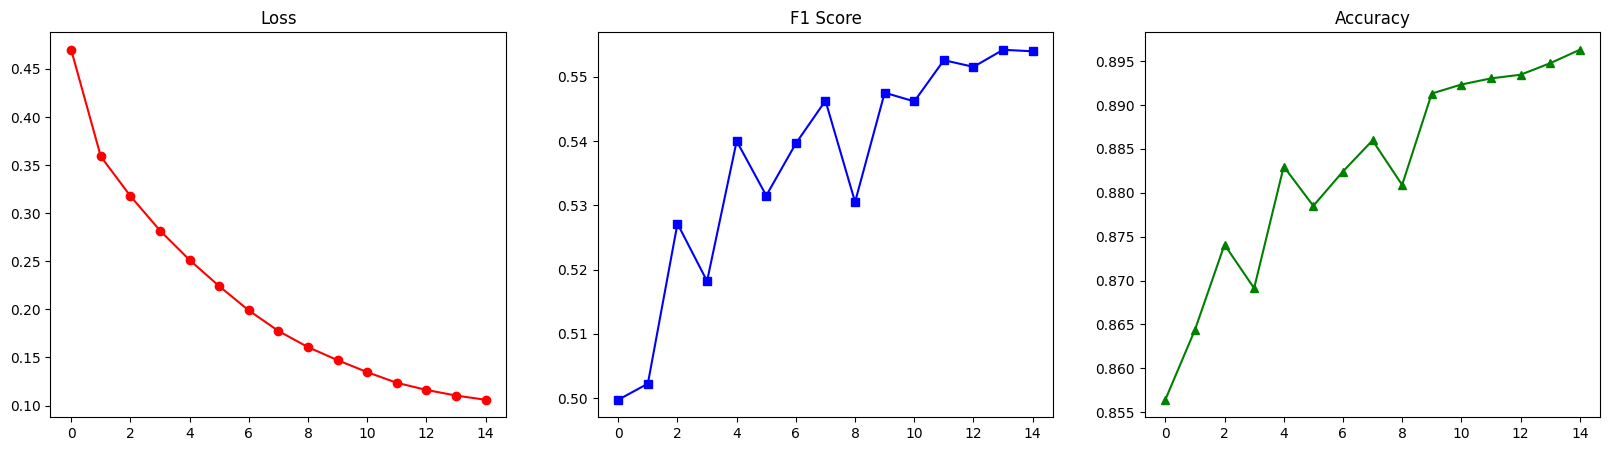

In [ ]:

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🔥 Cihaz: {device}")




df_new = pd.read_csv(io.StringIO(new_data_csv))
df_new.rename(columns={'comment_text': 'review_text', 'sentiments': 'scores'}, inplace=True)
print(f"🆕 Yeni eklenen veri sayısı: {len(df_new)}")


LABELS_PATH = "/content/labeled_reviews_parallel3.csv"
REVIEWS_PATH = "/content/reviews.csv"

try:
    df_labels = pd.read_csv(LABELS_PATH)
    df_reviews = pd.read_csv(REVIEWS_PATH)
    df_main = pd.merge(df_labels, df_reviews[['id', 'review_text']], on='id', how='inner')
    df_main = df_main[['review_text', 'scores']]
    print(f"📦 Ana veri sayısı: {len(df_main)}")

    df_merged = pd.concat([df_main, df_new[['review_text', 'scores']]], ignore_index=True)
    print(f"✅ Toplam Birleşmiş Veri: {len(df_merged)}")

except FileNotFoundError as e:
    print(f"❌ HATA: Dosya bulunamadı! Yolunu kontrol et.\n{e}")
    exit()


df_merged.dropna(subset=['review_text', 'scores'], inplace=True)

def parse_scores(score_str):
    try:
        if isinstance(score_str, list): return score_str
        return ast.literal_eval(score_str)
    except: return None

df_merged['parsed_scores'] = df_merged['scores'].apply(parse_scores)
df_merged.dropna(subset=['parsed_scores'], inplace=True)

initial_len = len(df_merged)
df_merged = df_merged[~df_merged['parsed_scores'].apply(lambda x: all(s == 0 for s in x))]
final_len = len(df_merged)

print("-" * 40)
print(f"🗑️ TEMİZLİK SONRASI DURUM:")
print(f"   Silinen (Tümü 0) : {initial_len - final_len}")
print(f"   Kalan Net Veri   : {final_len}")
print("-" * 40)


ASPECTS_DICT = {
    0: "Seller Errors", 1: "General Satisfaction", 2: "Size & Fit", 3: "Damaged/Broken Item",
    4: "Installation & Usage", 5: "Return Process", 6: "Seller Courtesy", 7: "Product Features",
    8: "General Quality", 9: "Color & Appearance", 10: "Durability Issues", 11: "Missing/Defective Item",
    12: "Price/Performance", 13: "Shipping Disasters"
}
ASPECT_NAMES = [ASPECTS_DICT[i] for i in range(len(ASPECTS_DICT))]
NUM_ASPECTS = len(ASPECT_NAMES)

map_to_idx = {-1: 0, 0: 1, 1: 2}

def encode_labels_list(scores_list):
    encoded = []
    for s in scores_list:
        val = int(s)
        if val not in map_to_idx: encoded.append(map_to_idx[0])
        else: encoded.append(map_to_idx[val])
    return encoded

all_labels = np.stack(df_merged['parsed_scores'].apply(encode_labels_list))

flat_labels = all_labels.flatten()
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1, 2]),
    y=flat_labels
)
weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)

print("\n📊 GÜNCEL AĞIRLIKLAR:")
print(f"   Negatif (0): {class_weights[0]:.4f}")
print(f"   Nötr    (1): {class_weights[1]:.4f}")
print(f"   Pozitif (2): {class_weights[2]:.4f}")

train_texts, temp_texts, train_y, temp_y = train_test_split(
    df_merged['review_text'].tolist(), all_labels, test_size=0.2, random_state=SEED
)
val_texts, test_texts, val_y, test_y = train_test_split(
    temp_texts, temp_y, test_size=0.5, random_state=SEED
)


MODEL_NAME = "dbmdz/bert-base-turkish-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
MAX_LEN = 128

class ABSADataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
    def __len__(self): return len(self.texts)
    def __getitem__(self, idx):
        return {
            "text": str(self.texts[idx]),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }

def collate_fn(batch):
    texts = [b["text"] for b in batch]
    labels = torch.stack([b["labels"] for b in batch])
    enc = tokenizer(texts, padding=True, truncation=True, max_length=MAX_LEN, return_tensors="pt")
    enc["labels"] = labels
    return enc

train_dataset = ABSADataset(train_texts, train_y)
val_dataset   = ABSADataset(val_texts, val_y)
test_dataset  = ABSADataset(test_texts, test_y)

BATCH_SIZE = 16
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

=
class MultiHeadBert(nn.Module):
    def __init__(self, model_name, num_aspects, num_classes=3, loss_weights=None):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)


        for param in self.bert.embeddings.parameters():
            param.requires_grad = False


        for i in range(4):
            for param in self.bert.encoder.layer[i].parameters():
                param.requires_grad = False

        print("❄️ BERT'in sadece ilk 4 katmanı donduruldu. Son 8 katman eğitilecek.")

        hidden = self.bert.config.hidden_size
        self.dropout = nn.Dropout(0.3)
        self.classifiers = nn.ModuleList([nn.Linear(hidden, num_classes) for _ in range(num_aspects)])
        self.loss_weights = loss_weights

    def forward(self, input_ids, attention_mask, labels=None):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled = self.dropout(out.last_hidden_state[:, 0, :])
        logits_list = [head(pooled) for head in self.classifiers]
        logits = torch.stack(logits_list, dim=1)

        loss = None
        if labels is not None:
            ce = nn.CrossEntropyLoss(weight=self.loss_weights)
            losses = [ce(logits[:, i, :], labels[:, i]) for i in range(logits.shape[1])]
            loss = torch.mean(torch.stack(losses))

        return logits, loss

model = MultiHeadBert(MODEL_NAME, num_aspects=NUM_ASPECTS, loss_weights=weights_tensor).to(device)


EPOCHS = 15
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, 0, total_steps)

def evaluate(model, loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            logits, _ = model(batch["input_ids"], batch["attention_mask"])
            preds = torch.argmax(logits, dim=-1).cpu().numpy()
            y_true.append(batch["labels"].cpu().numpy())
            y_pred.append(preds)
    y_true = np.concatenate(y_true)
    y_pred = np.concatenate(y_pred)

    scores = {}
    for i, aspect_name in enumerate(ASPECT_NAMES):
        f1 = f1_score(y_true[:, i], y_pred[:, i], average="macro")
        scores[aspect_name] = f1
    scores["GENEL_F1"] = np.mean(list(scores.values()))
    scores["ACCURACY"] = accuracy_score(y_true.flatten(), y_pred.flatten())
    return scores

train_losses, val_f1_scores, val_accuracies = [], [], []
best_f1 = 0

print("\n🚀 Eğitim Başlıyor (Light Freezing)...")

for epoch in range(1, EPOCHS+1):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        optimizer.zero_grad()
        _, loss = model(batch["input_ids"], batch["attention_mask"], batch["labels"])
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    val_scores = evaluate(model, val_loader)
    curr_f1 = val_scores['GENEL_F1']
    curr_acc = val_scores['ACCURACY']

    train_losses.append(avg_train_loss)
    val_f1_scores.append(curr_f1)
    val_accuracies.append(curr_acc)

    print(f"Epoch {epoch}/{EPOCHS} | Loss: {avg_train_loss:.4f} | Val F1: {curr_f1:.4f} | Val Acc: {curr_acc:.4f}")

    if curr_f1 > best_f1:
        best_f1 = curr_f1
        torch.save(model.state_dict(), "absa_model_light_frozen.pt")
        print(f"✅ Model Kaydedildi! En iyi F1: {best_f1:.4f}")

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1); plt.plot(train_losses, 'r-o'); plt.title('Loss')
plt.subplot(1, 3, 2); plt.plot(val_f1_scores, 'b-s'); plt.title('F1 Score')
plt.subplot(1, 3, 3); plt.plot(val_accuracies, 'g-^'); plt.title('Accuracy')
plt.show()

In [ ]:

!pip -q install transformers==4.44.2 accelerate datasets evaluate scikit-learn torch --upgrade

import os
import random
import numpy as np
import pandas as pd
import ast
import io
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, get_linear_schedule_with_warmup
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 124.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.3/512.3 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 140.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 128.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6

🔥 Cihaz: cuda
✅ Toplam Veri: 35988
🗑️ Temizlik Sonrası Veri: 33007 (Silinen Boş Satırlar: 2981)


/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



🚀 Eğitim Başlıyor (KLASİK MOD - HATA DÜZELTİLDİ)...
Epoch 1/10 | Loss: 0.2081 | Val F1: 0.7435 | Val Acc: 0.9357
✅ En iyi model: 0.7435
Epoch 2/10 | Loss: 0.1610 | Val F1: 0.7516 | Val Acc: 0.9360
✅ En iyi model: 0.7516
Epoch 3/10 | Loss: 0.1440 | Val F1: 0.7564 | Val Acc: 0.9375
✅ En iyi model: 0.7564
Epoch 4/10 | Loss: 0.1277 | Val F1: 0.7578 | Val Acc: 0.9363
✅ En iyi model: 0.7578
Epoch 5/10 | Loss: 0.1121 | Val F1: 0.7530 | Val Acc: 0.9356
Epoch 6/10 | Loss: 0.0981 | Val F1: 0.7535 | Val Acc: 0.9341
Epoch 7/10 | Loss: 0.0853 | Val F1: 0.7477 | Val Acc: 0.9318
Epoch 8/10 | Loss: 0.0753 | Val F1: 0.7513 | Val Acc: 0.9326
Epoch 9/10 | Loss: 0.0681 | Val F1: 0.7487 | Val Acc: 0.9310
Epoch 10/10 | Loss: 0.0632 | Val F1: 0.7495 | Val Acc: 0.9313


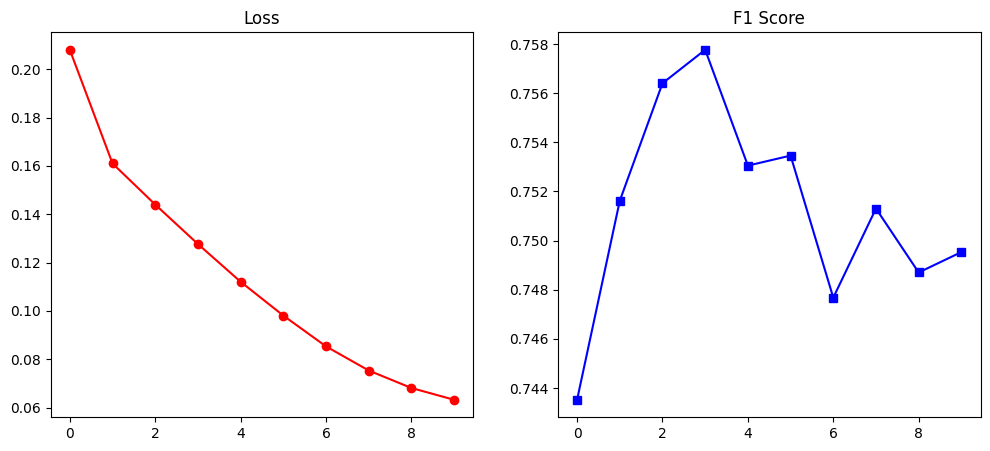

In [ ]:


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🔥 Cihaz: {device}")



df_new = pd.read_csv(io.StringIO(new_data_csv))
df_new.rename(columns={'comment_text': 'review_text', 'sentiments': 'scores'}, inplace=True)


LABELS_PATH = "/content/labeled_reviews_parallel3.csv"
REVIEWS_PATH = "/content/reviews.csv"

try:
    df_labels = pd.read_csv(LABELS_PATH)
    df_reviews = pd.read_csv(REVIEWS_PATH)
    df_main = pd.merge(df_labels, df_reviews[['id', 'review_text']], on='id', how='inner')
    df_main = df_main[['review_text', 'scores']]

    df_merged = pd.concat([df_main, df_new[['review_text', 'scores']]], ignore_index=True)
    print(f"✅ Toplam Veri: {len(df_merged)}")

except FileNotFoundError:
    print("HATA: Dosya yok.")
    exit()


def parse_scores(score_str):
    try:
        if isinstance(score_str, list): return score_str
        return ast.literal_eval(score_str)
    except: return None

df_merged['parsed_scores'] = df_merged['scores'].apply(parse_scores)
df_merged.dropna(subset=['review_text', 'parsed_scores'], inplace=True)

initial_len = len(df_merged)
df_merged = df_merged[~df_merged['parsed_scores'].apply(lambda x: all(s == 0 for s in x))]
print(f"🗑️ Temizlik Sonrası Veri: {len(df_merged)} (Silinen Boş Satırlar: {initial_len - len(df_merged)})")


ASPECTS_DICT = {
    0: "Seller Errors", 1: "General Satisfaction", 2: "Size & Fit", 3: "Damaged/Broken Item",
    4: "Installation & Usage", 5: "Return Process", 6: "Seller Courtesy", 7: "Product Features",
    8: "General Quality", 9: "Color & Appearance", 10: "Durability Issues", 11: "Missing/Defective Item",
    12: "Price/Performance", 13: "Shipping Disasters"
}
ASPECT_NAMES = [ASPECTS_DICT[i] for i in range(len(ASPECTS_DICT))]
NUM_ASPECTS = len(ASPECT_NAMES)

map_to_idx = {-1: 0, 0: 1, 1: 2}

def encode_labels_list(scores_list):
    encoded = []
    for s in scores_list:
        val = int(s)
        if val in map_to_idx:
            encoded.append(map_to_idx[val])
        else:
            encoded.append(map_to_idx[0])
    return encoded

all_labels = np.stack(df_merged['parsed_scores'].apply(encode_labels_list))

train_texts, temp_texts, train_y, temp_y = train_test_split(df_merged['review_text'].tolist(), all_labels, test_size=0.2, random_state=SEED)
val_texts, test_texts, val_y, test_y = train_test_split(temp_texts, temp_y, test_size=0.5, random_state=SEED)


MODEL_NAME = "dbmdz/bert-base-turkish-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
MAX_LEN = 128

class ABSADataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
    def __len__(self): return len(self.texts)
    def __getitem__(self, idx):
        return {
            "text": str(self.texts[idx]),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }

def collate_fn(batch):
    texts = [b["text"] for b in batch]
    labels = torch.stack([b["labels"] for b in batch])
    enc = tokenizer(texts, padding=True, truncation=True, max_length=MAX_LEN, return_tensors="pt")
    enc["labels"] = labels
    return enc

train_loader = DataLoader(ABSADataset(train_texts, train_y), batch_size=16, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(ABSADataset(val_texts, val_y), batch_size=16, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(ABSADataset(test_texts, test_y), batch_size=16, shuffle=False, collate_fn=collate_fn)


class MultiHeadBert(nn.Module):
    def __init__(self, model_name, num_aspects, num_classes=3):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)

        hidden = self.bert.config.hidden_size
        self.dropout = nn.Dropout(0.1)
        self.classifiers = nn.ModuleList([nn.Linear(hidden, num_classes) for _ in range(num_aspects)])

    def forward(self, input_ids, attention_mask, labels=None):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled = self.dropout(out.last_hidden_state[:, 0, :])
        logits_list = [head(pooled) for head in self.classifiers]
        logits = torch.stack(logits_list, dim=1)

        loss = None
        if labels is not None:
            ce = nn.CrossEntropyLoss()
            losses = [ce(logits[:, i, :], labels[:, i]) for i in range(logits.shape[1])]
            loss = torch.mean(torch.stack(losses))
        return logits, loss

model = MultiHeadBert(MODEL_NAME, num_aspects=NUM_ASPECTS).to(device)


EPOCHS = 10
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, 0, total_steps)

def evaluate(model, loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            logits, _ = model(batch["input_ids"], batch["attention_mask"])
            preds = torch.argmax(logits, dim=-1).cpu().numpy()
            y_true.append(batch["labels"].cpu().numpy())
            y_pred.append(preds)
    y_true = np.concatenate(y_true)
    y_pred = np.concatenate(y_pred)

    scores = {}

    scores["GENEL_F1"] = f1_score(y_true.flatten(), y_pred.flatten(), average="macro")
    scores["ACCURACY"] = accuracy_score(y_true.flatten(), y_pred.flatten())
    return scores

train_losses, val_f1_scores = [], []
best_f1 = 0

print("\n🚀 Eğitim Başlıyor (KLASİK MOD - HATA DÜZELTİLDİ)...")

for epoch in range(1, EPOCHS+1):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        optimizer.zero_grad()
        _, loss = model(batch["input_ids"], batch["attention_mask"], batch["labels"])
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    val_scores = evaluate(model, val_loader)

    train_losses.append(avg_train_loss)
    val_f1_scores.append(val_scores['GENEL_F1'])

    print(f"Epoch {epoch}/{EPOCHS} | Loss: {avg_train_loss:.4f} | Val F1: {val_scores['GENEL_F1']:.4f} | Val Acc: {val_scores['ACCURACY']:.4f}")

    if val_scores['GENEL_F1'] > best_f1:
        best_f1 = val_scores['GENEL_F1']
        torch.save(model.state_dict(), "absa_model_classic_fixed.pt")
        print(f"✅ En iyi model: {best_f1:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1); plt.plot(train_losses, 'r-o'); plt.title('Loss')
plt.subplot(1, 2, 2); plt.plot(val_f1_scores, 'b-s'); plt.title('F1 Score')
plt.show()

**Live test**

In [ ]:

import torch
from transformers import AutoTokenizer

MODEL_NAME = "dbmdz/bert-base-turkish-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
MAX_LEN = 128
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ASPECTS_DICT = {
    0: "Seller Errors", 1: "General Satisfaction", 2: "Size & Fit", 3: "Damaged/Broken Item",
    4: "Installation & Usage", 5: "Return Process", 6: "Seller Courtesy", 7: "Product Features",
    8: "General Quality", 9: "Color & Appearance", 10: "Durability Issues", 11: "Missing/Defective Item",
    12: "Price/Performance", 13: "Shipping Disasters"
}
ASPECT_NAMES = [ASPECTS_DICT[i] for i in range(len(ASPECTS_DICT))]

idx_to_sent = {0: "Negatif 😡", 1: "Nötr/Yok 😐", 2: "Pozitif 😃"}

class MultiHeadBert(nn.Module):
    def __init__(self, model_name, num_aspects, num_classes=3):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        hidden = self.bert.config.hidden_size
        self.dropout = nn.Dropout(0.1)
        self.classifiers = nn.ModuleList([nn.Linear(hidden, num_classes) for _ in range(num_aspects)])

    def forward(self, input_ids, attention_mask, labels=None):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled = self.dropout(out.last_hidden_state[:, 0, :])
        logits_list = [head(pooled) for head in self.classifiers]
        logits = torch.stack(logits_list, dim=1)
        return logits, None

model = MultiHeadBert(MODEL_NAME, num_aspects=len(ASPECT_NAMES)).to(device)
try:
    model.load_state_dict(torch.load("absa_model_classic_fixed.pt", map_location=device))
    print("✅ Model başarıyla yüklendi ve teste hazır!")
except FileNotFoundError:
    print("❌ HATA: Model dosyası bulunamadı. Önce eğitimi tamamla!")

def predict_new(text):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=MAX_LEN).to(device)

    with torch.no_grad():
        logits, _ = model(inputs["input_ids"], inputs["attention_mask"])
        preds = torch.argmax(logits, dim=-1).squeeze(0).cpu().numpy()

    print(f"\n📝 Yorum: {text}")
    print("-" * 50)

    found_any = False
    for i, aspect in enumerate(ASPECT_NAMES):
        if preds[i] != 1:
            sentiment = idx_to_sent[preds[i]]
            print(f"🔹 {aspect:<25}: {sentiment}")
            found_any = True

    if not found_any:
        print("🔸 (Bu yorumda belirgin bir duygu tespit edilemedi / Hepsi Nötr)")
    print("=" * 50)





/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


✅ Model başarıyla yüklendi ve teste hazır!


In [ ]:
predict_new("canavar gibi çalısıyor :)")



📝 Yorum: canavar gibi çalısıyor :)
--------------------------------------------------
🔹 General Satisfaction     : Pozitif 😃


In [ ]:
predict_new("kargo hızlı geldi ama beden uymadı")



📝 Yorum: kargo hızlı geldi ama beden uymadı fiyat çok pahalı
--------------------------------------------------
🔹 Size & Fit               : Negatif 😡


**Visualization of results**

📊 Generating predictions on Test Set...
🎨 Plotting Confusion Matrices...


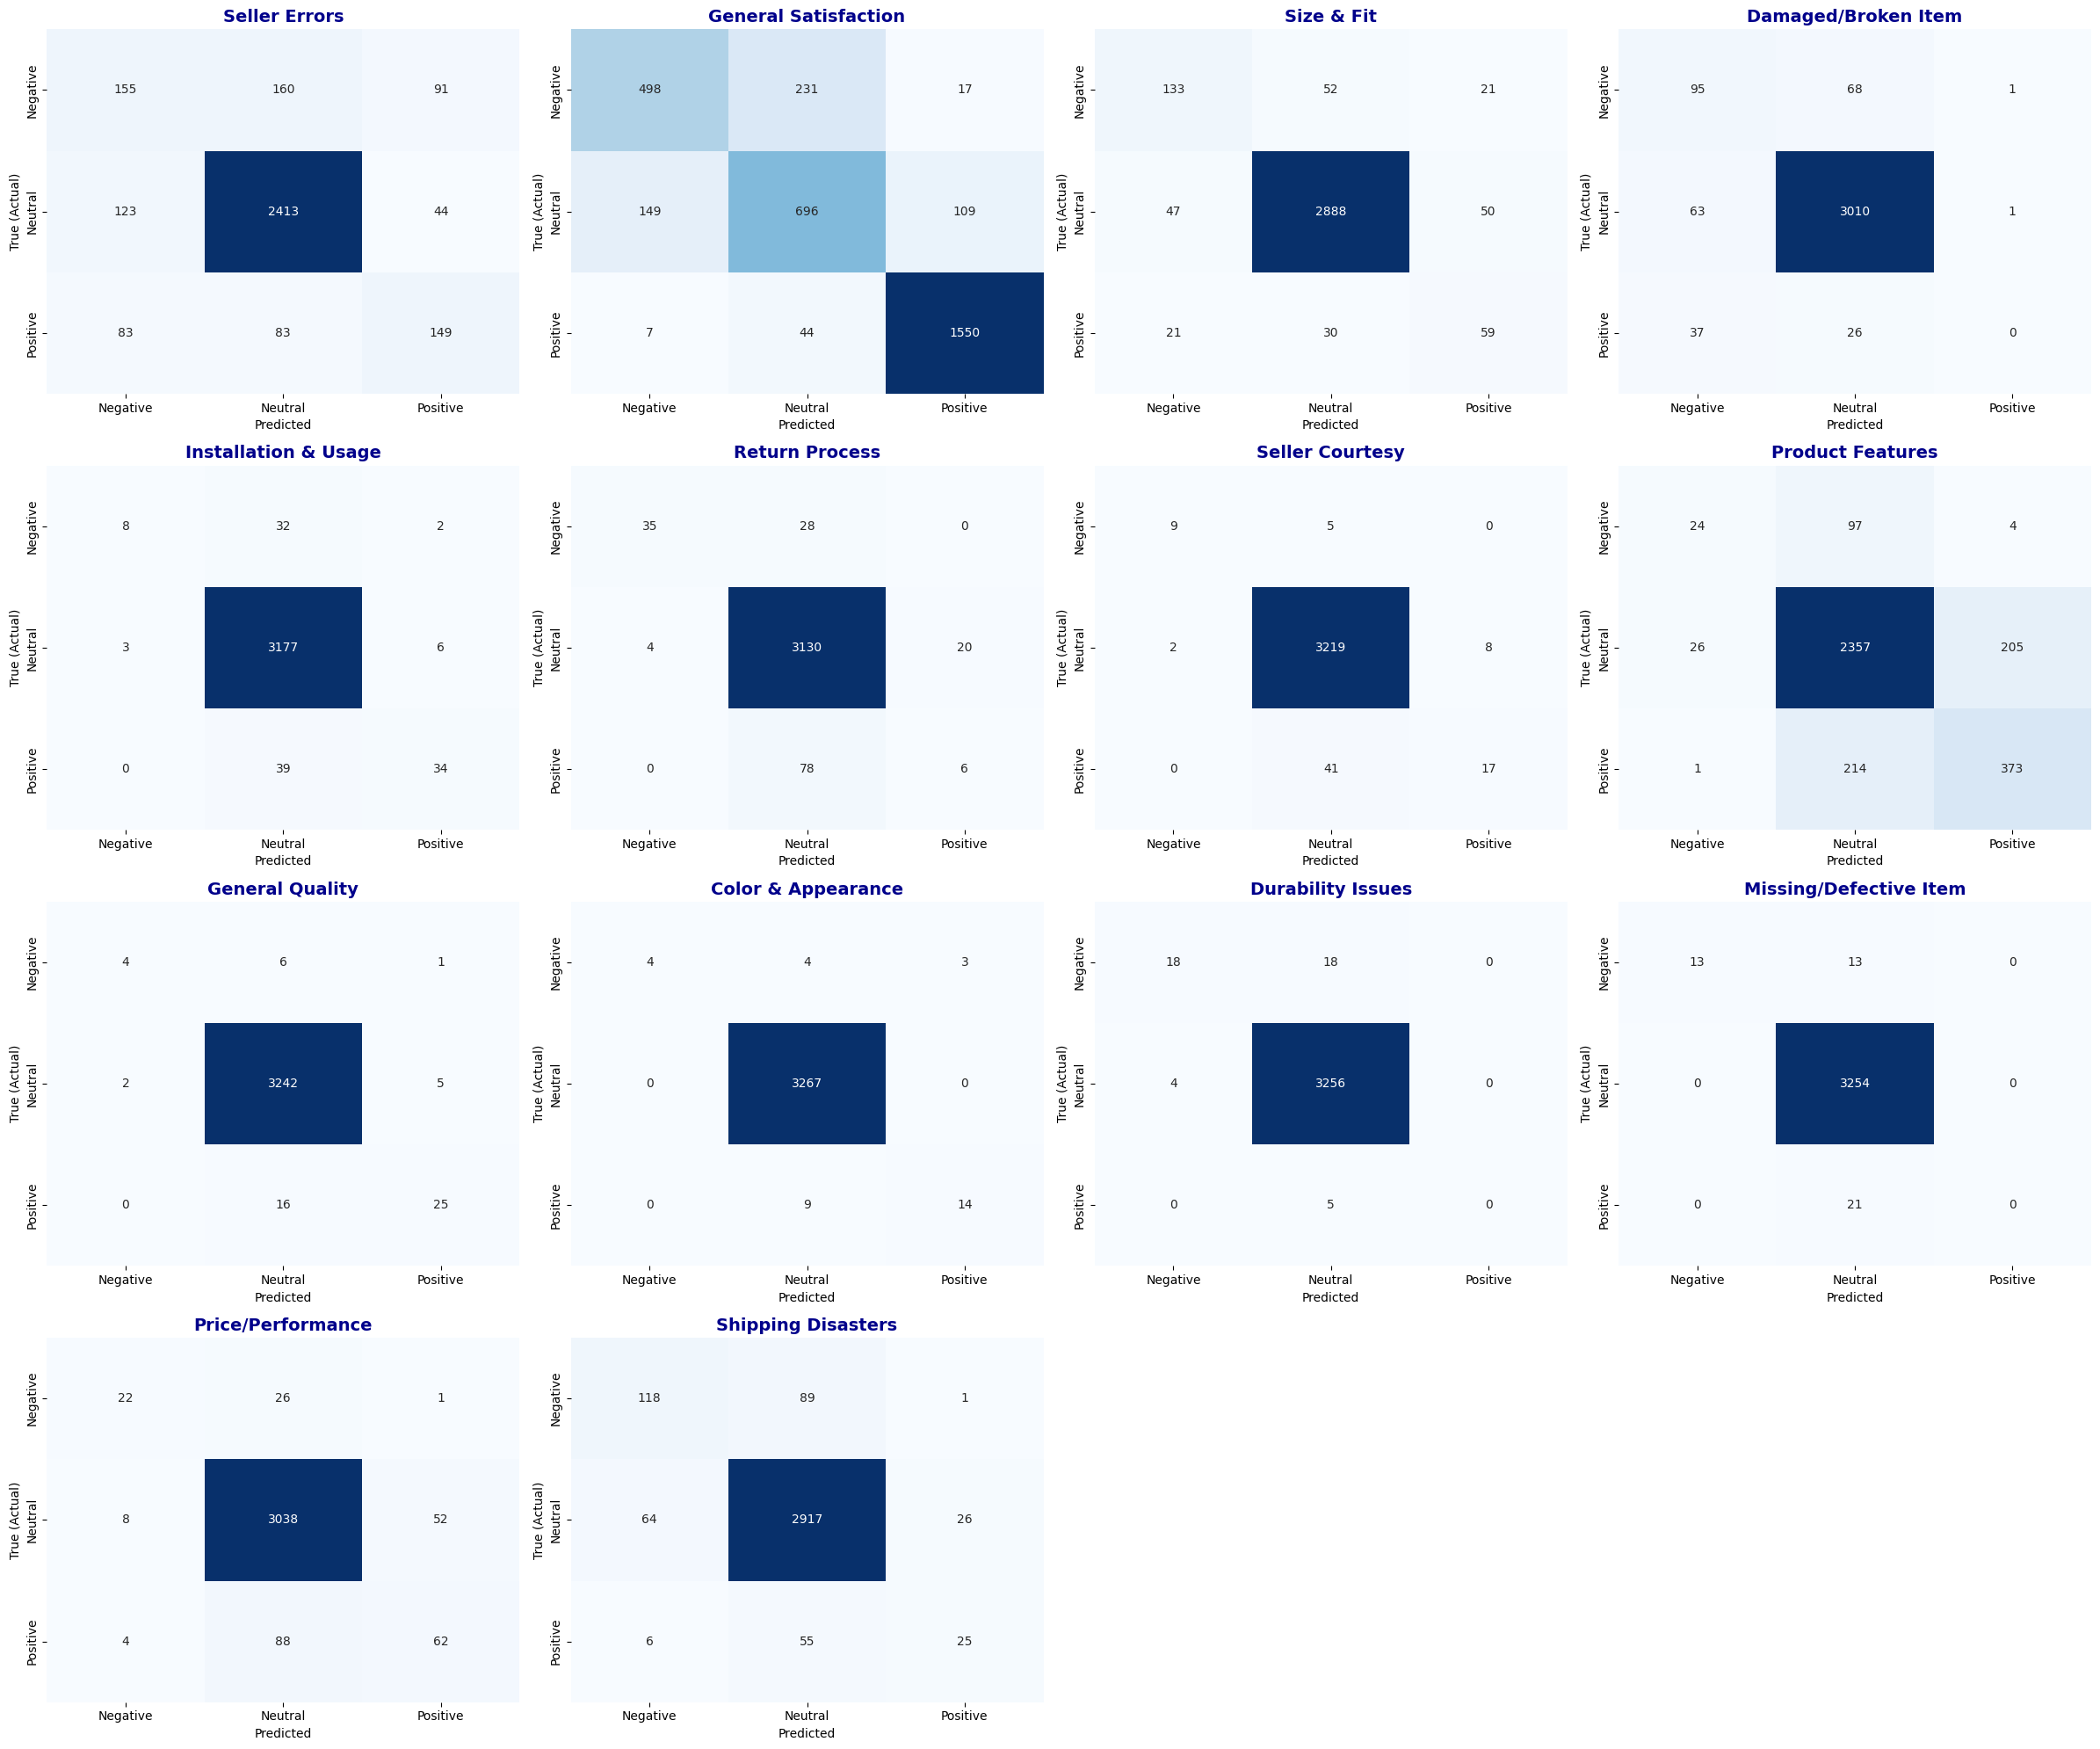

🎨 Plotting Accuracy & F1 Scores...


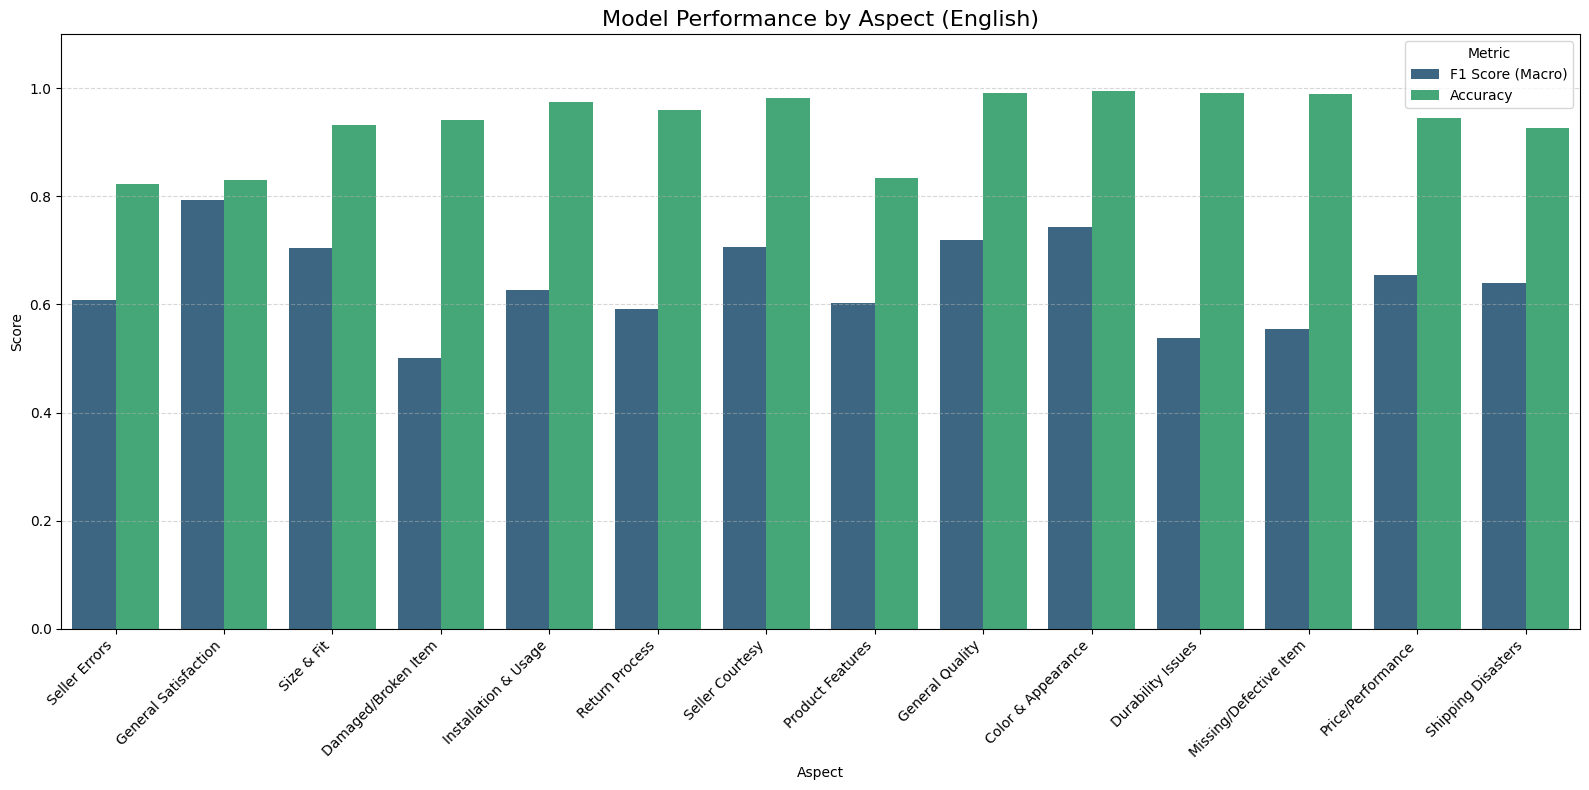

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import random


ASPECT_NAMES_ENG = [
    "Seller Errors", "General Satisfaction", "Size & Fit", "Damaged/Broken Item",
    "Installation & Usage", "Return Process", "Seller Courtesy", "Product Features",
    "General Quality", "Color & Appearance", "Durability Issues", "Missing/Defective Item",
    "Price/Performance", "Shipping Disasters"
]


SENTIMENT_NAMES = ["Negative", "Neutral", "Positive"]

model.load_state_dict(torch.load("absa_model_classic_fixed.pt", map_location=device))
model.eval()


print("📊 Generating predictions on Test Set...")

y_true_all = []
y_pred_all = []
input_texts = []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        logits, _ = model(batch["input_ids"], batch["attention_mask"])

        preds = torch.argmax(logits, dim=-1).cpu().numpy()
        labels = batch["labels"].cpu().numpy()

        y_true_all.append(labels)
        y_pred_all.append(preds)


        decoded = tokenizer.batch_decode(batch["input_ids"], skip_special_tokens=True)
        input_texts.extend(decoded)

y_true_all = np.concatenate(y_true_all)
y_pred_all = np.concatenate(y_pred_all)


print("🎨 Plotting Confusion Matrices...")

n_cols = 4
n_rows = (len(ASPECT_NAMES_ENG) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 5 * n_rows))
axes = axes.flatten()

for i, aspect in enumerate(ASPECT_NAMES_ENG):
    cm = confusion_matrix(y_true_all[:, i], y_pred_all[:, i])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=SENTIMENT_NAMES,
                yticklabels=SENTIMENT_NAMES, cbar=False)

    axes[i].set_title(f"{aspect}", fontsize=14, fontweight='bold', color='darkblue')
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("True (Actual)")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


print("🎨 Plotting Accuracy & F1 Scores...")

f1_scores = []
accuracies = []

for i in range(len(ASPECT_NAMES_ENG)):
    f1 = f1_score(y_true_all[:, i], y_pred_all[:, i], average='macro')
    acc = accuracy_score(y_true_all[:, i], y_pred_all[:, i])
    f1_scores.append(f1)
    accuracies.append(acc)

import pandas as pd
metrics_df = pd.DataFrame({
    'Aspect': ASPECT_NAMES_ENG,
    'F1 Score (Macro)': f1_scores,
    'Accuracy': accuracies
})

metrics_melted = metrics_df.melt(id_vars="Aspect", var_name="Metric", value_name="Score")

plt.figure(figsize=(16, 8))
sns.barplot(data=metrics_melted, x="Aspect", y="Score", hue="Metric", palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Model Performance by Aspect (English)", fontsize=16)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



In [ ]:

print("\n" + "="*60)
print(f"{'🔎 RANDOMLY SELECTED 5 TEST EXAMPLES':^60}")
print("="*60)

indices = random.sample(range(len(input_texts)), 5)

for idx in indices:
    text = input_texts[idx]
    true_lbls = y_true_all[idx]
    pred_lbls = y_pred_all[idx]

    print(f"\n📝 Review: \"{text}\"")
    print("-" * 60)
    print(f"{'Aspect':<25} | {'True Label':<15} | {'Predicted':<15}")
    print("-" * 60)

    found_any = False
    for i, aspect in enumerate(ASPECT_NAMES_ENG):
        if true_lbls[i] != 1 or pred_lbls[i] != 1:
            t_sent = SENTIMENT_NAMES[true_lbls[i]]
            p_sent = SENTIMENT_NAMES[pred_lbls[i]]

            match_icon = "✅" if true_lbls[i] == pred_lbls[i] else "❌"

            print(f"{aspect:<25} | {t_sent:<15} | {p_sent:<15} {match_icon}")
            found_any = True

    if not found_any:
        print("(No specific sentiment found in both True and Predicted - All Neutral)")
    print("=" * 60)


            🔎 RANDOMLY SELECTED 5 TEST EXAMPLES             

📝 Review: "Sorunsuz geldi çok güzel paketlenmişti"
------------------------------------------------------------
Aspect                    | True Label      | Predicted      
------------------------------------------------------------
General Satisfaction      | Positive        | Positive        ✅

📝 Review: "İlk defa bu kokuyu aldım cook güzel cok begendim agır keskin degil cok yumusak seker koku da degil 122 ile 384 artık favori kokum oldu. 384 bence 122 den daha güzel 122 nin yorumları kullananı daha cok ama 384 te cok cok iyi bence"
------------------------------------------------------------
Aspect                    | True Label      | Predicted      
------------------------------------------------------------
General Satisfaction      | Positive        | Positive        ✅
Seller Courtesy           | Positive        | Neutral         ❌

📝 Review: "Kargo basarılı"
------------------------------------------------------

**Class weights are determined by class distribution.**

🔥 Cihaz: cuda
⚖️ Sınıf Ağırlıkları (Neg:0, Neu:1, Poz:2): [7.467175483703613, 0.3765142858028412, 4.75875997543335]


/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



🚀 Eğitim Başlıyor (Class Weights Aktif)...
Epoch 1/10 | Loss: 0.4438 | Val F1: 0.6671 | Val Acc: 0.8543
⭐ En iyi model kaydedildi! F1: 0.6671
Epoch 2/10 | Loss: 0.3280 | Val F1: 0.6828 | Val Acc: 0.8676
⭐ En iyi model kaydedildi! F1: 0.6828
Epoch 3/10 | Loss: 0.2795 | Val F1: 0.6929 | Val Acc: 0.8742
⭐ En iyi model kaydedildi! F1: 0.6929
Epoch 4/10 | Loss: 0.2383 | Val F1: 0.6882 | Val Acc: 0.8707
Epoch 5/10 | Loss: 0.2016 | Val F1: 0.7001 | Val Acc: 0.8810
⭐ En iyi model kaydedildi! F1: 0.7001
Epoch 6/10 | Loss: 0.1719 | Val F1: 0.7132 | Val Acc: 0.8907
⭐ En iyi model kaydedildi! F1: 0.7132
Epoch 7/10 | Loss: 0.1475 | Val F1: 0.7111 | Val Acc: 0.8904
Epoch 8/10 | Loss: 0.1308 | Val F1: 0.7127 | Val Acc: 0.8923
Epoch 9/10 | Loss: 0.1173 | Val F1: 0.7130 | Val Acc: 0.8938
Epoch 10/10 | Loss: 0.1083 | Val F1: 0.7158 | Val Acc: 0.8953
⭐ En iyi model kaydedildi! F1: 0.7158


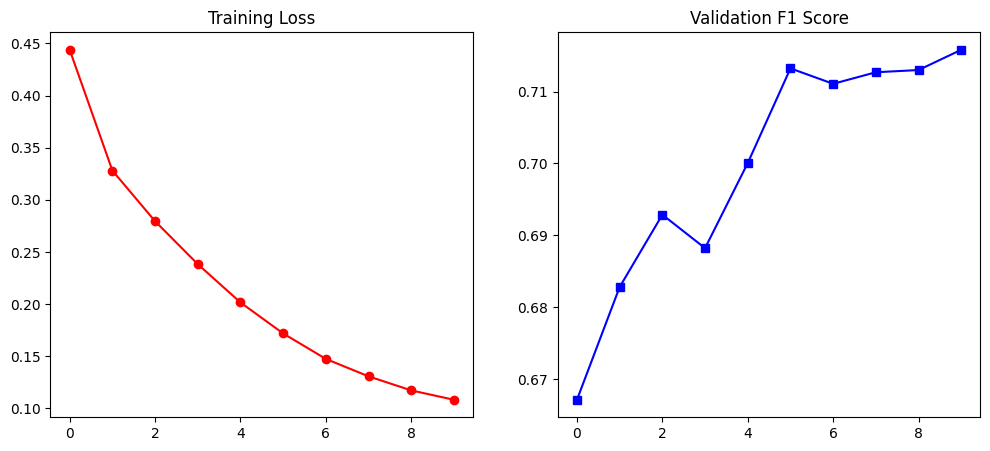


✅ İşlem Tamamlandı.


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import ast
import io
import random


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🔥 Cihaz: {device}")


ASPECTS_DICT = {
    0: "Seller Errors", 1: "General Satisfaction", 2: "Size & Fit", 3: "Damaged/Broken Item",
    4: "Installation & Usage", 5: "Return Process", 6: "Seller Courtesy", 7: "Product Features",
    8: "General Quality", 9: "Color & Appearance", 10: "Durability Issues", 11: "Missing/Defective Item",
    12: "Price/Performance", 13: "Shipping Disasters"
}
ASPECT_NAMES = list(ASPECTS_DICT.values())
NUM_ASPECTS = len(ASPECT_NAMES)


def encode_labels_list(scores_list):
    if isinstance(scores_list, str):
        scores_list = ast.literal_eval(scores_list)

    map_to_idx = {-1: 0, 0: 1, 1: 2}
    return [map_to_idx.get(int(s), 1) for s in scores_list]

all_labels = np.stack(df_merged['scores'].apply(encode_labels_list))

train_texts, temp_texts, train_y, temp_y = train_test_split(
    df_merged['review_text'].tolist(), all_labels, test_size=0.2, random_state=SEED
)
val_texts, test_texts, val_y, test_y = train_test_split(
    temp_texts, temp_y, test_size=0.5, random_state=SEED
)

flat_train_labels = train_y.flatten()
weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1, 2]), y=flat_train_labels)
class_weights = torch.tensor(weights, dtype=torch.float).to(device)
print(f"⚖️ Sınıf Ağırlıkları (Neg:0, Neu:1, Poz:2): {class_weights.tolist()}")


MODEL_NAME = "dbmdz/bert-base-turkish-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
MAX_LEN = 128

class ABSADataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
    def __len__(self): return len(self.texts)
    def __getitem__(self, idx):
        return {
            "text": str(self.texts[idx]),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }

def collate_fn(batch):
    texts = [b["text"] for b in batch]
    labels = torch.stack([b["labels"] for b in batch])
    enc = tokenizer(texts, padding=True, truncation=True, max_length=MAX_LEN, return_tensors="pt")
    enc["labels"] = labels
    return enc

train_loader = DataLoader(ABSADataset(train_texts, train_y), batch_size=16, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(ABSADataset(val_texts, val_y), batch_size=16, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(ABSADataset(test_texts, test_y), batch_size=16, shuffle=False, collate_fn=collate_fn)


class MultiHeadBert(nn.Module):
    def __init__(self, model_name, num_aspects, class_weights, num_classes=3):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.num_aspects = num_aspects
        self.class_weights = class_weights

        hidden = self.bert.config.hidden_size
        self.dropout = nn.Dropout(0.1)
        self.classifiers = nn.ModuleList([nn.Linear(hidden, num_classes) for _ in range(num_aspects)])

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = self.dropout(outputs.last_hidden_state[:, 0, :])

        logits_list = [head(pooled_output) for head in self.classifiers]
        logits = torch.stack(logits_list, dim=1)

        loss = None
        if labels is not None:
            criterion = nn.CrossEntropyLoss(weight=self.class_weights)
            aspect_losses = []
            for i in range(self.num_aspects):
                aspect_losses.append(criterion(logits[:, i, :], labels[:, i]))
            loss = torch.mean(torch.stack(aspect_losses))

        return logits, loss

model = MultiHeadBert(MODEL_NAME, num_aspects=NUM_ASPECTS, class_weights=class_weights).to(device)


EPOCHS = 10
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, 0, total_steps)

def evaluate(model, loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items() if k != "text"}
            logits, _ = model(batch["input_ids"], batch["attention_mask"])
            preds = torch.argmax(logits, dim=-1).cpu().numpy()
            y_true.append(batch["labels"].cpu().numpy())
            y_pred.append(preds)

    y_true = np.concatenate(y_true)
    y_pred = np.concatenate(y_pred)

    return {
        "f1": f1_score(y_true.flatten(), y_pred.flatten(), average="macro"),
        "acc": accuracy_score(y_true.flatten(), y_pred.flatten())
    }


train_losses, val_f1_scores = [], []
best_f1 = 0

print("\n🚀 Eğitim Başlıyor (Class Weights Aktif)...")

for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items() if k != "text"}

        optimizer.zero_grad()
        _, loss = model(batch["input_ids"], batch["attention_mask"], batch["labels"])

        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    metrics = evaluate(model, val_loader)

    train_losses.append(avg_train_loss)
    val_f1_scores.append(metrics["f1"])

    print(f"Epoch {epoch}/{EPOCHS} | Loss: {avg_train_loss:.4f} | Val F1: {metrics['f1']:.4f} | Val Acc: {metrics['acc']:.4f}")

    if metrics["f1"] > best_f1:
        best_f1 = metrics["f1"]
        torch.save(model.state_dict(), "best_absa_model.pt")
        print(f"⭐ En iyi model kaydedildi! F1: {best_f1:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1); plt.plot(train_losses, 'r-o'); plt.title('Training Loss')
plt.subplot(1, 2, 2); plt.plot(val_f1_scores, 'b-s'); plt.title('Validation F1 Score')
plt.show()

print("\n✅ İşlem Tamamlandı.")

📊 Generating predictions on Test Set...
🎨 Plotting Confusion Matrices...


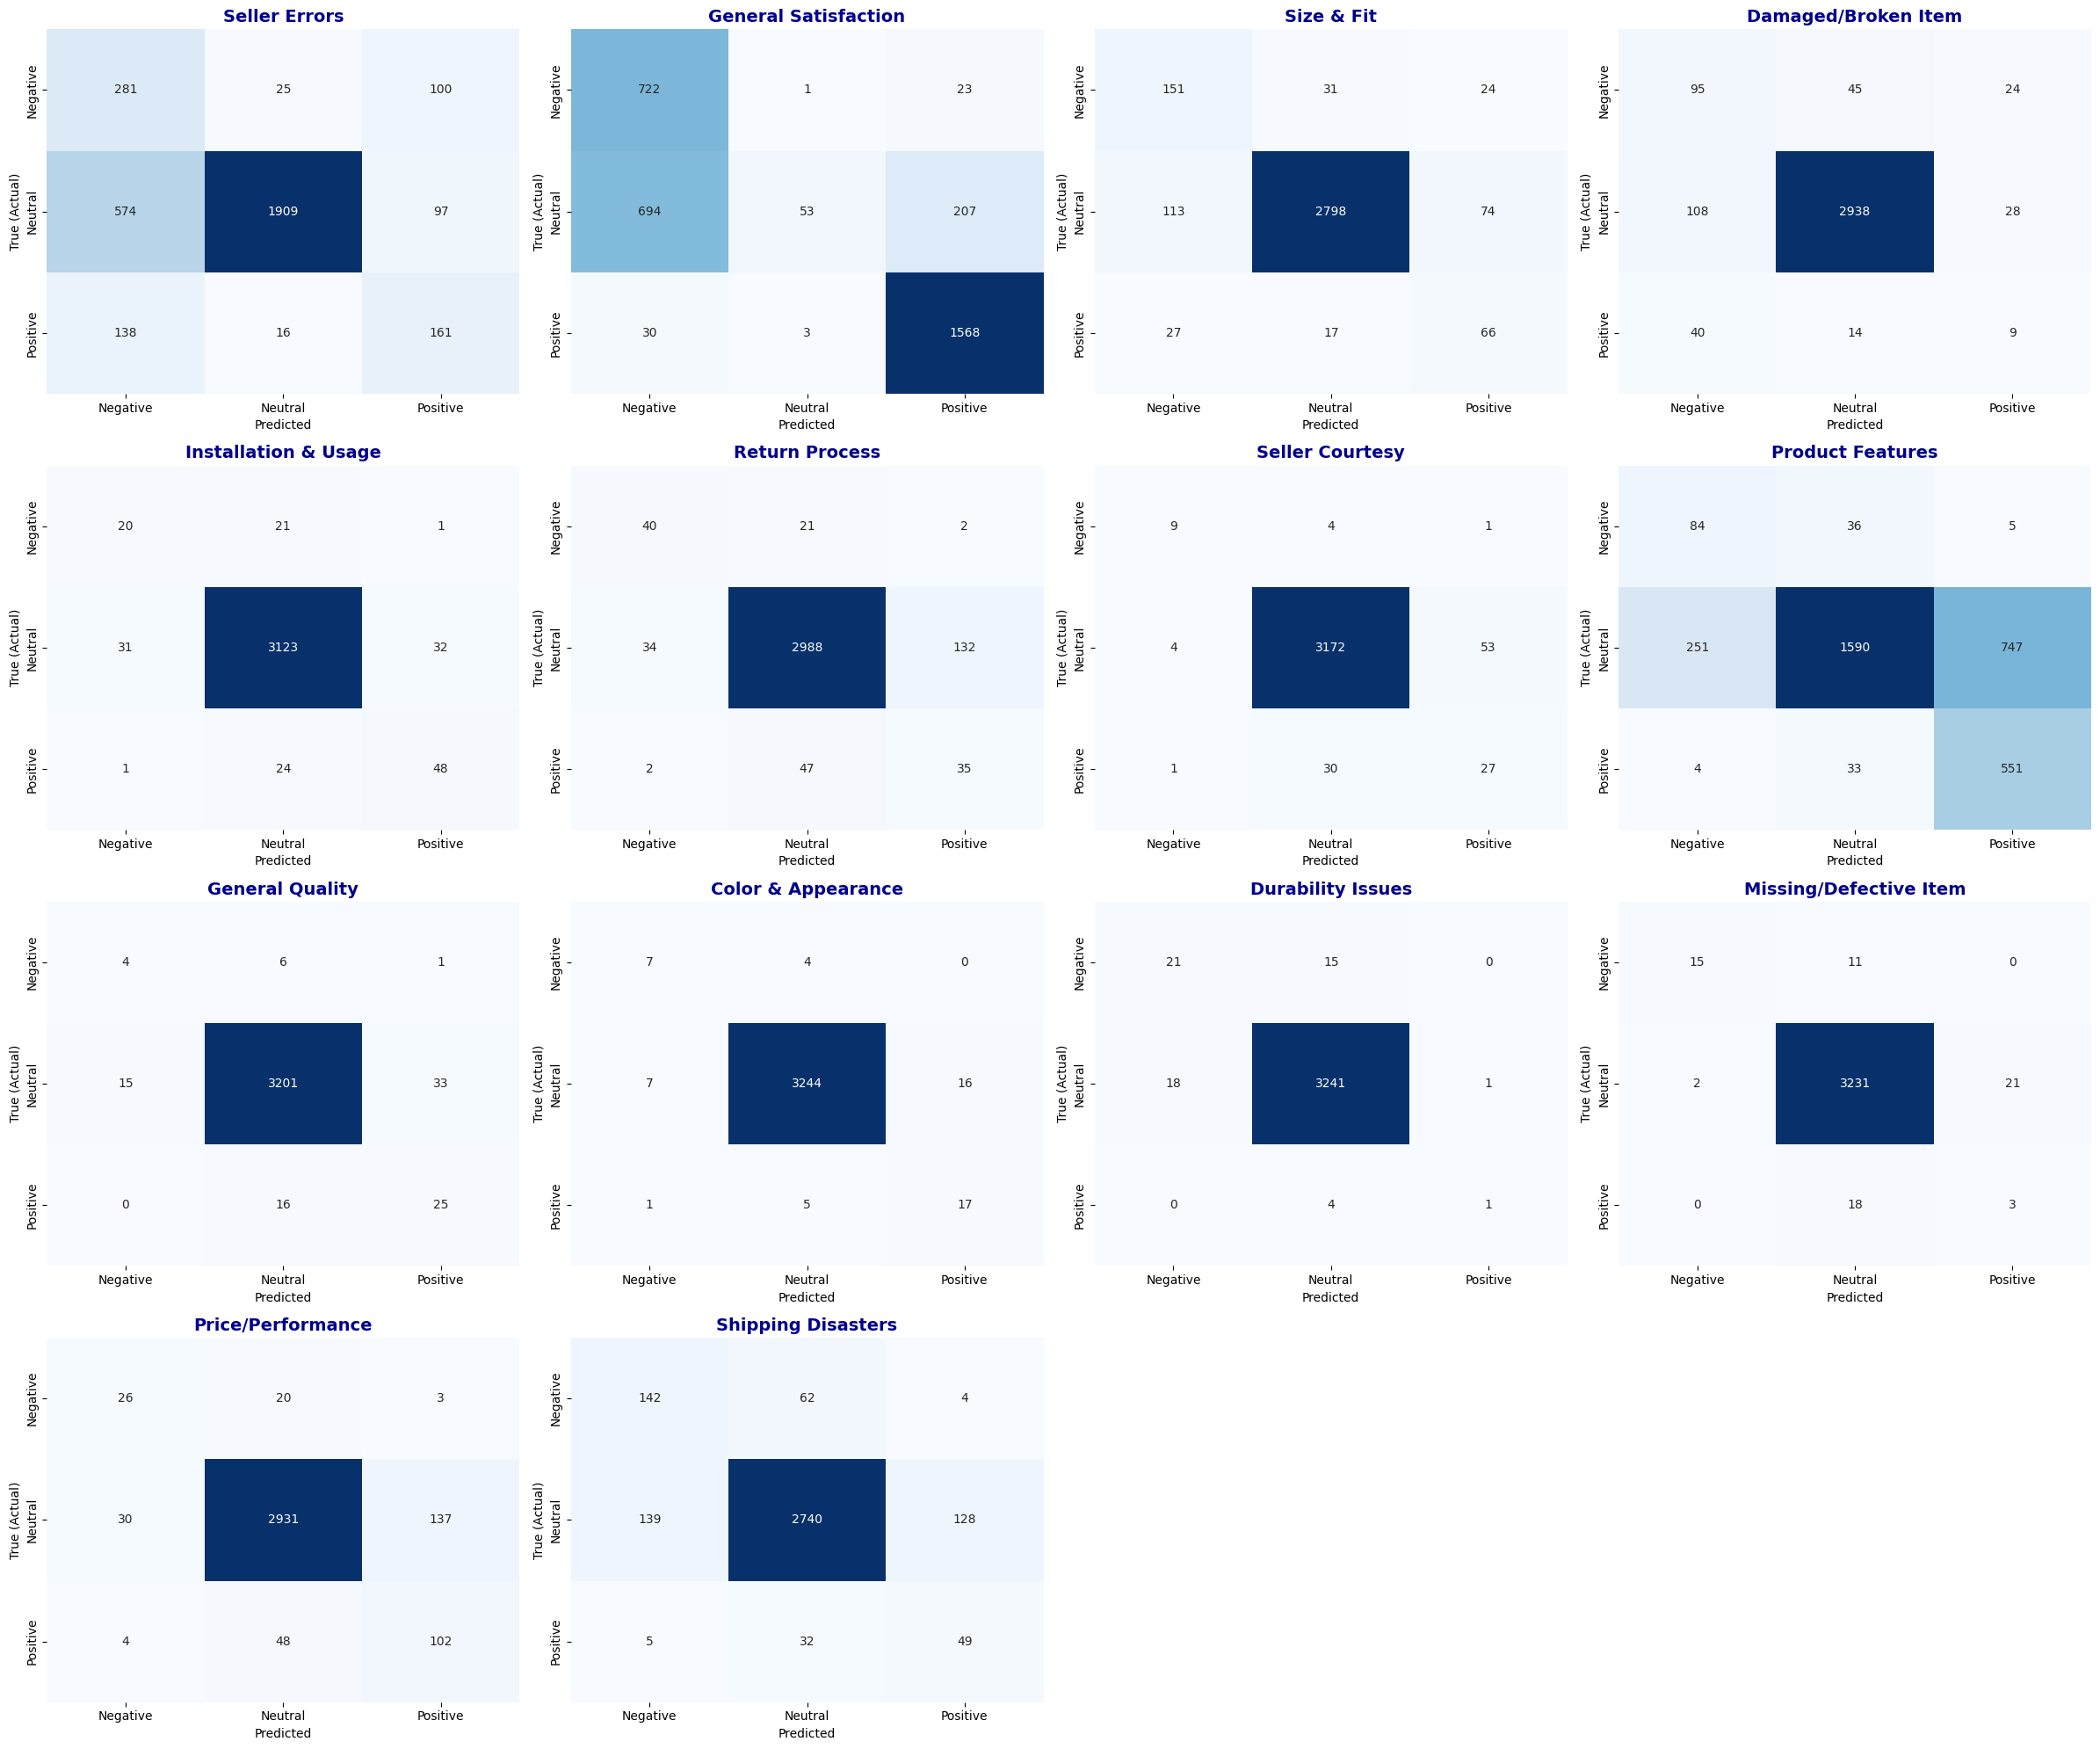

🎨 Plotting Accuracy & F1 Scores...


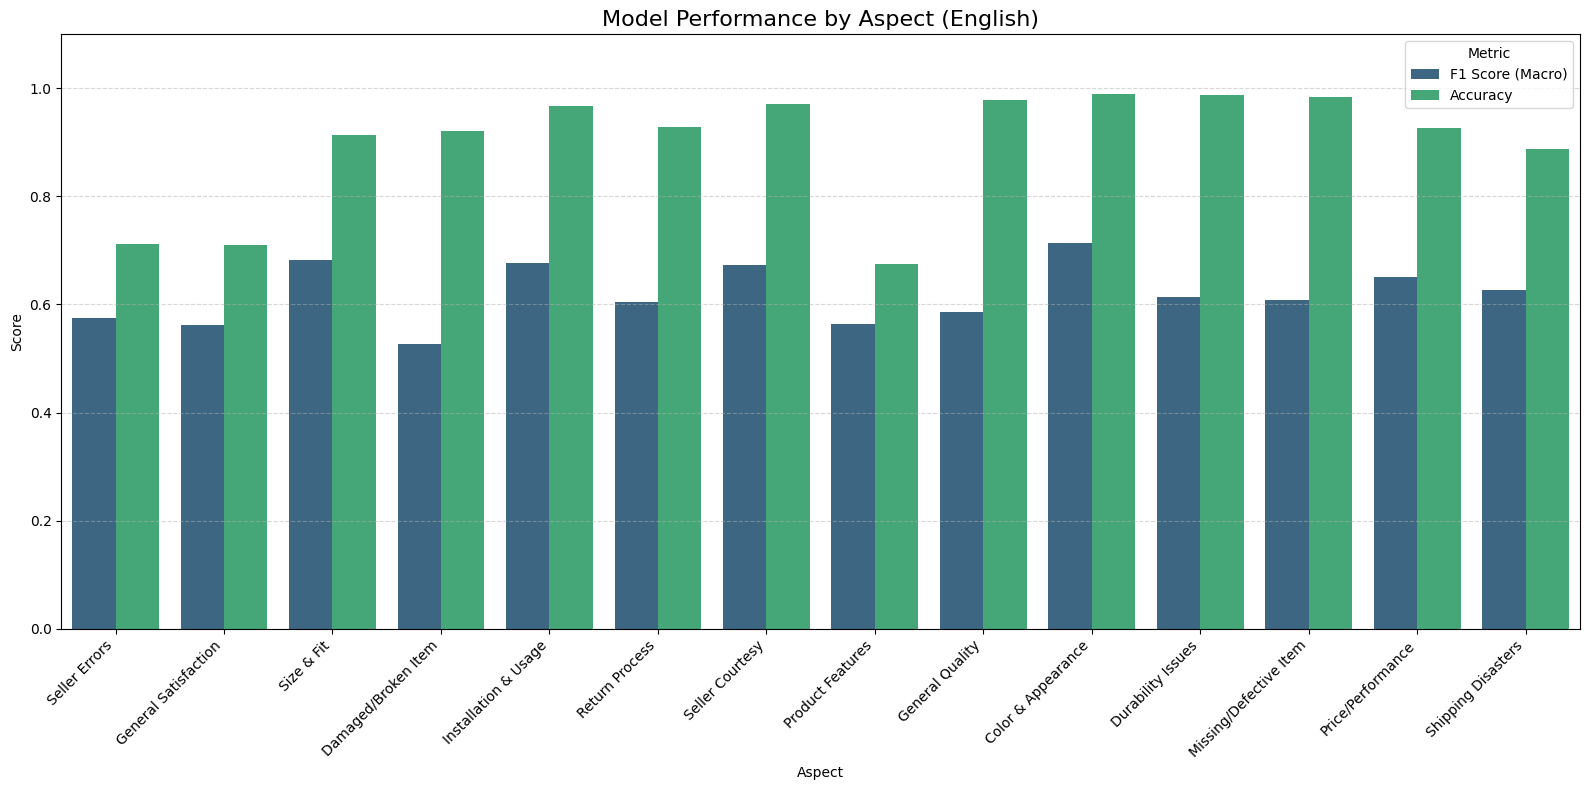

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import random


ASPECT_NAMES_ENG = [
    "Seller Errors", "General Satisfaction", "Size & Fit", "Damaged/Broken Item",
    "Installation & Usage", "Return Process", "Seller Courtesy", "Product Features",
    "General Quality", "Color & Appearance", "Durability Issues", "Missing/Defective Item",
    "Price/Performance", "Shipping Disasters"
]


SENTIMENT_NAMES = ["Negative", "Neutral", "Positive"]

model.load_state_dict(torch.load("best_absa_model.pt", map_location=device))
model.eval()


print("📊 Generating predictions on Test Set...")

y_true_all = []
y_pred_all = []
input_texts = []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        logits, _ = model(batch["input_ids"], batch["attention_mask"])

        preds = torch.argmax(logits, dim=-1).cpu().numpy()
        labels = batch["labels"].cpu().numpy()

        y_true_all.append(labels)
        y_pred_all.append(preds)


        decoded = tokenizer.batch_decode(batch["input_ids"], skip_special_tokens=True)
        input_texts.extend(decoded)

y_true_all = np.concatenate(y_true_all)
y_pred_all = np.concatenate(y_pred_all)


print("🎨 Plotting Confusion Matrices...")

n_cols = 4
n_rows = (len(ASPECT_NAMES_ENG) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 5 * n_rows))
axes = axes.flatten()

for i, aspect in enumerate(ASPECT_NAMES_ENG):
    cm = confusion_matrix(y_true_all[:, i], y_pred_all[:, i])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=SENTIMENT_NAMES,
                yticklabels=SENTIMENT_NAMES, cbar=False)

    axes[i].set_title(f"{aspect}", fontsize=14, fontweight='bold', color='darkblue')
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("True (Actual)")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


print("🎨 Plotting Accuracy & F1 Scores...")

f1_scores = []
accuracies = []

for i in range(len(ASPECT_NAMES_ENG)):
    f1 = f1_score(y_true_all[:, i], y_pred_all[:, i], average='macro')
    acc = accuracy_score(y_true_all[:, i], y_pred_all[:, i])
    f1_scores.append(f1)
    accuracies.append(acc)

import pandas as pd
metrics_df = pd.DataFrame({
    'Aspect': ASPECT_NAMES_ENG,
    'F1 Score (Macro)': f1_scores,
    'Accuracy': accuracies
})

metrics_melted = metrics_df.melt(id_vars="Aspect", var_name="Metric", value_name="Score")

plt.figure(figsize=(16, 8))
sns.barplot(data=metrics_melted, x="Aspect", y="Score", hue="Metric", palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Model Performance by Aspect (English)", fontsize=16)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



**Discussion**

Unlike traditional Aspect-Based Sentiment Analysis (ABSA) studies that often rely on arbitrarily defined or manually selected categories, this research adopted a data-driven scientific methodology. By utilizing unsupervised clustering techniques on the embedding space, we mathematically determined the most representative aspect categories inherent in the dataset.

Initially, the study focused on the 7 most inclusive clusters. The evaluation metrics for this configuration, presented in the Results section, demonstrated a robust performance with high F1 scores. This indicates that the model successfully captures sentiment when the semantic boundaries between aspects are broad and distinct.

Subsequently, the granularity of the analysis was increased by expanding the scope to 14 clusters to capture more specific nuances of user feedback. A critical observation emerged from this comparative analysis: there is an inverse correlation between the number of clusters and the model's performance. As the number of aspects increased from 7 to 14, the F1 score exhibited a noticeable decline. This phenomenon can be attributed to the increased semantic overlap between finer-grained categories and the resulting class imbalance, which poses a greater challenge for the model in distinguishing between closely related aspects.

Despite the reduction in performance scores, high-granularity analysis remains essential for detailed customer insights. Consequently, this observation lays the groundwork for future research. In upcoming thesis work or supplementary projects, we aim to extend this experimental framework to test up to 50 distinct aspects. To mitigate the performance drop observed in this study, future iterations will likely incorporate advanced techniques such as hierarchical classification or data augmentation to stabilize F1 scores at higher granularities.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/best_absa_model.pt /content/drive/MyDrive/

Mounted at /content/drive


In [ ]:
!cp /content/absa_model_classic_fixed.pt /content/drive/MyDrive/